In [1]:
#########################################################################
#
# This is my notebook on finding out all the properties of the cosmic web 
#
# Based on Peter Behroozi's Catalogue, we are in z + 1 = 1.00231 ~0
#
########################################################################

import numpy as np
import scipy
from scipy import io
import random
from scipy.stats import itemfreq
import matplotlib.pyplot as plt
import math
from __future__ import division
from scipy.sparse import csr_matrix
from mpl_toolkits.mplot3d import Axes3D
np.set_printoptions(precision=2)

plt.rcParams['figure.figsize']=(18,18)
%matplotlib inline

# Let's define the parameters 
h=0.7

In [2]:
# R E A D I N G 
# Now we are obtaining Miguel's WALL Catalogue
miguel = scipy.io.readsav("Particles.0273.wall_catalog_and_properties.IDL",idict=None,
                     python_dict=True, uncompressed_file_name=None,
                     verbose=False)
# Let's call Miguel's WALL catalague a simple name - it's a dictionary
m_wall = miguel
miguel = 0

In [3]:
# R E A D I N G 
# Now we are obtaining Peter Behroozi's Catalogue at z =0
behroozi = np.load('hlist_1.00231.npy')

#  Let's call Behroozi's catalogue a simply name -- it's an array
b = behroozi
behroozi = 0

In [4]:
# These are indexed such that i = [Catalogue No.]
print ('Halo Catalogue Numbers:',len(b))
# Each array has 93 items
print ('Number of items in each Catalogue:',len(b[0]))
# A sample of one Catalogue


('Halo Catalogue Numbers:', 12085858)
('Number of items in each Catalogue:', 93)


In [5]:
# Let's look at Miguel's other catalogues : WALL

print(len(m_wall))

# Each item in here is a Wall Number with i = Catalogue No.
print('wall_id0:',m_wall['wall_id0'])
print('wall_id1:',m_wall['wall_id1'])
print('wall_id2:',m_wall['wall_id2'])

# Each item here is the distance to the nearest halo with i = Wall No.
print('wall0_radius:',m_wall['wall0_radius'])
print('wall1_radius"',m_wall['wall1_radius'])
print('wall2_radius',m_wall['wall2_radius'])

# Each item in here is a Wall Number with i = Catalogue No.
print('wall_id0 length:',len(m_wall['wall_id0']))
print('wall_id1 length:',len(m_wall['wall_id1']))
print('wall_id2 length:',len(m_wall['wall_id2']))

# The max value of the wall_iDs should be one less than the length of the wall radius.
print('wall_id0 max:',max(m_wall['wall_id0']))
print('wall_id1 max:',max(m_wall['wall_id1']))
print('wall_id2 max:',max(m_wall['wall_id2']))

# Each item here is the distance to the nearest halo with i = Wall No.
print('wall0_radius length:',len(m_wall['wall0_radius']))
print('wall1_radius length:',len(m_wall['wall1_radius']))
print('wall2_radius length:',len(m_wall['wall2_radius']))

6
('wall_id0:', array([5814,   -1, 3013, ...,   -1,   -1,   -1], dtype=int32))
('wall_id1:', array([  -1,   -1, 1037, ...,   -1,   -1,   -1], dtype=int32))
('wall_id2:', array([ -1,  -1, 541, ...,  -1,  -1,  -1], dtype=int32))
('wall0_radius:', array([  8.34,   1.7 ,  11.23, ...,   5.7 ,   4.87,   4.82], dtype=float32))
('wall1_radius"', array([  4.77,   7.11,   8.63, ...,  11.19,   8.11,   7.5 ], dtype=float32))
('wall2_radius', array([ 18.8 ,  14.5 ,  14.33, ...,  16.69,  14.4 ,   8.9 ], dtype=float32))
('wall_id0 length:', 12085858)
('wall_id1 length:', 12085858)
('wall_id2 length:', 12085858)
('wall_id0 max:', 59010)
('wall_id1 max:', 19289)
('wall_id2 max:', 6308)
('wall0_radius length:', 59011)
('wall1_radius length:', 19290)
('wall2_radius length:', 6309)


In [6]:
# P E T E R   B E H R O O Z I
# For Peter's Catalogue, I introduce this new index j. This is just the index for 1 of the 93th info about each catalogue
j=0
# So, let's take a look at our Halo Catalogues by Peter Behroozi
# These are indexed such that i = [Catalogue No.]

# Let's translate Peter's Catalogue:
b_tran ={0:'scale',1:'id',2:'desc_scale', 3:'desc_id',4:'num_prog',5:'pid', 6:'upid',
         7:'desc_pid',8:'phantom',9:'sam_mvir', 10:'mvir',11:'rvir',12:'rs', 13:'vrms',
         14:'mmp?',15:'scale_of_last_MM',16:'vmax', 17:'x',18:'y',19:'z', 20:'vx',21:'vy',
         22:'vz',23:'Jx',24:'Jy', 25:'Jz',26:'Spin',27:'Breadth_first_ID', 28:'Depth_first_ID',
         29:'Tree_root_ID', 30:'Orig_halo_ID',31:'Snap_num',32:'Next_coprogenitor_depthfirst_ID',
         33:'Last_progenitor_depthfirst_ID',34:'Rs_Klypin',35:'Mvir_all',36:'M200b',37:'M200c',
         38:'M500c',39:'M2500c',40:'Xoff',41:'Voff',42:'Spin_Bullock',43:'b_to_a',44:'c_to_a',
         45:'A[x]',46:'A[y]',47:'A[z]',48:'b_to_a(500c)',49:'c_to_a(500c)',50:'A[x](500c)',
         51:'A[y](500c)',52:'A[z](500c)',53:'T/|U|',54:'M_pe_Behroozi',55:'M_pe_Diemer',
         56:'Macc',57:'Mpeak',58:'Vacc',59:'Vpeak',60:'Halfmass_Scale',61:'Acc_Rate_Inst',
         62:'Acc_Rate_100Myr',63:'Acc_Rate_1*Tdyn',64:'Acc_Rate_2*Tdyn',65:'Acc_Rate_Mpeak',
         66:'Mpeak_Scale',67:'Acc_Scale', 68:'First_Acc_Scale',69:'First_Acc_Mvir',
         70:'First_Acc_Vmax',71:'Vmax@Mpeak',72:'density_CIC',73:'density_1/2',74:'density_1',
         75:'density_2',76:'density_4',77:'density_8',78:'density_16',79:'C_NFW', 80:'bs_ratio',
         81:'cost',82:'P_rvir',83:'P_r500',84:'Mdot/M_inst', 85:'Mdot/M_tdyn',86:'Mdot/M_t2dyn',
         87:'logM/logM*',88:'C_Klypin',89:'Last_mainleaf_depthfirst_ID',90:'Tidal_Force', 
         91:'Tidal_ID',92:'Tidal_Force_Tdyn'
                 }

In [7]:
# E X E R C I S E  4 
# P A T C H  U P  M I G U E L ' S  L I S T

def patch_up_miguel(WALL2,m_array):
    '''This will patch up the list of Miguel. His list of wall iD is 
    basically missing iDs whenever he thinks that there is no wall there. 
    You have to give it the list of Wall iDs, as well as the radius iD'''
    # Wall Number , Frequency that Wall Number occurs in the whole B catalogue
    wall_freq2 = itemfreq(WALL2)
    temp = np.array(wall_freq2,dtype=float)
    wall_freq2 = temp

    # Argh, we have to patch it up because the array has holes in it
    fix2=[]
    for g in range(len(wall_freq2)):
        if wall_freq2[g][0]-wall_freq2[g-1][0]<=len(wall_freq2) :
            middle = (range(int(wall_freq2[g-1][0]+1),int(wall_freq2[g][0])))
            fix2=np.append(fix2,middle)
    for h in range(len(fix2)):
        wall_freq2=np.insert(wall_freq2, fix2[h]+1, [fix2[h],0], axis=0)

    # Because we are now appending -1 to the wall catalogue, we have to make sure that 
    # this value position corresponds to exactly 0 effective radius ( by definition)
    m_wall_zero = np.insert(m_array,0,0,axis=0)

    # These two numbers M U S T match before you can add the arrays
    ###print(len(wall_freq2))        
    ###print(len(m_wall_zero))

    # [Wall Number, Frequency it occurs in the whole B catalogue, effective radius]--smooth2
    wall_freq_rad2= np.insert(wall_freq2,2,m_wall_zero,axis=1)
    mig_cat2 = wall_freq_rad2
    
    return mig_cat2
    # M I G U E L 
    

In [8]:
# E X E R C I S E  4 
#  T H E  C O M P L E T E  C A T A L O G U E
def give_me_Wall_Halo_Mass_Radeff (WALL2,b, mig_cat2):
    '''This is it. We are creating the complementary Behroozi + Miguel array.
    This will return 4 array :
    Wall iD     Halo Catalogue iD    Viral Mass   Effective Radius  '''
    
    # Let's define these keys that I would be using: 
    iD =1
    mvir = 10

    # Getting key quantities from Behroozi and Miguel catalogue
    iD_cat = b[:,iD]                
    mvir_cat = b[:,mvir]
    rad_eff =[]
    for k in range(len(WALL2)):    
        rad_eff.append(mig_cat2[WALL2[k]+1][2])  #Miguel's  : start the index at -1

    # Let's get the array for Wall, iD and mvir and effective radius!
    wall2_array = np.asarray(WALL2)              # Miguel's        
    rad_eff_array = np.asarray(rad_eff)          # Miguel's
    # Let's create Behroozi's array!

    beh_cat2 = np.zeros((12085858, 4))
    beh_cat2[:,0] = wall2_array
    beh_cat2[:,1] = iD_cat
    beh_cat2[:,2] = mvir_cat
    beh_cat2[:,3] = rad_eff_array
    
    return beh_cat2
# B E H R O O Z I

In [9]:
# E X E R C I S E  4 
# P L U S   P O S I T I O N 
def give_me_position (WALL2,b, beh_cat2):
    '''We are getting the position array, and appending that to the beh_cat arrays.
    This will return 7 array :
    Wall iD     Halo Catalogue iD    Viral Mass   Effective Radiu   Position(x)    Position(y)   Position (z)'''
    
    # Let's define these keys that I would be using: 
    x = 17
    y = 18 
    z = 19

    # Getting key quantities from Behroozi and Miguel catalogue
    x_cat =[]
    y_cat=[]
    z_cat =[]
    for k in range(len(WALL2)):
        x_cat.append(b[k][x])                 
        y_cat.append(b[k][y])             
        z_cat.append(b[k][z])  #Miguel's  : start the index at -1

    # Let's get the array for Wall, iD and mvir and effective radius!
    x_cat_array = np.asarray(x_cat)                
    y_cat_array = np.asarray(y_cat)                     
    z_cat_array = np.asarray(z_cat)   
    
    # Let us create empty columns to which we can add
    let_us_add = np.zeros((len(WALL2),3))
    beh_cat2 = np.concatenate((beh_cat2, let_us_add), axis=1)
  
    # Let's create Behroozi's array!
    
    beh_cat2[:,4] = x_cat_array
    beh_cat2[:,5] = y_cat_array
    beh_cat2[:,6] = z_cat_array
    
    return beh_cat2

In [10]:
# E X E R C I S E  4 
# P L U S   D I S T A N C E 
def give_me_distance (WALL2,m_dist2, beh_cat2):
    '''We are getting distance(to the spine) array to our behroozi catalogue.
    This will return 5 array :
    Wall iD     Halo Catalogue iD    Viral Mass   Effective Radius   Distance'''
    
    let_us_add = np.zeros((len(WALL2),1))
    beh_cat2 = np.concatenate((beh_cat2, let_us_add), axis=1)
  
    # Let's create Behroozi's array!
    beh_cat2[:,4] = m_dist2

    return beh_cat2

In [11]:
# E X E R C I S E  7.5
# P L U S   M O D U L U S 
def give_me_modulus (beh_cat0_w_pos,WALL0):
    '''We are getting distance(to the spine) array to our behroozi catalogue.
    This will return 5 array :
    Wall iD     Halo Catalogue iD    Viral Mass   Effective Radius 
    Modulus of Position   '''
    
    # Let's create the empty array
    let_us_add = np.zeros((len(WALL0),1))
    beh_cat0_w_pos = np.concatenate((beh_cat0_w_pos, let_us_add), axis=1)
    
    # Let us get that modulus array
    squared = beh_cat0_w_pos[:,4]**2 + beh_cat0_w_pos[:,5]**2 + beh_cat0_w_pos[:,6]**2
    mod = squared**0.5
    
    # Let's create the array to be added !
    beh_cat0_w_pos[:,7] =  mod
    # Let's delete position x , y and z 
    beh_cat0_w_pos = np.delete(beh_cat0_w_pos, np.s_[4:7], 1)
    
    return beh_cat0_w_pos

In [12]:
# E X E R C I S E  8
# P L U S   A L L   I N F O  
def give_me_info (WALL2,b, beh_cat2):
    '''We are getting the position array, and appending that to the beh_cat arrays.
    This will return 17 array :
    Wall_iD        Halo_Catalogue_iD     Viral_Mass          Effective_Radius
    Spin           Spin_Bullock          Ang_Mo.(x)          Ang_Mo.(y) 
    Ang_Mo.(z)     Rvir                  Concentration       Mass_Accretion_Rate
    log_M/log_M*   Mdot*/M_inst*         Position(x)         Position(y)
    Position(z)'''
    
    # Getting key quantities from Behroozi and Miguel catalogue
    Spin_cat = b[:,26]
    Spin_Bullock_cat = b[:,42]
    Jx_cat= b[:,23]            # Angular Momentum
    Jy_cat= b[:,24]
    Jz_cat= b[:,25]
    R_vir_cat= b[:,11]         # Virial Radius
    C_NFW_cat= b[:,79]         # Concentration
    Acc_Rate_Inst_cat= b[:,61] # Mass Accretion Rate
    logM_logMstar_cat= b[:,87]
    Mdot_M_inst_star_cat= b[:,84]
    Pos_catx= b[:,17]          # Position
    Pos_caty= b[:,18]
    Pos_catz= b[:,19]
   
    # Let us create empty columns to which we can add
    let_us_add = np.zeros((len(WALL2),13))
    beh_cat2 = np.concatenate((beh_cat2, let_us_add), axis=1)
  
    # Let's create Behroozi's array!
    beh_cat2[:,4] = Spin_cat
    beh_cat2[:,5] = Spin_Bullock_cat
    beh_cat2[:,6] = Jx_cat
    beh_cat2[:,7] = Jy_cat
    beh_cat2[:,8] = Jz_cat
    beh_cat2[:,9] = R_vir_cat
    beh_cat2[:,10] = C_NFW_cat
    beh_cat2[:,11] = Acc_Rate_Inst_cat
    beh_cat2[:,12] = logM_logMstar_cat
    beh_cat2[:,13] = Mdot_M_inst_star_cat
    beh_cat2[:,14] = Pos_catx
    beh_cat2[:,15] = Pos_caty
    beh_cat2[:,16] = Pos_catz
    
    return beh_cat2

In [13]:
# E X C E R C I S E  10 
# S T A R   F O R M A T I O N   R A T E

#def give_me_sfr (WALL2,b, beh_cat2):
#    '''We are getting the position array, and appending that to the beh_cat arrays.
#    This will return 18 array :
#    Wall_iD        Halo_Catalogue_iD     Viral_Mass          Effective_Radius
#    Spin           Spin_Bullock          Ang_Mo.(x)          Ang_Mo.(y) 
#    Ang_Mo.(z)     Rvir                  Concentration       Mass_Accretion_Rate
#    log_M/log_M*   Mdot*/M_inst*         Ellipsoid(x)        Ellipsoid(y)
#    Ellipsoid_(z)  Star Formation Rate'''

    # We are going to use SHARC to define the star formation rate 

    # f : The steallar-to-halo mass ratio
#    Mass_Acc_Rate = b[:,61]
#    logM_logMstar = b[:,87]
#    Virial_Mass = b[:,10]
#    a = logM_logMstar

#    f = Virial_Mass**((1-a)/a)

    # star_formation_effeciency
#    Mdot_M_inst_star = b[:,84]
#    Mdot_M_inst_halo = Mass_Acc_Rate/Virial_Mass

#    star_form_eff = Mdot_M_inst_star / Mdot_M_inst_halo

    # star formation rate
#    d_Mstar_dt = f * star_form_eff * Mass_Acc_Rate


    # Let us create empty columns to which we can add
#    let_us_add = np.zeros((len(WALL2),1))
#    beh_cat2 = np.concatenate((beh_cat2, let_us_add), axis=1)

    # Let's create Behroozi's array!
#    beh_cat2[:,17] = d_Mstar_dt
    
#    return beh_cat2

In [13]:
def give_me_alignment (WALL2,b, beh_cat2):
    '''We are getting the position array, and appending that to the beh_cat arrays.
    This will return 20 array :
    Wall_iD        Halo_Catalogue_iD     Viral_Mass          Effective_Radius
    Spin           Spin_Bullock          Ang_Mo.(x)          Ang_Mo.(y) 
    Ang_Mo.(z)     Rvir                  Concentration       Mass_Accretion_Rate
    log_M/log_M*   Mdot*/M_inst*         Position(x)         Position(y)
    Position(z)   is_it_aligned         mod_of_ang'''

    # The Angular Momentum of the DM Halo
    Jx= b[:,23]            
    Jy= b[:,24]
    Jz= b[:,25]
    Ang_Mo = np.array([Jx, Jy, Jz])

    # The shape of the Ellipsoid that the DM is in 
    Ax= b[:,45]          
    Ay= b[:,46]
    Az= b[:,47]
    Ellipsoid = np.array([Ax, Ay, Az])

    # Let's multiply it all out & get the DOT product
    # If it is Zero, and [ Jx, Jy, Jz] != [0,0,0], and [ Ax, Ay, Az] != [0,0,0] ( make sure you do abs )
    # then the Angular Momentum of the Disk aligns with 2nd Axis
    A = Ang_Mo
    B = Ellipsoid
    C = A*B
    CT = C.T
    DT = CT[:,0]+ CT[:,1]+ CT[:,2]
    DOT = DT.T
    
    # Let's create a modulus of angular momentum
    J_squared = b[:,23]**2 + b[:,24]**2 + b[:,25]**2
    J = J_squared**0.5
    
    # Let us create empty columns to which we can add
    let_us_add = np.zeros((len(WALL2),2))
    beh_cat2 = np.concatenate((beh_cat2, let_us_add), axis=1)

    # Let's create Behroozi's array!
    beh_cat2[:,17] = DOT  
    beh_cat2[:,18] = J
    Ang_Mo = 0
    Ellipsoid = 0

    return beh_cat2

In [15]:
# E X E R C I S E  4 
# S M O O T H   T O   4 M P C  

# Let's find out how many halo there are in each Wall. This is for 4 mpc. 

#WALL2 = m_wall['wall_id2']
# Let's get the complete catalogue that we want 
#m_array2 = m_wall['wall2_radius']
# This is miguel's complete catalgoue
#mig_cat2 = patch_up_miguel(WALL2,m_array2)
# This is behroozi's appended catalogue
#beh_cat2 = give_me_Wall_Halo_Mass_Radeff (WALL2,b, mig_cat2)


In [14]:
# E X E R C I S E  5 
# S M O O T H   T O   2 M P C 

# Let's find out how many halo there are in each Wall. This is for 2 mpc. 

WALL1 = m_wall['wall_id1']
# Let's get the complete catalogue that we want 
m_array1 = m_wall['wall1_radius']
# This is miguel's complete catalgoue
mig_cat1 = patch_up_miguel(WALL1,m_array1)
# This is behroozi's appended catalogue
beh_cat1 = give_me_Wall_Halo_Mass_Radeff (WALL1,b, mig_cat1)


In [15]:
# E X E R C I S E  6 
# S M O O T H   T O   1 M P C

# Let's find out how many halo there are in each Wall. This is for 1 mpc.

WALL0 = m_wall['wall_id0']
# Let's get the complete catalogue that we want 
m_array0 = m_wall['wall0_radius']
# This is miguel's complete catalgoue
mig_cat0 = patch_up_miguel(WALL0,m_array0)
# This is behroozi's appended catalogue
beh_cat0 = give_me_Wall_Halo_Mass_Radeff (WALL0,b, mig_cat0)


In [ ]:
# E X C E R C I S E   # 7 
# R E M O V I N G   N O N - W A L L S 

# You must remove the -1 from the Wall, which means these halos are not in any Walls

new_beh_cat0 = beh_cat0[beh_cat0[:,0] != -1]
new_beh_cat1 = beh_cat1[beh_cat1[:,0] != -1]
#new_beh_cat2 = beh_cat2[beh_cat2[:,0] != -1]

In [ ]:
# E X C E R C I S E    7 

# Let's get those walls and their mod distance from the simulation origin

#beh_cat0_w_pos = give_me_position (WALL0,b, beh_cat0)
#beh_cat1_w_pos = give_me_position (WALL1,b, beh_cat1)
#beh_cat2_w_pos = give_me_position (WALL2,b, beh_cat2)

#beh_cat0_w_mod = give_me_modulus (beh_cat0_w_pos,WALL0)
#beh_cat1_w_mod = give_me_modulus (beh_cat1_w_pos,WALL1)
#beh_cat2_w_mod = give_me_modulus (beh_cat2_w_pos,WALL2)



In [16]:
# E X C E R C I S E  9 
# A L L   I N F O 

# Let's get all the information that we need for our project !
beh_cat0_plus_info = give_me_info(WALL0,b, beh_cat0)
beh_cat1_plus_info = give_me_info(WALL1,b, beh_cat1)
#beh_cat2_plus_info = give_me_info(WALL2,b, beh_cat2)
# Let us clear even more memory
beh_cat0 = 0
beh_cat1 = 0
#beh_cat2 = 0


In [ ]:
# E X C E R C I S E  10 
# S T A R   F O R M A T I O N   R A T E

# We are going to get the Star Formation Rate
#beh_cat0_plus_info_sfr = give_me_sfr(WALL0,b, beh_cat0_plus_info)
#beh_cat1_plus_info_sfr = give_me_sfr(WALL1,b, beh_cat1_plus_info)
#beh_cat2_plus_info_sfr = give_me_sfr(WALL2,b, beh_cat2_plus_info)

# Let us clear even more memory
#beh_cat0_plus_info = 0
#beh_cat1_plus_info = 0
#beh_cat2_plus_info = 0


In [17]:
# E X C E R C I S E  11 
# I S   A N G U L A R   M O M E N T U M   A L I G N E D   W /   2 N D   E L L I P S O I D   A X I S

# We are going to find out if angular momentum aligns with the intermediate ellipsoid axis 
beh_cat0_plus_info_align = give_me_alignment (WALL0,b, beh_cat0_plus_info)
beh_cat1_plus_info_align = give_me_alignment (WALL1,b, beh_cat1_plus_info)
#beh_cat2_plus_info_align = give_me_alignment (WALL2,b, beh_cat2_plus_info)

# Let us clear even more memory
beh_cat0_plus_info=0
beh_cat1_plus_info=0
#beh_cat2_plus_info=0


In [18]:
# E X C E R C I S E  9 
# R E M O V E   N O N - W A L L S

# You must remove the -1 from the Wall, which means these halos are not in any Walls
new_beh_cat0 = beh_cat0_plus_info_align[beh_cat0_plus_info_align[:,0] != -1]
new_beh_cat1 = beh_cat1_plus_info_align[beh_cat1_plus_info_align[:,0] != -1]
#new_beh_cat2 = beh_cat2_plus_info_sfr_align[beh_cat2_plus_info_align[:,0] != -1]

# Let us clear even more memory
beh_cat0_plus_info_align = 0
beh_cat1_plus_info_align = 0
#beh_cat2_plus_info_align = 0


In [19]:
# Let's clear some memory space !
b = 0
m_wall = 0
WALL0 = 0
WALL1 = 0
WALL2 = 0
wall_freq_rad0 = 0
wall_freq_rad1 = 0
wall_freq_rad2 = 0

In [21]:
def give_me_sfr (catalogue):
    '''We are getting the starformation rate added to the catalogue
    Wall_iD        Halo_Catalogue_iD     Viral_Mass          Effective_Radius
    Spin           Spin_Bullock          Ang_Mo.(x)          Ang_Mo.(y) 
    Ang_Mo.(z)     Rvir                  Concentration       Mass_Accretion_Rate
    log_M/log_M*   Mdot*/M_inst*         Position(x)         Position(y)
    Position(z)  is_it_aligned         mod_of_ang          SFR             '''       
    

    # We are going to use SHARC to define the star formation rate 

    # f : The steallar-to-halo mass ratio
    Mass_Acc_Rate = catalogue[:,11]
    logM_logMstar = catalogue[:,12]
    Virial_Mass = catalogue[:,2]
    a = logM_logMstar

    f = Virial_Mass**((1-a)/a)

    # star_formation_effeciency
    Mdot_M_inst_star = catalogue[:,13]
    Mdot_M_inst_halo = Mass_Acc_Rate/Virial_Mass
    star_form_eff = np.zeros(len(Mdot_M_inst_halo))
    for i in range(len(star_form_eff)):
        if Mdot_M_inst_halo[i] !=0:  
            star_form_eff[i] = Mdot_M_inst_star[i]/Mdot_M_inst_halo[i]
        else:
            star_form_eff[i] = 0
        

    # star formation rate
    SFR = f * star_form_eff * Mass_Acc_Rate
    
    # Let us create empty columns to which we can add
    let_us_add = np.zeros((len(catalogue),1))
    catalogue = np.concatenate((catalogue, let_us_add), axis=1)

    # Let's create Behroozi's array!
    catalogue[:,19] = SFR
    
    return catalogue

In [20]:
def give_me_reduced_rad_and_mass_and_SFR (lo_rad,hi_rad,lo_mas,hi_mas, catalogue):
    '''It will return for you a list of 4 arrays : id, halo,  mass, radius and Mass Accretion Rate'''
    
    h=0.7
    
    # Let me get the numbers from the catalogue that we want
    wall = catalogue[:,0]
    halo = catalogue[:,1]
    mass = catalogue[:,2]
    radi = catalogue[:,3]
    SFR = catalogue[:,19]

    # Let's limit the radius 
    mass_output = mass[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]*h 
    radi_output = radi[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]*h 
    wall_output = wall[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    halo_output = halo[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    SFR_output = SFR[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]

    # Let's limit the mass
    mass_output2 = mass_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)] 
    radi_output2 = radi_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    wall_output2 = wall_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    halo_output2 = halo_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    SFR_output2 = SFR_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    
    return wall_output2,halo_output2,mass_output2,radi_output2,SFR_output2 

In [21]:
def give_me_reduced_rad_and_mass_and_mar (lo_rad,hi_rad,lo_mas,hi_mas, catalogue):
    '''It will return for you a list of 4 arrays : id, halo,  mass, radius and Mass Accretion Rate'''
    
    h=0.7
    
    # Let me get the numbers from the catalogue that we want
    wall = catalogue[:,0]
    halo = catalogue[:,1]
    mass = catalogue[:,2]
    radi = catalogue[:,3]
    mar = catalogue[:,11]

    # Let's limit the radius 
    mass_output = mass[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]*h 
    radi_output = radi[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]*h 
    wall_output = wall[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    halo_output = halo[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    mar_output = mar[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]

    # Let's limit the mass
    mass_output2 = mass_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)] 
    radi_output2 = radi_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    wall_output2 = wall_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    halo_output2 = halo_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    mar_output2 = mar_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    
    return wall_output2,halo_output2,mass_output2,radi_output2,mar_output2 

In [22]:
def give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue):
    '''It will return for you a list of 4 arrays : id, halo, radius and mass'''
    
    h=0.7
    
    # Let me get the numbers from the catalogue that we want
    wall = catalogue[:,0]
    halo = catalogue[:,1]
    mass = catalogue[:,2]
    radi = catalogue[:,3]

    # Let's limit the radius 
    mass_output = mass[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]*h 
    radi_output = radi[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]*h 
    wall_output = wall[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    halo_output = halo[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]

    # Let's limit the mass
    mass_output2 = mass_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)] 
    radi_output2 = radi_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    wall_output2 = wall_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    halo_output2 = halo_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    
    return wall_output2,halo_output2,mass_output2,radi_output2

In [23]:
def give_me_reduced_rad_and_mass_and_conc (lo_rad,hi_rad,lo_mas,hi_mas, catalogue):
    '''It will return for you a list of 5 arrays : id, halo, mass, effective radius and concentration'''
    
    h=0.7
    
    # Let me get the numbers from the catalogue that we want
    wall = catalogue[:,0]
    halo = catalogue[:,1]
    mass = catalogue[:,2]
    radi = catalogue[:,3]
    conc = catalogue[:,10]

    # Let's limit the radius 
    mass_output = mass[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]*h 
    radi_output = radi[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]*h 
    wall_output = wall[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    halo_output = halo[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    conc_output = conc[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]

    # Let's limit the mass
    mass_output2 = mass_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)] 
    radi_output2 = radi_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    wall_output2 = wall_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    halo_output2 = halo_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    conc_output2 = conc_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    
    return wall_output2,halo_output2,mass_output2,radi_output2,conc_output2

In [ ]:
#def give_me_reduced_rad_and_mass_and_sfr (lo_rad,hi_rad,lo_mas,hi_mas, catalogue):
#    '''It will return for you a list of 5 arrays : id, halo, mass, effective radius and sfr'''
    
#    h=0.7
    
    # Let me get the numbers from the catalogue that we want
#    wall = catalogue[:,0]
#    halo = catalogue[:,1]
#    mass = catalogue[:,2]
#    radi = catalogue[:,3]
#    sfr = catalogue[:,17]

    # Let's limit the radius 
#    mass_output = mass[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]*h 
#    radi_output = radi[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]*h 
#    wall_output = wall[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
#    halo_output = halo[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
#    sfr_output  = sfr[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]

    # Let's limit the mass
#    mass_output2 = mass_output[np.logical_and(mass_output >lo_mas , 
#                                             mass_output< hi_mas)] 
#    radi_output2 = radi_output[np.logical_and(mass_output >lo_mas , 
#                                             mass_output< hi_mas)]
#    wall_output2 = wall_output[np.logical_and(mass_output >lo_mas , 
#                                             mass_output< hi_mas)]
#    halo_output2 = halo_output[np.logical_and(mass_output >lo_mas , 
#                                             mass_output< hi_mas)]
#    sfr_output2 = sfr_output[np.logical_and(mass_output >lo_mas , 
#                                             mass_output< hi_mas)]
    
#    return wall_output2,halo_output2,mass_output2,radi_output2,sfr_output2

In [24]:
def give_me_reduced_rad_and_mass_and_logM_LogMstar (lo_rad,hi_rad,lo_mas,hi_mas, catalogue):
    '''It will return for you a list of 5 arrays : id, halo, mass, effective radius and sfr'''
    
    h=0.7
    
    # Let me get the numbers from the catalogue that we want
    wall = catalogue[:,0]
    halo = catalogue[:,1]
    mass = catalogue[:,2]
    radi = catalogue[:,3]
    logM = catalogue[:,12]

    # Let's limit the radius 
    mass_output = mass[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]*h 
    radi_output = radi[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]*h 
    wall_output = wall[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    halo_output = halo[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    logM_output = logM[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]

    # Let's limit the mass
    mass_output2 = mass_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)] 
    radi_output2 = radi_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    wall_output2 = wall_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    halo_output2 = halo_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    logM_output2 = logM_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    
    return wall_output2,halo_output2,mass_output2,radi_output2,logM_output2

In [25]:
def give_me_reduced_rad_and_mass_and_ali (lo_rad,hi_rad,lo_mas,hi_mas, catalogue):
    '''It will return for you a list of 5 arrays : id, halo, mass, effective radius and sfr'''
    
    h=0.7
    
    # Let me get the numbers from the catalogue that we want
    wall = catalogue[:,0]
    halo = catalogue[:,1]
    mass = catalogue[:,2]
    radi = catalogue[:,3]
    ali = catalogue[:,17]

    # Let's limit the radius 
    mass_output = mass[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]*h 
    radi_output = radi[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]*h 
    wall_output = wall[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    halo_output = halo[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    ali_output  = ali[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]

    # Let's limit the mass
    mass_output2 = mass_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)] 
    radi_output2 = radi_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    wall_output2 = wall_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    halo_output2 = halo_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    ali_output2 = ali_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    
    return wall_output2,halo_output2,mass_output2,radi_output2,ali_output2

In [26]:
def give_me_reduced_rad_and_mass_and_ang_and_pos (lo_rad,hi_rad,lo_mas,hi_mas, catalogue):
    '''It will return for you a list of 5 arrays : id, halo, mass, effective radius and sfr'''
    
    h=0.7
    
    # Let me get the numbers from the catalogue that we want
    wall = catalogue[:,0]
    halo = catalogue[:,1]
    mass = catalogue[:,2]
    radi = catalogue[:,3]
    angx = catalogue[:,6]
    angy = catalogue[:,7]
    angz = catalogue[:,8]
    posx = catalogue[:,14]
    posy = catalogue[:,15]
    posz = catalogue[:,16]

    # Let's limit the radius 
    mass_output = mass[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]*h 
    radi_output = radi[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]*h 
    wall_output = wall[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    halo_output = halo[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    angx_output  = angx[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    angy_output  = angy[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    angz_output  = angz[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    posx_output  = posx[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    posy_output  = posy[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    posz_output  = posz[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]

    # Let's limit the mass
    mass_output2 = mass_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)] 
    radi_output2 = radi_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    wall_output2 = wall_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    halo_output2 = halo_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    angx_output2 = angx_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    angy_output2 = angy_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    angz_output2 = angz_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    posx_output2 = posx_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    posy_output2 = posy_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    posz_output2 = posz_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    
    return wall_output2,halo_output2,mass_output2,radi_output2,angx_output2,angy_output2,angz_output2,posx_output2,posy_output2,posz_output2

In [27]:
def give_me_reduced_rad_and_mass_and_spin (lo_rad,hi_rad,lo_mas,hi_mas, catalogue):
    '''It will return for you a list of 5 arrays : id, halo, mass, effective radius and sfr'''
    
    h=0.7
    
    # Let me get the numbers from the catalogue that we want
    wall = catalogue[:,0]
    halo = catalogue[:,1]
    mass = catalogue[:,2]
    radi = catalogue[:,3]
    spin = catalogue[:,4]
    sbin = catalogue[:,5]

    # Let's limit the radius 
    mass_output = mass[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]*h 
    radi_output = radi[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]*h 
    wall_output = wall[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    halo_output = halo[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    spin_output  = spin[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    sbin_output  = sbin[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]

    # Let's limit the mass
    mass_output2 = mass_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)] 
    radi_output2 = radi_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    wall_output2 = wall_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    halo_output2 = halo_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    spin_output2 = spin_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    sbin_output2 = sbin_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    
    return wall_output2,halo_output2,mass_output2,radi_output2,spin_output2,sbin_output2

In [28]:
def gimme_walls_w_just_1_halo_and_all(no_of_walls0, plot_output2):
    '''You have to give it the frequency array, as well as the plot list. 
    It will then tell you walls with 1 halo, and walls with more than 1 halo, both arrays'''
    # Let's form a whole new array :
    # Wall iD, Frequency of Wall iD, Mass of Halo , Radius ,Concentration
    # Each Wall iD happens only once
    
    total = np.zeros((len(no_of_walls0), len(plot_output2)))
    # Just getting an iD for this wall
    total[:,0]=no_of_walls0[:,0]
    total[:,1]=no_of_walls0[:,1]
    
    No_of_col = len(plot_output2)
    
    # It really is a one to one match and checking. 
    for i in range(len(no_of_walls0)):
        for j in range(len(plot_output2[0])):
            # Literally matching the Wall iD
            if total[i][0] == plot_output2[0][j]:
                total[i,2:No_of_col-1] = plot_output2[2:No_of_col-1,j] 
                
                #total[i][2] = plot_output2[2][j] # Mass
                #total[i][3] = plot_output2[3][j] # Effective R
                #total[i][4] = plot_output2[4][j] # Spin
                #total[i][5] = plot_output2[5][j] # Spin_Bullock
                #total[i][6] = plot_output2[6][j] # Ang_Mo.(x)
                #total[i][7] = plot_output2[7][j] # Ang_Mo.(y) 
                #total[i][8] = plot_output2[8][j] # Ang_Mo.(z)
                #total[i][9] = plot_output2[9][j] # Rvir
                #total[i][10] = plot_output2[10][j] # Concentration
                #total[i][11] = plot_output2[11][j] # Mass_Accretion_Rate
                #total[i][12] = plot_output2[12][j] # log_M/log_M*
                #total[i][13] = plot_output2[13][j] # Mdot*/M_inst* 
                #total[i][14] = plot_output2[14][j] # Ellipsoid(x)
                #total[i][15] = plot_output2[15][j] # Ellipsoid(y)
                #total[i][16] = plot_output2[16][j] # Ellipsoid(z)
                #total[i][17] = plot_output2[17][j] # Star Formation Rate
                #total[i][18] = plot_output2[18][j] # is_it_aligned
                #total[i][19] = plot_output2[19][j] # mod_of_ang
                
     
    # When it is exactly 1 halo
    exactly_one_halo =  total[total[:,1] == 1]               

    # When it is more than 1 halo
    more_than_one_halo =  total[total[:,1] != 1]
        
    
    # It returns total number of walls , walls with more than 1 halo, walls with exactly 1 halo
    return total, more_than_one_halo, exactly_one_halo

In [29]:
def gimme_walls_w_just_1_halo_and_ang_and_pos(no_of_walls0, plot_output2):
    '''You have to give it the frequency array, as well as the plot list. 
    It will then tell you walls with 1 halo, and walls with more than 1 halo, both arrays'''
    # Let's form a whole new array :
    # Wall iD, Frequency of Wall iD, Mass of Halo , Radius ,Concentration
    # Each Wall iD happens only once
    
    total = np.zeros((len(no_of_walls0), 10))
    # Just getting an iD for this wall
    total[:,0]=no_of_walls0[:,0]
    total[:,1]=no_of_walls0[:,1]

    # It really is a one to one match and checking. 
    for i in range(len(no_of_walls0)):
        for j in range(len(plot_output2[0])):
            # Literally matching the Wall iD
            if total[i][0] == plot_output2[0][j]:
                total[i][2] = plot_output2[2][j] # Mass
                total[i][3] = plot_output2[3][j] # Radius
                total[i][4] = plot_output2[4][j] # Ang_Mo.(x)
                total[i][5] = plot_output2[5][j] # Ang_Mo.(y) 
                total[i][6] = plot_output2[6][j] # Ang_Mo.(z)
                total[i][7] = plot_output2[7][j] # Pos(x)
                total[i][8] = plot_output2[8][j] # Pos(y)
                total[i][9] = plot_output2[9][j] # Pos(z)
     
    # When it is exactly 1 halo
    exactly_one_halo =  total[total[:,1] == 1]               

    # When it is more than 1 halo
    more_than_one_halo =  total[total[:,1] != 1]
        
    
    # It returns total number of walls , walls with more than 1 halo, walls with exactly 1 halo
    return total, more_than_one_halo, exactly_one_halo

In [30]:
def gimme_walls_w_just_1_halo_and_spin(no_of_walls0, plot_output2):
    '''You have to give it the frequency array, as well as the plot list. 
    It will then tell you walls with 1 halo, and walls with more than 1 halo, both arrays'''
    # Let's form a whole new array :
    # Wall iD, Frequency of Wall iD, Mass of Halo , Radius ,Concentration
    # Each Wall iD happens only once
    
    total = np.zeros((len(no_of_walls0), 6))
    # Just getting an iD for this wall
    total[:,0]=no_of_walls0[:,0]
    total[:,1]=no_of_walls0[:,1]

    # It really is a one to one match and checking. 
    for i in range(len(no_of_walls0)):
        for j in range(len(plot_output2[0])):
            # Literally matching the Wall iD
            if total[i][0] == plot_output2[0][j]:
                total[i][2] = plot_output2[2][j] # Mass
                total[i][3] = plot_output2[3][j] # Radius
                total[i][4] = plot_output2[4][j] # spin
                total[i][5] = plot_output2[5][j] # sbin
     
    # When it is exactly 1 halo
    exactly_one_halo =  total[total[:,1] == 1]               

    # When it is more than 1 halo
    more_than_one_halo =  total[total[:,1] != 1]
        
    
    # It returns total number of walls , walls with more than 1 halo, walls with exactly 1 halo
    return total, more_than_one_halo, exactly_one_halo

In [31]:
def gimme_walls_w_just_1_halo_and_ali(no_of_walls0, plot_output2):
    '''You have to give it the frequency array, as well as the plot list. 
    It will then tell you walls with 1 halo, and walls with more than 1 halo, both arrays'''
    # Let's form a whole new array :
    # Wall iD, Frequency of Wall iD, Mass of Halo , Radius ,Concentration
    # Each Wall iD happens only once
    
    total = np.zeros((len(no_of_walls0), 5))
    # Just getting an iD for this wall
    total[:,0]=no_of_walls0[:,0]
    total[:,1]=no_of_walls0[:,1]

    # It really is a one to one match and checking. 
    for i in range(len(no_of_walls0)):
        for j in range(len(plot_output2[0])):
            # Literally matching the Wall iD
            if total[i][0] == plot_output2[0][j]:
                total[i][2] = plot_output2[2][j] # Mass
                total[i][3] = plot_output2[3][j] # Radius
                total[i][4] = plot_output2[4][j] # ali
     
    # When it is exactly 1 halo
    exactly_one_halo =  total[total[:,1] == 1]               

    # When it is more than 1 halo
    more_than_one_halo =  total[total[:,1] != 1]
        
    
    # It returns total number of walls , walls with more than 1 halo, walls with exactly 1 halo
    return total, more_than_one_halo, exactly_one_halo

In [32]:
def gimme_walls_w_just_1_halo_and_SFR(no_of_walls0, plot_output2):
    '''You have to give it the frequency array, as well as the plot list. 
    It will then tell you walls with 1 halo, and walls with more than 1 halo, both arrays'''
    # Let's form a whole new array :
    # Wall iD, Frequency of Wall iD, Mass of Halo , Radius ,Concentration
    # Each Wall iD happens only once
    
    total = np.zeros((len(no_of_walls0), 5))
    # Just getting an iD for this wall
    total[:,0]=no_of_walls0[:,0]
    total[:,1]=no_of_walls0[:,1]

    # It really is a one to one match and checking. 
    for i in range(len(no_of_walls0)):
        for j in range(len(plot_output2[0])):
            # Literally matching the Wall iD
            if total[i][0] == plot_output2[0][j]:
                total[i][2] = plot_output2[2][j] # Mass
                total[i][3] = plot_output2[3][j] # Radius
                total[i][4] = plot_output2[4][j] # SFR
     
    # When it is exactly 1 halo
    exactly_one_halo =  total[total[:,1] == 1]               

    # When it is more than 1 halo
    more_than_one_halo =  total[total[:,1] != 1]
        
    
#    # It returns total number of walls , walls with more than 1 halo, walls with exactly 1 halo
    return total, more_than_one_halo, exactly_one_halo

In [33]:
def gimme_walls_w_just_1_halo_and_mar(no_of_walls0, plot_output2):
    '''You have to give it the frequency array, as well as the plot list. 
    It will then tell you walls with 1 halo, and walls with more than 1 halo, both arrays'''
    # Let's form a whole new array :
    # Wall iD, Frequency of Wall iD, Mass of Halo , Radius ,Concentration
    # Each Wall iD happens only once
    
    total = np.zeros((len(no_of_walls0), 5))
    # Just getting an iD for this wall
    total[:,0]=no_of_walls0[:,0]
    total[:,1]=no_of_walls0[:,1]

    # It really is a one to one match and checking. 
    for i in range(len(no_of_walls0)):
        for j in range(len(plot_output2[0])):
            # Literally matching the Wall iD
            if total[i][0] == plot_output2[0][j]:
                total[i][2] = plot_output2[2][j] # Mass
                total[i][3] = plot_output2[3][j] # Radius
                total[i][4] = plot_output2[4][j] # Mar
     
    # When it is exactly 1 halo
    exactly_one_halo =  total[total[:,1] == 1]               

    # When it is more than 1 halo
    more_than_one_halo =  total[total[:,1] != 1]
        
    
    # It returns total number of walls , walls with more than 1 halo, walls with exactly 1 halo
    return total, more_than_one_halo, exactly_one_halo

In [34]:
def gimme_walls_w_just_1_halo_and_conc(no_of_walls0, plot_output2):
    '''You have to give it the frequency array, as well as the plot list. 
    It will then tell you walls with 1 halo, and walls with more than 1 halo, both arrays'''
    # Let's form a whole new array :
    # Wall iD, Frequency of Wall iD, Mass of Halo , Radius ,Concentration
    # Each Wall iD happens only once
    
    total = np.zeros((len(no_of_walls0), 5))
    # Just getting an iD for this wall
    total[:,0]=no_of_walls0[:,0]
    total[:,1]=no_of_walls0[:,1]

    # It really is a one to one match and checking. 
    for i in range(len(no_of_walls0)):
        for j in range(len(plot_output2[0])):
            # Literally matching the Wall iD
            if total[i][0] == plot_output2[0][j]:
                total[i][2] = plot_output2[2][j] # Mass
                total[i][3] = plot_output2[3][j] # Radius
                total[i][4] = plot_output2[4][j] # Concentration
     
    # When it is exactly 1 halo
    exactly_one_halo =  total[total[:,1] == 1]               

    # When it is more than 1 halo
    more_than_one_halo =  total[total[:,1] != 1]
        
    
    # It returns total number of walls , walls with more than 1 halo, walls with exactly 1 halo
    return total, more_than_one_halo, exactly_one_halo

In [35]:
def gimme_walls_w_just_1_halo(no_of_walls0, plot_output2):
    '''You have to give it the frequency array, as well as the plot list. 
    It will then tell you walls with 1 halo, and walls with more than 1 halo, both arrays'''
    # Let's form a whole new array :
    # Wall iD, Frequency of Wall iD, Mass of Halo , Radius 
    # Each Wall iD happens only once
    
    total = np.zeros((len(no_of_walls0), 4))
    # Just getting an iD for this wall
    total[:,0]=no_of_walls0[:,0]
    total[:,1]=no_of_walls0[:,1]

    # It really is a one to one match and checking. 
    for i in range(len(no_of_walls0)):
        for j in range(len(plot_output2[0])):
            # Literally matching the Wall iD
            if total[i][0] == plot_output2[0][j]:
                total[i][2] = plot_output2[2][j] # Mass
                total[i][3] = plot_output2[3][j] # Radius
     
    # When it is exactly 1 halo
    exactly_one_halo =  total[total[:,1] == 1]               

    # When it is more than 1 halo
    more_than_one_halo =  total[total[:,1] != 1]

    # It returns total number of walls , walls with more than 1 halo, walls with exactly 1 halo
    return total, more_than_one_halo, exactly_one_halo

In [36]:
def gimme_walls_w_just_1_halo_not_unique(no_of_walls0, plot_output2):
    '''You have to give it the frequency array, as well as the plot list. 
    It will then tell you walls with 1 halo, and walls with more than 1 halo, both arrays'''
    # Let's form a whole new array :
    # Wall iD, Frequency of Wall iD, Mass of Halo , Radius , Counter
    # Each Wall iD happens as many times as there are Frequency of Wall iD
    
    total = np.zeros((len(no_of_walls0), 5))
    # Just getting an iD for this wall
    total[:,0]=no_of_walls0[:,0]
    total[:,1]=no_of_walls0[:,1]

    # Let's add a new array for extra Wall iDs
    extra = []
    
    # It really is a one to one match and checking. 
    for i in range(len(no_of_walls0)):
        for j in range(len(plot_output2[0])):
            # Literally matching the Wall iD
            if total[i][0] == plot_output2[0][j]:
                if total[i][4] == 0 :
                    total[i][2] = plot_output2[2][j] # Mass
                    total[i][3] = plot_output2[3][j] # Radius
                    total[i][4] = total[i][4] +1 
                else :
                    extra.append([total[i][0],total[i][1],plot_output2[2][j],plot_output2[3][j],0])
    # Let's add this extra to our array
    extra_array = np.asarray(extra)
    temp = np.vstack((total,extra))
    total = temp
    
    # When it is exactly 1 halo
    exactly_one_halo =  total[total[:,1] == 1]               

    # When it is more than 1 halo
    more_than_one_halo =  total[total[:,1] != 1]

    # It returns total number of walls , walls with more than 1 halo, walls with exactly 1 halo
    return total, more_than_one_halo, exactly_one_halo

In [ ]:
# E X E R C I S E  12 : WALL_iD0
# Let's plot the Council Radius of each halo within Milky Way Mass
# W A L L S  W I T H  H A L O S 

from __future__ import division
#--------------------------------------------------------------------------------

# Let's plot this
fig,ax = plt.subplots(8,2,figsize=(13, 48))
fig.suptitle("Wall_iD1 : Walls with halos", fontsize=26,alpha=0.5)

color1 = "ORANGE"


# You must specify the catalogue you want to look at
catalogue =new_beh_cat1

# L E T  U S  P L O T  F O R  [ 0  ,  0 ]
# The scatter plot
# G R A Y
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
# Use the Difinition
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
# Let us plot for [0,0]
x = plot_output2[3] # radius
a = plot_output2[2] # mass
y=[]
for i in range(len(a)):
    y.append(math.log10(a[i]))
# The individual dots
ax[0,0].plot(x,y,marker='o',linestyle='none',color='gray',alpha=0.3,ms=9,
             markeredgewidth=0.0, label = '0.7 - 1.3e12[s_mass] ')

# R E D  
lo_rad =3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
x = plot_output2[3] # radius
a = plot_output2[2] # mass
y=[]
for i in range(len(a)):
    y.append(math.log10(a[i]))
# The individual dots
ax[0,0].plot(x,y,marker='o',linestyle='none',color = color1,alpha=0.1,ms=9,
             markeredgewidth=0.0, label = '0.8 - 1.2e12[s_mass] ')

# The axis
ax[0,0].set_xlabel('Effective Radius[mpc]',fontsize=12,fontweight='bold')
ax[0,0].set_ylabel('Log Mvir[Solar_mass]',fontsize=12,fontweight='bold')
# The Legend
ax[0,0].set_title('Halos with Council Rad & MW Mass ',fontsize=12,fontweight='bold',alpha=0.5)
ax[0,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)



# L E T  U S  P L O T  F O R  [ 0  ,  1]
# The Cumulative radius
# G R A Y
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
x = plot_output2[3] # radius
n_bins = 50
n, bins, patches = ax[0,1].hist(x, n_bins, normed=1, label = '0.7 - 1.3 e12 [s_mass]',
                            histtype='step', cumulative=True,color='gray',alpha = 0.8)
# R E D  
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
x = plot_output2[3] # radius
n_bins = 50

n, bins, patches = ax[0,1].hist(x, n_bins, normed=1, label = '0.8 - 1.2 e12 [s_mass]',
                            histtype='step', cumulative=True,color=color1,alpha = 0.5)
# The axis
ax[0,1].set_xlabel('Effective Radius[mpc]',fontsize=12,fontweight='bold')
ax[0,1].set_ylabel('Cumulative Distribution',fontsize=12,fontweight='bold')
# The Legend
ax[0,1].set_title('Cumulative Distribution of Radius',fontsize=12,fontweight='bold',alpha=0.5)
ax[0,1].legend(bbox_to_anchor=(1.6, 0), loc=4, borderaxespad=0.)

# L E T  U S  P L O T  F O R  [ 1  ,  0 ] 
# The Cumulative mass
# Scatter Plots of 1 Halo vs many halos
# G R A Y 
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
x = plot_output2[3]    # Radius
a = plot_output2[2]    # Mass
y=[]
for i in range(len(a)):
    y.append(math.log10(a[i]))
ax[1,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=0.3,ms=9,markeredgewidth=0.0,label = 'l halo')
# G R A Y  W /  B L A C K  O U T L I N E 
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
a = how_many_walls[1][:,2]    # Mass
y=[]
for i in range(len(a)):
    y.append(math.log10(a[i]))
ax[1,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')
# The axis
ax[1,0].set_xlabel('Effective Radius[mpc]',fontsize=12,fontweight='bold')
ax[1,0].set_ylabel('Log_Mvir[S_mass]',fontsize=12,fontweight='bold')
# The Legend
ax[1,0].set_title('Walls within Council Rad & MW Mass',fontsize=14,fontweight='bold',alpha=0.5)
ax[1,0].legend(bbox_to_anchor=(-0.2, 0), loc=4, borderaxespad=0.)


# L E T  U S  P L O T  F O R  [ 1  ,  1 ]
# Scatter Plots of 1 Halo vs many halos
# R E D  
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
x = plot_output2[3]    # Radius
a = plot_output2[2]    # Mass
y=[]
for i in range(len(a)):
    y.append(math.log10(a[i]))
ax[1,1].plot(x,y,marker='o',linestyle='none',color = color1,alpha=0.3,ms=9,markeredgewidth=0.0,label = 'l halo')
# R E D   W /  B L A C K  O U T L I N E 
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
a = how_many_walls[1][:,2]    # Mass
y=[]
for i in range(len(a)):
    y.append(math.log10(a[i]))
ax[1,1].plot(x,y,marker='o',linestyle='none',color = color1,alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')
# The axis
ax[1,1].set_xlabel('Effective Radius[mpc]',fontsize=12,fontweight='bold')
ax[1,1].set_ylabel('Log_Mvir[S_mass]',fontsize=12,fontweight='bold')
# The Legend
ax[1,1].set_title('Walls within Council Rad & MW Mass',fontsize=12,fontweight='bold',alpha=0.5)
ax[1,1].legend(bbox_to_anchor=(1.4, 0), loc=4, borderaxespad=0.)



# L E T  U S  P L O T  F O R  [ 2  ,  0 ]

# Histogram of 1 halo vs many halo
# G R A Y 
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas,catalogue)
# Let's get the array the array of the frequency of the halo in each wall
freq_halo = np.asarray(itemfreq(plot_output2[0]))     # The frequency of the number of halos in a wall
x = freq_halo[:,1]
ax[2,0].hist(x,color='gray',alpha=0.5,label='0.7 - 1.3e12 [s_mass]',bins = [1,2,3,4,5,6,7],
             histtype='stepfilled',align='left',edgecolor = "black")
# M O R E  T H A N  A  H A L O   
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)
a = how_many_walls[1][:,3]        # Radius
b0 = len(how_many_walls[0][:,3])  #total_number_of_walls
c = len(a)                        #walls_with_more_than_a_halo
frac_0 = c/b0
# The caption
note0 = "# Walls > 1 Halo / # of Walls: \n 0.16"
ax[2,0].text(-1.4,3000,note0,fontsize=12,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'grey'})

# R E D   
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
# Let's get the array the array of the frequency of the halo in each wall
freq_halo = np.asarray(itemfreq(plot_output2[0]))     # The frequency of the number of halos in a wall
x = freq_halo[:,1]
ax[2,0].hist(x,color = color1,alpha=0.5,label='0.8 - 1.2e12 [s_mass]',bins = [1,2,3,4,5,6,7],
             histtype='stepfilled',align='left',edgecolor = "black")

# M O R E  T H A N  A  H A L O   
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)
a = how_many_walls[1][:,3]        # Radius
b0 = len(how_many_walls[0][:,3])  #total_number_of_walls
c = len(a)                        #walls_with_more_than_a_halo
frac_0 = c/b0
# The caption
note0 = "# Walls > 1 Halo / # of Walls: \n 0.11"
ax[2,0].text(-1.4,2000,note0,fontsize=12,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':color1})

# The axis
ax[2,0].set_xlabel('No. of halos in a wall',fontsize=12,fontweight='bold')
ax[2,0].set_ylabel('Frequency they occur[#]',fontsize=12,fontweight='bold')
# The Legend
ax[2,0].set_title('Freq. vs No. of halos in a wall',fontsize=12,fontweight='bold',alpha=0.5)
# The axis
ax[2,0].set_xlabel('No. of halos in a wall',fontsize=12,fontweight='bold')
ax[2,0].set_ylabel('Frequency they occur[#]',fontsize=12,fontweight='bold')
# The Legend
ax[2,0].set_title('Freq. vs No. of halos in a wall',fontsize=12,fontweight='bold',alpha=0.5)
ax[2,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)



# L E T  U S  P L O T  F O R  [ 2 ,  1 ]
# Let us see how many halos falls within certain radius range
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
x = plot_output2[3]  # radius
# Let's get the array the array of the frequency of the halo in each wall

ax[2,1].hist(x,color='grey',alpha=0.5,label='0.7 - 1.3e12 [s_mass]',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")
# R E D   
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
x = plot_output2[3]  # radius
# Let's get the array the array of the frequency of the halo in each wall

ax[2,1].hist(x,color = color1,alpha=0.5,label='0.8 - 1.2e12 [s_mass]',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")
# The axis
ax[2,1].set_xlabel('Range of Radi: 3-5[mpc]',fontsize=12,fontweight='bold')
ax[2,1].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[2,1].set_title('No of walls in certain radius range',fontsize=12,fontweight='bold',alpha=0.5)
ax[2,1].legend(bbox_to_anchor=(1.65, 0), loc=4, borderaxespad=0.)



# L E T  U S  P L O T  F O R  [ 3 ,  0 ]
# Let us see how many walls of different halos falls within certain radius range
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)

# TOTAL NUMBER OF WALLS 
x = plot_output2[3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[3,0].hist(x,color='grey',alpha=0.2,label='total',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")
###############################
#appending information
total_no_of_walls_grey = len(x)
###############################

# WALLS WITH EXACTLY 1 HALO 
x = how_many_walls[2][:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[3,0].hist(x,color='grey',alpha=0.3,label='1 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# WALLS WITH MORE THAN 1 HALO
print('Max No. of halos in walls for grey:',max(how_many_walls[1][:,1]))    # The maximum number of halos in walls
total_no_of_halos_grey = max(how_many_walls[1][:,1])

# WALLS WITH EXACTLY 2 HALO 
walls_with_2_halos = how_many_walls[1][how_many_walls[1][:,1] == 2] 
x = walls_with_2_halos[:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[3,0].hist(x,color='grey',alpha=0.4,label='2 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# WALLS WITH EXACTLY 3 HALO 
walls_with_3_halos = how_many_walls[1][how_many_walls[1][:,1] == 3] 
x = walls_with_3_halos[:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[3,0].hist(x,color='grey',alpha=0.5,label='3 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# The axis
ax[3,0].set_xlabel('Range of Radi: 3-5[mpc]',fontsize=12,fontweight='bold')
ax[3,0].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[3,0].set_title('No of walls with different halos in certain radius range',fontsize=12,fontweight='bold',alpha=0.5)
ax[3,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)


# L E T  U S  P L O T  F O R  [ 3  ,  1 ]
# Let us see how many walls of different halos falls within certain MASS range
# R E D   
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)

# TOTAL NUMBER OF WALLS 
x = plot_output2[3]  # RADIUS
# Let's get the array the array of the frequency of the halo in each wall
ax[3,1].hist(x,color = color1,alpha=0.3,label='total',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

###############################
#appending information
total_no_of_walls_red = len(x)
###############################

# WALLS WITH EXACTLY 1 HALO 
x = how_many_walls[2][:,3]  # RADIUS
# Let's get the array the array of the frequency of the halo in each wall
ax[3,1].hist(x,color=color1,alpha=0.4,label='1 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# WALLS WITH MORE THAN 1 HALO
print('Max No. of halos in walls for color:',max(how_many_walls[1][:,1]))    # The maximum number of halos in walls
total_no_of_halos_red = max(how_many_walls[1][:,1])

# WALLS WITH EXACTLY 2 HALO 
walls_with_2_halos = how_many_walls[1][how_many_walls[1][:,1] == 2] 
x = walls_with_2_halos[:,3]  # RADIUS
# Let's get the array the array of the frequency of the halo in each wall
ax[3,1].hist(x,color=color1,alpha=0.5,label='2 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# The axis
ax[3,1].set_xlabel('Range of Radi: 3-5[mpc]',fontsize=12,fontweight='bold')
ax[3,1].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[3,1].set_title('No of walls with different halos in certain radius range',fontsize=12,fontweight='bold',alpha=0.5)
ax[3,1].legend(bbox_to_anchor=(1.65, 0), loc=4, borderaxespad=0.)



# L E T  U S  P L O T  F O R  [ 4  ,  0]
# Let us see how many walls of different halos falls within certain radius range
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass_and_conc (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
# C O N C E N T R A T I O N   V S  E F F E C T I V E  R A D I U S
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
a =  plot_output2[4]     # Concentration 
y =  np.log10(a)
# Let's get the array the array of the frequency of the halo in each wall
ax[4,0].plot(x,y,marker='o',linestyle='none',color = 'grey',alpha=0.3,ms=9,
             markeredgewidth=0.0, label = '0.7 - 1.3e12 [s_mass]')
# G R A Y  W /  B L A C K  O U T L I N E 
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_conc(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
a = how_many_walls[1][:,4]     # Concentration
y =  np.log10(a)
ax[4,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')

# The axis
ax[4,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[4,0].set_ylabel('Log Concentration[#]',fontsize=12,fontweight='bold')
# The Legend
ax[4,0].set_title('Concentration vs Effective Radius',fontsize=12,fontweight='bold',alpha=0.5)
ax[4,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)


# L E T  U S  P L O T  F O R  [ 4  ,  1]
# R E D   
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass_and_conc (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
# C O N C E N T R A T I O N   V S  E F F E C T I V E  R A D I U S
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
a =  plot_output2[4]  # Concentration 
y =  np.log10(a)
# Let's get the array the array of the frequency of the halo in each wall
ax[4,1].plot(x,y,marker='o',linestyle='none',color = color1,alpha=0.3,ms=9,
             markeredgewidth=0.0, label = '0.8 - 1.2e12 [s_mass]')
# R E D   W /  B L A C K  O U T L I N E 
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_conc(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
a = how_many_walls[1][:,4]     # Concentration
y = np.log10(a)
ax[4,1].plot(x,y,marker='o',linestyle='none',color = color1,alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')

# The axis
ax[4,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[4,1].set_ylabel('Log Concentration[#]',fontsize=12,fontweight='bold')
# The Legend
ax[4,1].set_title('Concentration vs Effective Radius',fontsize=12,fontweight='bold',alpha=0.5)
ax[4,1].legend(bbox_to_anchor=(1.65, 0), loc=4, borderaxespad=0.)



# L E T  U S  P L O T  F O R  [ 5  ,  0]
# Let us see how many walls of different Star Formation Rate falls within the effective radius
# G R A Y  
#lo_rad = 3
#hi_rad = 5
#lo_mas = 0.7e12
#hi_mas = 1.3e12
#plot_output2 = give_me_reduced_rad_and_mass_and_sfr (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
#  S F R    V S  E F F E C T I V E  R A D I U S
#x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
#a =  plot_output2[4]     # SFR
#y =  np.log10(a)
# Let us plot it 
#ax[5,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=0.3,ms=10,label = '0.7 - 1.3e12 [s_mass]')
# G R A Y   W /  G R A Y   O U T L I N E 
#no_of_walls0 = itemfreq(plot_output2[0])
#how_many_walls = gimme_walls_w_just_1_halo_and_sfr(no_of_walls0, plot_output2)
#x = how_many_walls[1][:,3]     # Radius
#a = how_many_walls[1][:,4]     # SFR
#y =  np.log10(a)
#ax[5,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')

# The axis
#ax[5,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
#ax[5,0].set_ylabel('Log Star Formation Rate',fontsize=12,fontweight='bold')
# The Legend
#ax[5,0].set_title('SHARC within Effective Radius',fontsize=12,fontweight='bold',alpha=0.5)
#ax[5,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The caption
#note0 = "Star Formation Rate is calculate \n entirely from the SHARC formula"
#ax[5,0].text(2.6,2.7,note0,fontsize=12,ha='right', va='top',
#             bbox={'facecolor':'white','edgecolor':'black'})


# L E T  U S  P L O T  F O R  [ 5  ,  1 ]
# Let us see how many walls of different Star Formation Rate falls within the effective radius
# R E D 
#lo_rad = 3
#hi_rad = 5
#lo_mas = 0.8e12
#hi_mas = 1.2e12
#plot_output2 = give_me_reduced_rad_and_mass_and_sfr (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
# Let's get it ready for plotting
#  S F R    V S  E F F E C T I V E  R A D I U S
#x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
#a =  plot_output2[4]     # SFR
#y =  np.log10(a)
# Let us plot it 
#ax[5,1].plot(x,y,marker='o',linestyle='none',color=color1 ,alpha=0.3,ms=10,label = '0.8 - 1.2e12 [s_mass]')
# R E D   W /  R E D   O U T L I N E 
#no_of_walls0 = itemfreq(plot_output2[0])
#how_many_walls = gimme_walls_w_just_1_halo_and_sfr(no_of_walls0, plot_output2)
#x = how_many_walls[1][:,3]     # Radius
#a = how_many_walls[1][:,4]     # SFR
#y =  np.log10(a)
#ax[5,1].plot(x,y,marker='o',linestyle='none',color=color1,alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')

# The axis
#ax[5,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
#ax[5,1].set_ylabel('Log Star Formation Rate',fontsize=12,fontweight='bold')
# The Legend
#ax[5,1].set_title('SHARC within Effective Radius',fontsize=12,fontweight='bold',alpha=0.5)
#ax[5,1].legend(bbox_to_anchor=(1.55, 0), loc=4, borderaxespad=0.)


# L E T  U S  P L O T  F O R  [ 6  ,  0]
# Let us see if the angular momentum aligns with the intermediate axis 
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass_and_ali (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
# Let's get the Alignment & Effective Radius
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
y =  plot_output2[4]     # Alignment
# Let us plot it 
ax[6,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=0.3,ms=10,label = '0.7 - 1.3e12 [s_mass]')
# G R A Y  W /  B L A C K  O U T L I N E 
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_ali(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]    # Alignment
ax[6,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')
# The axis
ax[6,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[6,0].set_ylabel('Alignment',fontsize=12,fontweight='bold')
# The Legend
ax[6,0].set_title('Do DM Halos align with ellipsoid in walls?',fontsize=12,fontweight='bold',alpha=0.5)
ax[6,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The caption
note0 = "Alignment = 1st axis of Ellipsoid \n DOT \n Rotational Axis of DM Halo \n If ZERO, Rot Axis in plane of 2nd and 3rd axis"
ax[6,0].text(2.6,0.7,note0,fontsize=12,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'black'})



# L E T  U S  P L O T  F O R  [ 6  ,  1 ]
# Let us see if the angular momentum aligns with the intermediate axis 
# R E D 
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass_and_ali (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
# Let's get the catalogue we want
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
y =  plot_output2[4]     # Alignment
# Let us plot it 
ax[6,1].plot(x,y,marker='o',linestyle='none',color=color1,alpha=0.3,ms=10,label = '0.8 - 1.2e12 [s_mass]')
# R E D   W /  R E D   O U T L I N E 
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_ali(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]    # Alignment
ax[6,1].plot(x,y,marker='o',linestyle='none',color=color1,alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')
# The axis
ax[6,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[6,1].set_ylabel('Alignment',fontsize=12,fontweight='bold')
# The Legend
ax[6,1].set_title('Do DM Halos align with ellipsoid in walls?',fontsize=12,fontweight='bold',alpha=0.5)
ax[6,1].legend(bbox_to_anchor=(1.55, 0), loc=4, borderaxespad=0.)




# L E T  U S  P L O T  F O R  [ 7  ,  0]
# Let us see S P I N 
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass_and_spin (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)

# Let's get the Spin & Effective Radius
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
y =  plot_output2[4]     # Spin
y2=  plot_output2[5]     # Sbin
# Let us plot it 
ax[7,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=0.3,ms=10,label = '0.7 - 1.3e12 [s_mass]')
ax[7,0].plot(x,y2,marker='^',linestyle='none',color='grey',alpha=0.3,ms=10,label = '0.7 - 1.3e12 [s_mass] : B')

# G R A Y  W /  B L A C K  O U T L I N E 
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_spin(no_of_walls0, plot_output2)

# Let's get the Spin & Effective Radius
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # Spin
y2= how_many_walls[1][:,5]     # Spin

ax[7,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')
ax[7,0].plot(x,y,marker='^',linestyle='none',color='grey',alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo : B')

# The axis
ax[7,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[7,0].set_ylabel('Spin',fontsize=12,fontweight='bold')
# The Legend
ax[7,0].set_title('SPIN',fontsize=12,fontweight='bold',alpha=0.5)
ax[7,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)



# L E T  U S  P L O T  F O R  [ 7 ,  1 ]
# S P I N
# R E D 
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass_and_spin (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)

# Let's get the catalogue we want
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
y =  plot_output2[4]     # Spin
y2 =  plot_output2[5]    # Sbin

# Let us plot it 
ax[7,1].plot(x,y,marker='o',linestyle='none',color=color1,alpha=0.3,ms=10,label = '0.8 - 1.2e12 [s_mass]')
ax[7,1].plot(x,y2,marker='^',linestyle='none',color=color1,alpha=0.3,ms=10,label = '0.8 - 1.2e12 [s_mass]: B')

# R E D   W /  R E D   O U T L I N E 
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_spin(no_of_walls0, plot_output2)

# Let's get the Spin & Effective Radius
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]    # Spin
y2= how_many_walls[1][:,4]    # Sbin

ax[7,1].plot(x,y,marker='o',linestyle='none',color=color1,alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')
ax[7,1].plot(x,y,marker='^',linestyle='none',color=color1,alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo : B')


# The axis
ax[7,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[7,1].set_ylabel('Spin',fontsize=12,fontweight='bold')
# The Legend
ax[7,1].set_title('SPIN',fontsize=12,fontweight='bold',alpha=0.5)
ax[7,1].legend(bbox_to_anchor=(1.65, 0), loc=4, borderaxespad=0.)




# The caption
note0 = "The total number of walls is:",total_no_of_walls_grey
note1 = "The total number of walls is:",total_no_of_walls_red
note2 = "The max. number of halos per wall is:",total_no_of_halos_grey
note3 = "The max. number of halos per wall is:",total_no_of_halos_red
#note4 = " The number of walls with more than a halo:",more_than_1_halo
plt.figtext(.03,.050,note0,ha='left',va='bottom',fontsize=20,style='italic',
                bbox={'facecolor':'white','edgecolor':'grey'})
plt.figtext(.03,.02,note1,ha='left',va='bottom',fontsize=20,style='italic',
                bbox={'facecolor':'white','edgecolor':color1})
plt.figtext(.53,.050,note2,ha='left',va='bottom',fontsize=20,style='italic',
                bbox={'facecolor':'white','edgecolor':'grey'})
plt.figtext(.53,.02,note3,ha='left',va='bottom',fontsize=20,style='italic',
                bbox={'facecolor':'white','edgecolor':color1})
#plt.figtext(.13,-.07,note4,ha='left',va='bottom',fontsize=16,style='italic',
#                bbox={'facecolor':'white','edgecolor':'red'})

('Max No. of halos in walls for grey:', 4.0)
('Max No. of halos in walls for color:', 4.0)


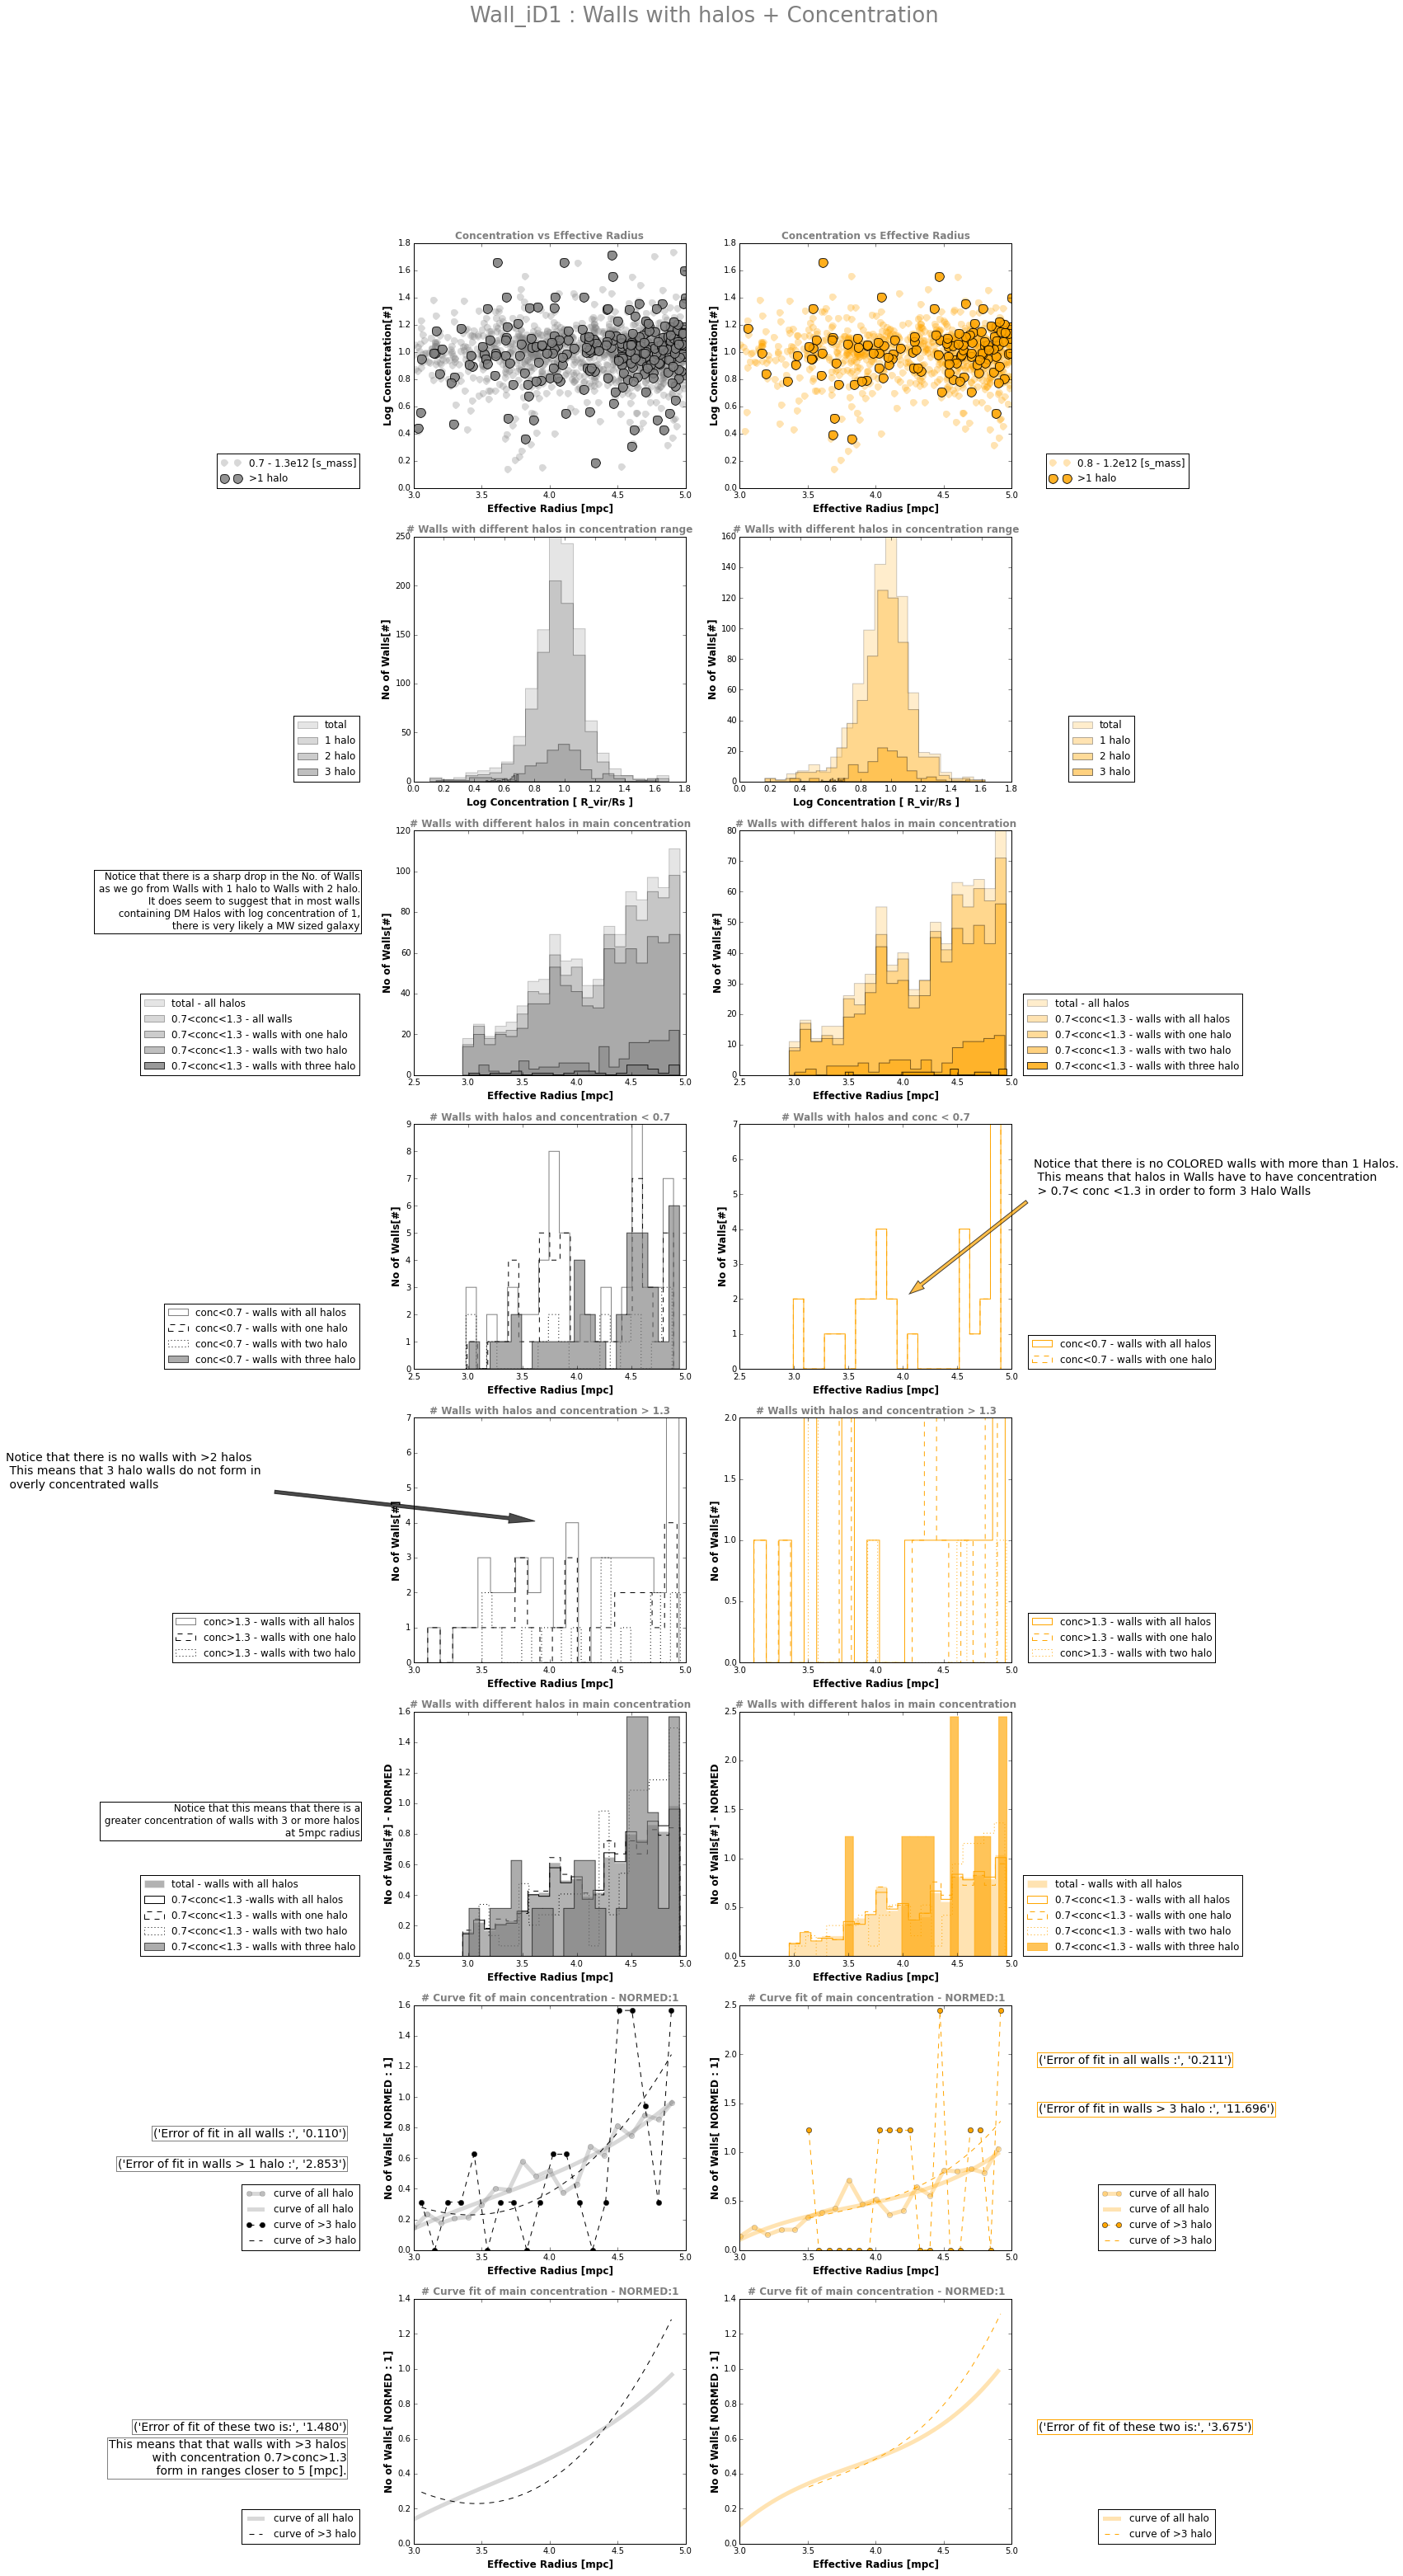

In [552]:
# E X E R C I S E  13 : WALL_iD0
# Let's plot the Council Radius of each halo within Milky Way Mass
# W A L L S  W I T H  H A L O S - C O N C E N T R A T I O N

from __future__ import division
#--------------------------------------------------------------------------------

# Let's plot this
fig,ax = plt.subplots(8,2,figsize=(13, 50))
fig.suptitle("Wall_iD1 : Walls with halos + Concentration", fontsize=26,alpha=0.5)

color1 = "orange"

# You must specify the catalogue you want to look at
catalogue =new_beh_cat1


# L E T  U S  P L O T  F O R  [ 0  ,  0]
# C O N C E N T R A T I O N 
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass_and_conc (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
#
# C O N C E N T R A T I O N   V S  E F F E C T I V E  R A D I U S
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
a =  plot_output2[4]     # Concentration 
y =  np.log10(a)
# Let's get the array the array of the frequency of the halo in each wall
ax[0,0].plot(x,y,marker='o',linestyle='none',color = 'grey',alpha=0.3,ms=9,
             markeredgewidth=0.0, label = '0.7 - 1.3e12 [s_mass]')
#
# G R A Y  W /  B L A C K  O U T L I N E 
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_conc(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
a = how_many_walls[1][:,4]     # Concentration
y =  np.log10(a)

ax[0,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')

# The axis
ax[0,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[0,0].set_ylabel('Log Concentration[#]',fontsize=12,fontweight='bold')
# The Legend
ax[0,0].set_title('Concentration vs Effective Radius',fontsize=12,fontweight='bold',alpha=0.5)
ax[0,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)


# L E T  U S  P L O T  F O R  [ 0  ,  1]
# R E D   
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass_and_conc (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
# C O N C E N T R A T I O N   V S  E F F E C T I V E  R A D I U S
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
a =  plot_output2[4]  # Concentration 
y =  np.log10(a)
# Let's get the array the array of the frequency of the halo in each wall
ax[0,1].plot(x,y,marker='o',linestyle='none',color = color1,alpha=0.3,ms=9,
             markeredgewidth=0.0, label = '0.8 - 1.2e12 [s_mass]')
# R E D   W /  B L A C K  O U T L I N E 
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_conc(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
a = how_many_walls[1][:,4]     # Concentration
y = np.log10(a)
ax[0,1].plot(x,y,marker='o',linestyle='none',color = color1,alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')

# The axis
ax[0,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[0,1].set_ylabel('Log Concentration[#]',fontsize=12,fontweight='bold')
# Te Legend
ax[0,1].set_title('Concentration vs Effective Radius',fontsize=12,fontweight='bold',alpha=0.5)
ax[0,1].legend(bbox_to_anchor=(1.65, 0), loc=4, borderaxespad=0.)



# L E T  U S  P L O T  F O R  [ 1,  0 ]
# Let us see how many walls of different halos falls within the range of concentration
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass_and_conc (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_conc(no_of_walls0, plot_output2)

# TOTAL NUMBER OF WALLS 
a = how_many_walls[0][:,4]  # concentration
x = np.log10(a)
# Let's get the array the array of the frequency of the halo in each wall
ax[1,0].hist(x,color='grey',alpha=0.2,label='total',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")
###############################
#appending information
total_no_of_walls_grey = len(x)
###############################

# WALLS WITH EXACTLY 1 HALO 
a = how_many_walls[2][:,4]  # concentration
x = np.log10(a)
# Let's get the array the array of the frequency of the halo in each wall
ax[1,0].hist(x,color='grey',alpha=0.3,label='1 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# WALLS WITH MORE THAN 1 HALO
print('Max No. of halos in walls for grey:',max(how_many_walls[1][:,1]))    # The maximum number of halos in walls
total_no_of_halos_grey = max(how_many_walls[1][:,1])

# WALLS WITH EXACTLY 2 HALO 
walls_with_2_halos = how_many_walls[1][how_many_walls[1][:,1] == 2] 
a = walls_with_2_halos[:,4]  # concentration
x = np.log10(a)
# Let's get the array the array of the frequency of the halo in each wall
ax[1,0].hist(x,color='grey',alpha=0.4,label='2 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# WALLS WITH EXACTLY 3 HALO 
walls_with_3_halos = how_many_walls[1][how_many_walls[1][:,1] == 3] 
a = walls_with_3_halos[:,3]  #  concentration
x = np.log10(a)
# Let's get the array the array of the frequency of the halo in each wall
ax[1,0].hist(x,color='grey',alpha=0.5,label='3 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# The axis
ax[1,0].set_xlabel('Log Concentration [ R_vir/Rs ]',fontsize=12,fontweight='bold')
ax[1,0].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[1,0].set_title('# Walls with different halos in concentration range',fontsize=12,fontweight='bold',alpha=0.5)
ax[1,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)




# L E T  U S  P L O T  F O R  [ 1,  1 ]
# Let us see how many walls of different halos falls within the range of concentration
# RED  
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass_and_conc (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_conc(no_of_walls0, plot_output2)

# TOTAL NUMBER OF WALLS 
a = how_many_walls[0][:,4]  # concentration
x = np.log10(a)
# Let's get the array the array of the frequency of the halo in each wall
ax[1,1].hist(x,color=color1,alpha=0.2,label='total',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")
###############################
#appending information
total_no_of_walls_grey = len(x)
###############################

# WALLS WITH EXACTLY 1 HALO 
a = how_many_walls[2][:,4]  # concentration
x = np.log10(a)
# Let's get the array the array of the frequency of the halo in each wall
ax[1,1].hist(x,color=color1,alpha=0.3,label='1 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# WALLS WITH MORE THAN 1 HALO
print('Max No. of halos in walls for color:',max(how_many_walls[1][:,1]))    # The maximum number of halos in walls
total_no_of_halos_grey = max(how_many_walls[1][:,1])

# WALLS WITH EXACTLY 2 HALO 
walls_with_2_halos = how_many_walls[1][how_many_walls[1][:,1] == 2] 
a = walls_with_2_halos[:,4]  # concentration
x = np.log10(a)
# Let's get the array the array of the frequency of the halo in each wall
ax[1,1].hist(x,color=color1,alpha=0.4,label='2 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# WALLS WITH EXACTLY 3 HALO 
walls_with_3_halos = how_many_walls[1][how_many_walls[1][:,1] == 3] 
a = walls_with_3_halos[:,3]  #  concentration
x = np.log10(a)
# Let's get the array the array of the frequency of the halo in each wall
ax[1,1].hist(x,color=color1,alpha=0.5,label='3 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# The axis
ax[1,1].set_xlabel('Log Concentration [ R_vir/Rs ]',fontsize=12,fontweight='bold')
ax[1,1].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[1,1].set_title('# Walls with different halos in concentration range',fontsize=12,fontweight='bold',alpha=0.5)
ax[1,1].legend(bbox_to_anchor=(1.45, 0), loc=4, borderaxespad=0.)




# L E T  U S  P L O T  F O R  [ 2,  0 ]
# Let us see how many walls of different halos falls within the range of concentration
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass_and_conc (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_conc(no_of_walls0, plot_output2)

# TOTAL NUMBER OF WALLS 
x = how_many_walls[0][:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[2,0].hist(x,color='grey',alpha=0.2,label='total - all halos',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")
###############################
#appending information
total_no_of_walls_grey = len(x)
###############################

# Let's get the radius and the concentration
A = how_many_walls
all_halo = A[0]       # all walls
all_halo[:,4] = np.log10(all_halo[:,4])
conc=(all_halo[:,4])      # concentration of all walls
radi=(all_halo[:,3])      # radius of all walls

# WALLS WITH DIFFERENT CONCENTRATION RANGE
#all_halo_conc_point6  = all_halo[conc<0.6]
#radi= all_halo_conc_point6[:,3] 

temp  = all_halo[conc>=0.7 ]
all_halo_conc_BETWEE  = temp[ temp[:,4]<=1.3]
radi= all_halo_conc_BETWEE[:,3] 
x = radi
ax[2,0].hist(x,color='grey',alpha=0.3,label='0.7<conc<1.3 - all walls',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

#all_halo_conc_1point2 = all_halo[conc>1.4]
#radi= all_halo_conc_1point2[:,3] 


# WALLS WITH EXACTLY 1 HALO 
A = how_many_walls
one_halo = A[2]       # 1 halo
one_halo[:,4] = np.log10(one_halo[:,4])
conc=(one_halo[:,4])      # concentration of all walls
radi=(one_halo[:,3])      # radius of all walls

temp  = one_halo[conc>=0.7 ]
one_halo_conc_BETWEE  = temp[ temp[:,4]<=1.3]
radi= one_halo_conc_BETWEE[:,3] 
x = radi
ax[2,0].hist(x,color='grey',alpha=0.4,label='0.7<conc<1.3 - walls with one halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")


# WALLS WITH EXACTLY 2 HALO 
A = how_many_walls
two_halo = A[1][A[1][:,1] == 2] # 2 halos
two_halo[:,4] = np.log10(two_halo[:,4])
conc=(two_halo[:,4])      # concentration of all walls
radi=(two_halo[:,3])      # radius of all walls

temp  = two_halo[conc>=0.7 ]
two_halo_conc_BETWEE  = temp[ temp[:,4]<=1.3]
radi= two_halo_conc_BETWEE[:,3] 
x = radi
ax[2,0].hist(x,color='grey',alpha=0.5,label='0.7<conc<1.3 - walls with two halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")


# WALLS WITH EXACTLY 3 HALO 
A = how_many_walls
tre_halo = A[1][A[1][:,1] == 3] # 2 halos
tre_halo[:,4] = np.log10(tre_halo[:,4])
conc=(tre_halo[:,4])      # concentration of all walls
radi=(tre_halo[:,3])      # radius of all walls

temp  = tre_halo[conc>=0.7 ]
tre_halo_conc_BETWEE  = temp[ temp[:,4]<=1.3]
radi= tre_halo_conc_BETWEE[:,3] 
x = radi
ax[2,0].hist(x,color='grey',alpha=0.8,label='0.7<conc<1.3 - walls with three halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# The axis
ax[2,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[2,0].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[2,0].set_title('# Walls with different halos in main concentration',fontsize=12,fontweight='bold',alpha=0.5)
ax[2,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)

# The caption
note0 = " Notice that there is a sharp drop in the No. of Walls \n as we go from Walls with 1 halo to Walls with 2 halo. \n It does seem to suggest that in most walls \n containing DM Halos with log concentration of 1,\n there is very likely a MW sized galaxy "
ax[2,0].text(2,100,note0,fontsize=12,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'black'})


# L E T  U S  P L O T  F O R  [ 2,  1 ]
# Let us see how many walls of different halos falls within the range of concentration
#R E D r  
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass_and_conc (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_conc(no_of_walls0, plot_output2)

# TOTAL NUMBER OF WALLS 
x = how_many_walls[0][:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[2,1].hist(x,color=color1,alpha=0.2,label='total - all halos',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")
###############################
#appending information
total_no_of_walls_grey = len(x)
###############################

# Let's get the radius and the concentration
A = how_many_walls
all_halo = A[0]       # all halos
all_halo[:,4] = np.log10(all_halo[:,4])
conc=(all_halo[:,4])      # concentration of all walls
radi=(all_halo[:,3])      # radius of all walls

# WALLS WITH DIFFERENT CONCENTRATION RANGE
#all_halo_conc_point6  = all_halo[conc<0.6]
#radi= all_halo_conc_point6[:,3] 

temp  = all_halo[conc>=0.7 ]
all_halo_conc_BETWEE  = temp[ temp[:,4]<=1.3]
radi= all_halo_conc_BETWEE[:,3] 
x = radi
ax[2,1].hist(x,color=color1,alpha=0.3,label='0.7<conc<1.3 - walls with all halos',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

#all_halo_conc_1point2 = all_halo[conc>1.4]
#radi= all_halo_conc_1point2[:,3] 


# WALLS WITH EXACTLY 1 HALO 
A = how_many_walls
one_halo = A[2]       # 1 halo
one_halo[:,4] = np.log10(one_halo[:,4])
conc=(one_halo[:,4])      # concentration of all walls
radi=(one_halo[:,3])      # radius of all walls

temp  = one_halo[conc>=0.7 ]
one_halo_conc_BETWEE  = temp[ temp[:,4]<=1.3]
radi= one_halo_conc_BETWEE[:,3] 
x = radi
ax[2,1].hist(x,color=color1,alpha=0.4,label='0.7<conc<1.3 - walls with one halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")


# WALLS WITH EXACTLY 2 HALO 
A = how_many_walls
two_halo = A[1][A[1][:,1] == 2] # 2 halos
two_halo[:,4] = np.log10(two_halo[:,4])
conc=(two_halo[:,4])      # concentration of all walls
radi=(two_halo[:,3])      # radius of all walls

temp  = two_halo[conc>=0.7 ]
two_halo_conc_BETWEE  = temp[ temp[:,4]<=1.3]
radi= two_halo_conc_BETWEE[:,3] 
x = radi
ax[2,1].hist(x,color=color1,alpha=0.5,label='0.7<conc<1.3 - walls with two halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")


# WALLS WITH EXACTLY 3 HALO 
A = how_many_walls
tre_halo = A[1][A[1][:,1] == 3] # 2 halos
tre_halo[:,4] = np.log10(tre_halo[:,4])
conc=(tre_halo[:,4])      # concentration of all walls
radi=(tre_halo[:,3])      # radius of all walls

temp  = tre_halo[conc>=0.7 ]
tre_halo_conc_BETWEE  = temp[ temp[:,4]<=1.3]
radi= tre_halo_conc_BETWEE[:,3] 
x = radi
ax[2,1].hist(x,color=color1,alpha=0.8,label='0.7<conc<1.3 - walls with three halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# The axis
ax[2,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[2,1].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[2,1].set_title('# Walls with different halos in main concentration',fontsize=12,fontweight='bold',alpha=0.5)
ax[2,1].legend(bbox_to_anchor=(1.85, 0), loc=4, borderaxespad=0.)




# L E T  U S  P L O T  F O R  [ 3,  0 ]
# C O N C E N T R A T I O N  < 0.7
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass_and_conc (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_conc(no_of_walls0, plot_output2)

# Let's get the radius and the concentration
A = how_many_walls
all_halo = A[0]       # all halos
all_halo[:,4] = np.log10(all_halo[:,4])
conc=(all_halo[:,4])      # concentration of all walls
radi=(all_halo[:,3])      # radius of all walls

# WALLS WITH DIFFERENT CONCENTRATION RANGE
all_halo_conc_point7  = all_halo[conc<0.7]
radi= all_halo_conc_point7[:,3] 
x = radi

ax[3,0].hist(x,color='grey',alpha=1,label='conc<0.7 - walls with all halos',bins = 20,
             histtype='step',align='left',edgecolor = 'grey')

#all_halo_conc_1point2 = all_halo[conc>1.4]
#radi= all_halo_conc_1point2[:,3] 

# WALLS WITH EXACTLY 1 HALO 
A = how_many_walls
one_halo = A[2]       # 1 halo
one_halo[:,4] = np.log10(one_halo[:,4])
conc=(one_halo[:,4])      # concentration of all walls
radi=(one_halo[:,3])      # radius of all walls

one_halo_conc_point7  = one_halo[conc<0.7]
radi= one_halo_conc_point7[:,3] 
x = radi
ax[3,0].hist(x,color= 'grey',alpha=1,label='conc<0.7 - walls with one halo',bins = 20,
             histtype='step',align='left',edgecolor = "black",linestyle='dashed')


# WALLS WITH EXACTLY 2 HALO 
A = how_many_walls
two_halo = A[1][A[1][:,1] == 2] # 2 halos
two_halo[:,4] = np.log10(two_halo[:,4])
conc=(two_halo[:,4])      # concentration of all walls
radi=(two_halo[:,3])      # radius of all walls

two_halo_conc_point7  = two_halo[conc<0.7]
radi= two_halo_conc_point7[:,3] 
x = radi

ax[3,0].hist(x,color= 'grey',alpha=1,label='conc<0.7 - walls with two halo',bins = 20,
             histtype='step',align='left',edgecolor = "black",linestyle='dotted')
# WALLS WITH EXACTLY 3 HALO 
A = how_many_walls
tre_halo = A[0][A[0][:,1] == 3] # 3 halos
tre_halo[:,4] = np.log10(tre_halo[:,4])
conc=(tre_halo[:,4])      # concentration of all walls
radi=(tre_halo[:,3])      # radius of all walls
tre_halo_conc_point7  = tre_halo[conc<0.7]
radi= tre_halo_conc_point7[:,3] 
x = radi
ax[3,0].hist(x,color='grey',alpha=0.65,label='conc<0.7 - walls with three halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# The axis
ax[3,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[3,0].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[3,0].set_title('# Walls with halos and concentration < 0.7',fontsize=12,fontweight='bold',alpha=0.5)
ax[3,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)



# L E T  U S  P L O T  F O R  [ 4,  0 ]
# C O N C E N T R A T I O N  > 1.3
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass_and_conc (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_conc(no_of_walls0, plot_output2)

# Let's get the radius and the concentration
A = how_many_walls
all_halo = A[0]       # all halos
all_halo[:,4] = np.log10(all_halo[:,4])
conc=(all_halo[:,4])      # concentration of all walls
radi=(all_halo[:,3])      # radius of all walls

# WALLS WITH DIFFERENT CONCENTRATION RANGE
all_halo_conc_point7  = all_halo[conc>1.3]
radi= all_halo_conc_point7[:,3] 
x = radi

ax[4,0].hist(x,color='grey',alpha=1,label='conc>1.3 - walls with all halos',bins = 20,
             histtype='step',align='left',edgecolor = 'grey')

#all_halo_conc_1point2 = all_halo[conc>1.4]
#radi= all_halo_conc_1point2[:,3] 

# WALLS WITH EXACTLY 1 HALO 
A = how_many_walls
one_halo = A[2]       # 1 halo
one_halo[:,4] = np.log10(one_halo[:,4])
conc=(one_halo[:,4])      # concentration of all walls
radi=(one_halo[:,3])      # radius of all walls

one_halo_conc_point7  = one_halo[conc>1.3]
radi= one_halo_conc_point7[:,3] 
x = radi


ax[4,0].hist(x,color= 'grey',alpha=1,label='conc>1.3 - walls with one halo',bins = 20,
             histtype='step',align='left',edgecolor = "black",linestyle='dashed')


# WALLS WITH EXACTLY 2 HALO 
A = how_many_walls
two_halo = A[1][A[1][:,1] == 2] # 2 halos
two_halo[:,4] = np.log10(two_halo[:,4])
conc=(two_halo[:,4])      # concentration of all walls
radi=(two_halo[:,3])      # radius of all walls

two_halo_conc_point7  = two_halo[conc>1.3]
radi= two_halo_conc_point7[:,3] 
x = radi

ax[4,0].hist(x,color= 'grey',alpha=1,label='conc>1.3 - walls with two halo',bins = 20,
             histtype='step',align='left',edgecolor = "black",linestyle='dotted')


# WALLS WITH EXACTLY 3 HALO 
#A = how_many_walls
#tre_halo = A[0][A[0][:,1] == 3] # 3 halos
#tre_halo[:,4] = np.log10(tre_halo[:,4])
#conc=(tre_halo[:,4])      # concentration of all walls
#radi=(tre_halo[:,3])      # radius of all walls
#tre_halo_conc_point7  = tre_halo[conc>1.3]
#radi= tre_halo_conc_point7[:,3] 
#x = radi
#ax[4,0].hist(x,color='grey',alpha=0.65,label='conc>1.3 - walls with three halo',bins = 20,
#             histtype='stepfilled',align='left',edgecolor = "black")

# The axis
ax[4,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[4,0].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[4,0].set_title('# Walls with halos and concentration > 1.3',fontsize=12,fontweight='bold',alpha=0.5)
ax[4,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)

# The aarow
ax[4,0].annotate('Notice that there is no walls with >2 halos \n This means that 3 halo walls do not form in \n overly concentrated walls', 
                 xy=(4, 4), xytext=(0, 5),fontsize=14,
            arrowprops=dict(facecolor="black", shrink=0.05,alpha = 0.7))


# L E T  U S  P L O T  F O R  [ 5,  0 ]
# N O R M E D 
# Let us see how many walls of different halos falls within the range of concentration
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass_and_conc (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_conc(no_of_walls0, plot_output2)

# TOTAL NUMBER OF WALLS 
x = how_many_walls[0][:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[5,0].hist(x,color='black',alpha=0.3,label='total - walls with all halos',bins = 20, normed = True,
             histtype='stepfilled',align='left',edgecolor = "white")
###############################
#appending information
total_no_of_walls_grey = len(x)
###############################

# Let's get the radius and the concentration
A = how_many_walls
all_halo = A[0]       # all halos
all_halo[:,4] = np.log10(all_halo[:,4])
conc=(all_halo[:,4])      # concentration of all walls
radi=(all_halo[:,3])      # radius of all walls

# WALLS WITH DIFFERENT CONCENTRATION RANGE
#all_halo_conc_point6  = all_halo[conc<0.6]
#radi= all_halo_conc_point6[:,3] 

temp  = all_halo[conc>=0.7 ]
all_halo_conc_BETWEE  = temp[ temp[:,4]<=1.3]
radi= all_halo_conc_BETWEE[:,3] 
x = radi
count,bins,ignored = ax[5,0].hist(x,color='grey',alpha=1,label='0.7<conc<1.3 -walls with all halos',bins = 20,normed = True,
             histtype='step',align='left',edgecolor = "black")

#all_halo_conc_1point2 = all_halo[conc>1.4]
#radi= all_halo_conc_1point2[:,3] 


# WALLS WITH EXACTLY 1 HALO 
A = how_many_walls
one_halo = A[2]       # 1 halo
one_halo[:,4] = np.log10(one_halo[:,4])
conc=(one_halo[:,4])      # concentration of all walls
radi=(one_halo[:,3])      # radius of all walls

temp  = one_halo[conc>=0.7 ]
one_halo_conc_BETWEE  = temp[ temp[:,4]<=1.3]
radi= one_halo_conc_BETWEE[:,3] 
x = radi
ax[5,0].hist(x,color='grey',alpha=1,label='0.7<conc<1.3 - walls with one halo',bins = 20,normed = True,
             histtype='step',align='left',edgecolor = "black",linestyle='dashed')


# WALLS WITH EXACTLY 2 HALO 
A = how_many_walls
two_halo = A[1][A[1][:,1] == 2] # 2 halos
two_halo[:,4] = np.log10(two_halo[:,4])
conc=(two_halo[:,4])      # concentration of all walls
radi=(two_halo[:,3])      # radius of all walls

temp  = two_halo[conc>=0.7 ]
two_halo_conc_BETWEE  = temp[ temp[:,4]<=1.3]
radi= two_halo_conc_BETWEE[:,3] 
x = radi
ax[5,0].hist(x,color='grey',alpha=1,label='0.7<conc<1.3 - walls with two halo',bins = 20,normed = True,
             histtype='step',align='left',edgecolor = "black",linestyle='dotted')


# WALLS WITH EXACTLY 3 HALO 
A = how_many_walls
tre_halo = A[1][A[1][:,1] == 3] # 2 halos
tre_halo[:,4] = np.log10(tre_halo[:,4])
conc=(tre_halo[:,4])      # concentration of all walls
radi=(tre_halo[:,3])      # radius of all walls

temp  = tre_halo[conc>=0.7 ]
tre_halo_conc_BETWEE  = temp[ temp[:,4]<=1.3]
radi= tre_halo_conc_BETWEE[:,3] 
x = radi
count1, bins1, ignored =ax[5,0].hist(x,color='grey',alpha=0.65,label='0.7<conc<1.3 - walls with three halo',bins = 20,normed = True,
             histtype='stepfilled',align='left',edgecolor = "black")

# The axis
ax[5,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[5,0].set_ylabel('No of Walls[#] - NORMED',fontsize=12,fontweight='bold')
# The Legend
ax[5,0].set_title('# Walls with different halos in main concentration',fontsize=12,fontweight='bold',alpha=0.5)
ax[5,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)

# The caption
note0 = " Notice that this means that there is a \n greater concentration of walls with 3 or more halos \n at 5mpc radius  "
ax[5,0].text(2,1,note0,fontsize=12,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'black'})



# L E T  U S  P L O T  F O R  [ 6  ,  0]
#  C H I  - S Q U A R E D  F I T 

# Let's plot the distribution of the histogram
y = count
x = np.delete(bins, -1)


# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
all_halo_fit = x_new, y_new

# calculate the chi-square error
err = format(np.sum((np.polyval(np.polyfit(x, y, 2), x) - y)**2),'.3f')
note0 = 'Error of fit in all walls :', err

# Let us plot it
ax[6,0].plot(x,y,'o', x_new, y_new, color = 'grey',linestyle='-', linewidth=5,
             alpha=0.3,label = "curve of all halo")

# Let's plot the distribution of the histogram
y = count1
x = np.delete(bins1, -1)

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
more_than_1_fit = x_new,y_new

# calculate the chi-square error

err = format(np.sum((np.polyval(np.polyfit(x, y, 2), x) - y)**2),'.3f')
note1 = 'Error of fit in walls > 1 halo :', err

ax[6,0].plot(x,y,'o', x_new, y_new, color = 'black',linestyle='--', 
             alpha = 1, label = "curve of >3 halo",linewidth = 1)

# The axis
ax[6,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[6,0].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[6,0].set_title('# Curve fit of main concentration - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[6,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The Caption
ax[6,0].text(2.5,0.8,note0,fontsize=14,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'grey'})
ax[6,0].text(2.5,0.6,note1,fontsize=14,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'grey'})



# L E T  U S  P L O T  F O R  [ 7  ,  0]
#  C H I  - S Q U A R E D  F I T 

# Let's plot the distribution of the histogram
y = count
x = np.delete(bins, -1)


# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
all_halo_fit = x_new, y_new


# Let us plot it
ax[7,0].plot( x_new, y_new, color = 'grey',linestyle='-', linewidth=5,
             alpha=0.3,label = "curve of all halo")

# Let's plot the distribution of the histogram
y = count1
x = np.delete(bins1, -1)

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new1 = np.linspace(x[0], x[-1], 50)
y_new1= f(x_new)
more_than_1_fit = x_new,y_new

# calculate the chi-square error
err = format(np.sum((np.polyval(np.polyfit(x, y, 2), x) - y)**2),'.3f')
note1 = 'Error of fit in walls > 1 halo :', err

ax[7,0].plot( x_new1, y_new1, color = 'black',linestyle='--', 
             alpha = 1, label = "curve of >3 halo",linewidth = 1)

# Their errors
squared = (y_new1 -y_new)**2
term = squared/y_new
err = format(np.sum(term),'.3f')


note1 = 'Error of fit of these two is:', err
ax[7,0].text(2.5,0.7,note0,fontsize=14,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'grey'})



# The axis
ax[7,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[7,0].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[7,0].set_title('# Curve fit of main concentration - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[7,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The Caption
note0 = 'Error of fit of these two is:', err
ax[7,0].text(2.5,0.7,note0,fontsize=14,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'grey'})


note1 = 'This means that that walls with >3 halos \n with concentration 0.7>conc>1.3 \n form in ranges closer to 5 [mpc]. '
ax[7,0].text(2.5,0.6,note1,fontsize=14,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'grey'})



######################################################################################################


## L E T  U S  P L O T  F O R  [ 3,  1 ]
# Let us see how many walls of different halos falls within the range of concentration
#  R E D  
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.e12
plot_output2 = give_me_reduced_rad_and_mass_and_conc (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_conc(no_of_walls0, plot_output2)

# Let's get the radius and the concentration
A = how_many_walls
all_halo = A[0]       # all halos
all_halo[:,4] = np.log10(all_halo[:,4])
conc=(all_halo[:,4])      # concentration of all walls
radi=(all_halo[:,3])      # radius of all walls

# WALLS WITH DIFFERENT CONCENTRATION RANGE
all_halo_conc_point7  = all_halo[conc<0.7]
radi= all_halo_conc_point7[:,3] 
x = radi

ax[3,1].hist(x,color=color1,alpha=1,label='conc<0.7 - walls with all halos',bins = 20,
             histtype='step',align='left',edgecolor = color1)

#all_halo_conc_1point2 = all_halo[conc>1.4]
#radi= all_halo_conc_1point2[:,3] 

# WALLS WITH EXACTLY 1 HALO 
A = how_many_walls
one_halo = A[2]       # 1 halo
one_halo[:,4] = np.log10(one_halo[:,4])
conc=(one_halo[:,4])      # concentration of all walls
radi=(one_halo[:,3])      # radius of all walls

one_halo_conc_point7  = one_halo[conc<0.7]
radi= one_halo_conc_point7[:,3] 
x = radi
ax[3,1].hist(x,color= color1,alpha=1,label='conc<0.7 - walls with one halo',bins = 20,
             histtype='step',align='left',edgecolor = color1,linestyle='dashed')

# WALLS WITH EXACTLY 2 HALO 
#A = how_many_walls
#two_halo = A[1][A[1][:,1] == 2] # 2 halos
#two_halo[:,4] = np.log10(two_halo[:,4])
#conc=(two_halo[:,4])      # concentration of all walls
#radi=(two_halo[:,3])      # radius of all walls

#two_halo_conc_point7  = two_halo[conc<0.7]
#radi= two_halo_conc_point7[:,3] 
#x = radi

#ax[3,1].hist(x,color= color1,alpha=1,label='conc<0.7 - walls with two halo',bins = 20,
#             histtype='step',align='left',edgecolor = color1,linestyle='dotted')
#  WALLS WITH EXACTLY 3 HALO 
#A = how_many_walls
#tre_halo = A[0][A[0][:,1] == 3] # 3 halos
#tre_halo[:,4] = np.log10(tre_halo[:,4])
#conc=(tre_halo[:,4])      # concentration of all walls
#radi=(tre_halo[:,3])      # radius of all walls
#tre_halo_conc_point7  = tre_halo[conc<0.7]
#radi= tre_halo_conc_point7[:,3] 
#x = radi
#ax[3,1].hist(x,color=color1,alpha=0.65,label='0.7<conc<1.3 - three halo',bins = 20,
#             histtype='stepfilled',align='left',edgecolor = color1)


# The axis
ax[3,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[3,1].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[3,1].set_title('# Walls with halos and conc < 0.7',fontsize=12,fontweight='bold',alpha=0.5)
ax[3,1].legend(bbox_to_anchor=(1.75, 0), loc=4, borderaxespad=0.)



# The aarow
ax[3,1].annotate("Notice that there is no COLORED walls with more than 1 Halos. \n This means that halos in Walls have to have concentration \n > 0.7< conc <1.3 in order to form 3 Halo Walls ", 
                 xy=(4, 2), xytext=(5.2, 5),fontsize=14,
            arrowprops=dict(facecolor=color1, shrink=0.05,alpha = 0.7))




# L E T  U S  P L O T  F O R  [ 4,  1 ]
# C O N C E N T R A T I O N  > 1.3
# R E D 
plot_output2 = give_me_reduced_rad_and_mass_and_conc (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_conc(no_of_walls0, plot_output2)

# Let's get the radius and the concentration
A = how_many_walls
all_halo = A[0]       # all halos
all_halo[:,4] = np.log10(all_halo[:,4])
conc=(all_halo[:,4])      # concentration of all walls
radi=(all_halo[:,3])      # radius of all walls

# WALLS WITH DIFFERENT CONCENTRATION RANGE
all_halo_conc_point7  = all_halo[conc>1.3]
radi= all_halo_conc_point7[:,3] 
x = radi

ax[4,1].hist(x,color=color1,alpha=1,label='conc>1.3 - walls with all halos',bins = 20,
             histtype='step',align='left',edgecolor =  color1)

#all_halo_conc_1point2 = all_halo[conc>1.4]
#radi= all_halo_conc_1point2[:,3] 

# WALLS WITH EXACTLY 1 HALO 
A = how_many_walls
one_halo = A[2]       # 1 halo
one_halo[:,4] = np.log10(one_halo[:,4])
conc=(one_halo[:,4])      # concentration of all walls
radi=(one_halo[:,3])      # radius of all walls

one_halo_conc_point7  = one_halo[conc>1.3]
radi= one_halo_conc_point7[:,3] 
x = radi


ax[4,1].hist(x,color= color1,alpha=1,label='conc>1.3 - walls with one halo',bins = 20,
             histtype='step',align='left',edgecolor =  color1,linestyle='dashed')


# WALLS WITH EXACTLY 2 HALO 
A = how_many_walls
two_halo = A[1][A[1][:,1] == 2] # 2 halos
two_halo[:,4] = np.log10(two_halo[:,4])
conc=(two_halo[:,4])      # concentration of all walls
radi=(two_halo[:,3])      # radius of all walls

two_halo_conc_point7  = two_halo[conc>1.3]
radi= two_halo_conc_point7[:,3] 
x = radi

ax[4,1].hist(x,color= color1,alpha=1,label='conc>1.3 - walls with two halo',bins = 20,
             histtype='step',align='left',edgecolor = color1,linestyle='dotted')


# WALLS WITH EXACTLY 3 HALO 
#A = how_many_walls
#tre_halo = A[0][A[0][:,1] == 3] # 3 halos
#tre_halo[:,4] = np.log10(tre_halo[:,4])
#conc=(tre_halo[:,4])      # concentration of all walls
#radi=(tre_halo[:,3])      # radius of all walls
#tre_halo_conc_point7  = tre_halo[conc>1.3]
#radi= tre_halo_conc_point7[:,3] 
#x = radi
#ax[4,1].hist(x,color= color1,alpha=0.65,label='conc>1.3 - walls with three halo',bins = 20,
#             histtype='stepfilled',align='left',edgecolor =  color1)

# The axis
ax[4,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[4,1].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[4,1].set_title('# Walls with halos and concentration > 1.3',fontsize=12,fontweight='bold',alpha=0.5)
ax[4,1].legend(bbox_to_anchor=(1.75, 0), loc=4, borderaxespad=0.)

# The aarow
#ax[4,0].annotate('Notice that there is no walls with >3 halos \n This means that 3 halo walls do not form in \n overly concentrated walls', xy=(4, 4), xytext=(0, 14),fontsize=14,
#            arrowprops=dict(facecolor="black", shrink=0.05,alpha = 0.7))





# L E T  U S  P L O T  F O R  [ 5,  1 ]
# Let us see how many walls of different halos falls within the range of concentration
#R E D r  
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass_and_conc (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_conc(no_of_walls0, plot_output2)

# TOTAL NUMBER OF WALLS 
x = how_many_walls[0][:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
count,bins,ignored = ax[5,1].hist(x,color=color1,alpha=0.3,label='total - walls with all halos',bins = 20, normed = True,
             histtype='stepfilled',align='left',edgecolor = "white")
###############################
#appending information
total_no_of_walls_red = len(x)
###############################

# Let's get the radius and the concentration
A = how_many_walls
all_halo = A[0]       # all halos
all_halo[:,4] = np.log10(all_halo[:,4])
conc=(all_halo[:,4])      # concentration of all walls
radi=(all_halo[:,3])      # radius of all walls

# WALLS WITH DIFFERENT CONCENTRATION RANGE
#all_halo_conc_point6  = all_halo[conc<0.6]
#radi= all_halo_conc_point6[:,3] 

temp  = all_halo[conc>=0.7 ]
all_halo_conc_BETWEE  = temp[ temp[:,4]<=1.3]
radi= all_halo_conc_BETWEE[:,3] 
x = radi
ax[5,1].hist(x,color=color1,alpha=1,label='0.7<conc<1.3 - walls with all halos',bins = 20,normed = True,
             histtype='step',align='left',edgecolor =color1)

#all_halo_conc_1point2 = all_halo[conc>1.4]
#radi= all_halo_conc_1point2[:,3] 


# WALLS WITH EXACTLY 1 HALO 
A = how_many_walls
one_halo = A[2]       # 1 halo
one_halo[:,4] = np.log10(one_halo[:,4])
conc=(one_halo[:,4])      # concentration of all walls
radi=(one_halo[:,3])      # radius of all walls

temp  = one_halo[conc>=0.7 ]
one_halo_conc_BETWEE  = temp[ temp[:,4]<=1.3]
radi= one_halo_conc_BETWEE[:,3] 
x = radi
ax[5,1].hist(x,color=color1,alpha=1,label='0.7<conc<1.3 - walls with one halo',bins = 20,normed = True,
             histtype='step',align='left',edgecolor = color1,linestyle='dashed')


# WALLS WITH EXACTLY 2 HALO 
A = how_many_walls
two_halo = A[1][A[1][:,1] == 2] # 2 halos
two_halo[:,4] = np.log10(two_halo[:,4])
conc=(two_halo[:,4])      # concentration of all walls
radi=(two_halo[:,3])      # radius of all walls

temp  = two_halo[conc>=0.7 ]
two_halo_conc_BETWEE  = temp[ temp[:,4]<=1.3]
radi= two_halo_conc_BETWEE[:,3] 
x = radi
ax[5,1].hist(x,color= color1,alpha=1,label='0.7<conc<1.3 - walls with two halo',bins = 20,normed = True,
             histtype='step',align='left',edgecolor = color1,linestyle='dotted')


# WALLS WITH EXACTLY 3 HALO 
A = how_many_walls
tre_halo = A[1][A[1][:,1] == 3] # 2 halos
tre_halo[:,4] = np.log10(tre_halo[:,4])
conc=(tre_halo[:,4])      # concentration of all walls
radi=(tre_halo[:,3])      # radius of all walls

temp  = tre_halo[conc>=0.7 ]
tre_halo_conc_BETWEE  = temp[ temp[:,4]<=1.3]
radi= tre_halo_conc_BETWEE[:,3] 
x = radi
count1,bins1,ignored = ax[5,1].hist(x,color=color1,alpha=0.65,label='0.7<conc<1.3 - walls with three halo',bins = 20,normed = True,
             histtype='stepfilled',align='left',edgecolor = color1)

# The axis
ax[5,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[5,1].set_ylabel('No of Walls[#] - NORMED',fontsize=12,fontweight='bold')
# The Legend
ax[5,1].set_title('# Walls with different halos in main concentration',fontsize=12,fontweight='bold',alpha=0.5)
ax[5,1].legend(bbox_to_anchor=(1.85, 0), loc=4, borderaxespad=0.)




# L E T  U S  P L O T  F O R  [ 6  ,  1]
#  C H I  - S Q U A R E D  F I T 

# Let's plot the distribution of the histogram
y = count
x = np.delete(bins, -1)


# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
all_halo_fit = x_new, y_new

# calculate the chi-square error
err = format(np.sum((np.polyval(np.polyfit(x, y, 2), x) - y)**2),'.3f')
note0 = 'Error of fit in all walls :', err

# Let us plot it
ax[6,1].plot(x,y,'o', x_new, y_new, color = color1,linestyle='-', linewidth=5,
             alpha=0.3,label = "curve of all halo")

# Let's plot the distribution of the histogram
y = count1
x = np.delete(bins1, -1)

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
more_than_1_fit = x_new,y_new

# calculate the chi-square error

err = format(np.sum((np.polyval(np.polyfit(x, y, 2), x) - y)**2),'.3f')
note1 = 'Error of fit in walls > 3 halo :', err

ax[6,1].plot(x,y,'o', x_new, y_new, color = color1,linestyle='--', 
             alpha = 1, label = "curve of >3 halo",linewidth = 1)

# The axis
ax[6,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[6,1].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[6,1].set_title('# Curve fit of main concentration - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[6,1].legend(bbox_to_anchor=(1.75, 0), loc=4, borderaxespad=0.)
# The Caption
ax[6,1].text(5.2,2,note0,fontsize=14,ha='left', va='top',
             bbox={'facecolor':'white','edgecolor':color1})
ax[6,1].text(5.2,1.5,note1,fontsize=14,ha='left', va='top',
             bbox={'facecolor':'white','edgecolor':color1})


# L E T  U S  P L O T  F O R  [ 7  ,  1]
#  C H I  - S Q U A R E D  F I T 

# Let's plot the distribution of the histogram
y = count
x = np.delete(bins, -1)


# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
all_halo_fit = x_new, y_new


# Let us plot it
ax[7,1].plot( x_new, y_new, color = color1,linestyle='-', linewidth=5,
             alpha=0.3,label = "curve of all halo")

# Let's plot the distribution of the histogram
y = count1
x = np.delete(bins1, -1)

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new1 = np.linspace(x[0], x[-1], 50)
y_new1= f(x_new1)

ax[7,1].plot( x_new1, y_new1, color = color1,linestyle='--', 
             alpha = 1, label = "curve of >3 halo",linewidth = 1)

# Their errors
squared = (y_new1 -y_new)**2
term = squared/y_new
err = format(np.sum(term),'.3f')



# The axis
ax[7,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[7,1].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[7,1].set_title('# Curve fit of main concentration - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[7,1].legend(bbox_to_anchor=(1.75, 0), loc=4, borderaxespad=0.)
# The Caption
note0 = 'Error of fit of these two is:', err
ax[7,1].text(5.2,0.7,note0,fontsize=14,ha='left', va='top',
             bbox={'facecolor':'white','edgecolor':color1})


In [369]:

def give_me_sfr (catalogue):
    '''We are getting the starformation rate added to the catalogue
    Wall_iD        Halo_Catalogue_iD     Viral_Mass          Effective_Radius
    Spin           Spin_Bullock          Ang_Mo.(x)          Ang_Mo.(y) 
    Ang_Mo.(z)     Rvir                  Concentration       Mass_Accretion_Rate
    log_M/log_M*   Mdot*/M_inst*         Ellipsoid(x)        Ellipsoid(y)
    Ellipsoid_(z)  is_it_aligned         mod_of_ang          SFR             '''       
    

    # We are going to use SHARC to define the star formation rate 

    # f : The steallar-to-halo mass ratio
    Mass_Acc_Rate = catalogue[:,11]
    logM_logMstar = catalogue[:,12]
    Virial_Mass = catalogue[:,2]
    a = logM_logMstar

    f = Virial_Mass**((1-a)/a)

    # star_formation_effeciency
    Mdot_M_inst_star = catalogue[:,13]
    Mdot_M_inst_halo = Mass_Acc_Rate/Virial_Mass
    star_form_eff = np.zeros(len(Mdot_M_inst_halo))
    for i in range(len(star_form_eff)):
        if Mdot_M_inst_halo[i] !=0:  
            star_form_eff[i] = Mdot_M_inst_star[i]/Mdot_M_inst_halo[i]
        else:
            star_form_eff[i] = 0
        

    # star formation rate
    SFR = f * star_form_eff * Mass_Acc_Rate
    
    # Let us create empty columns to which we can add
    let_us_add = np.zeros((len(catalogue),1))
    catalogue = np.concatenate((catalogue, let_us_add), axis=1)

    # Let's create Behroozi's array!
    catalogue[:,19] = SFR
    
    return catalogue

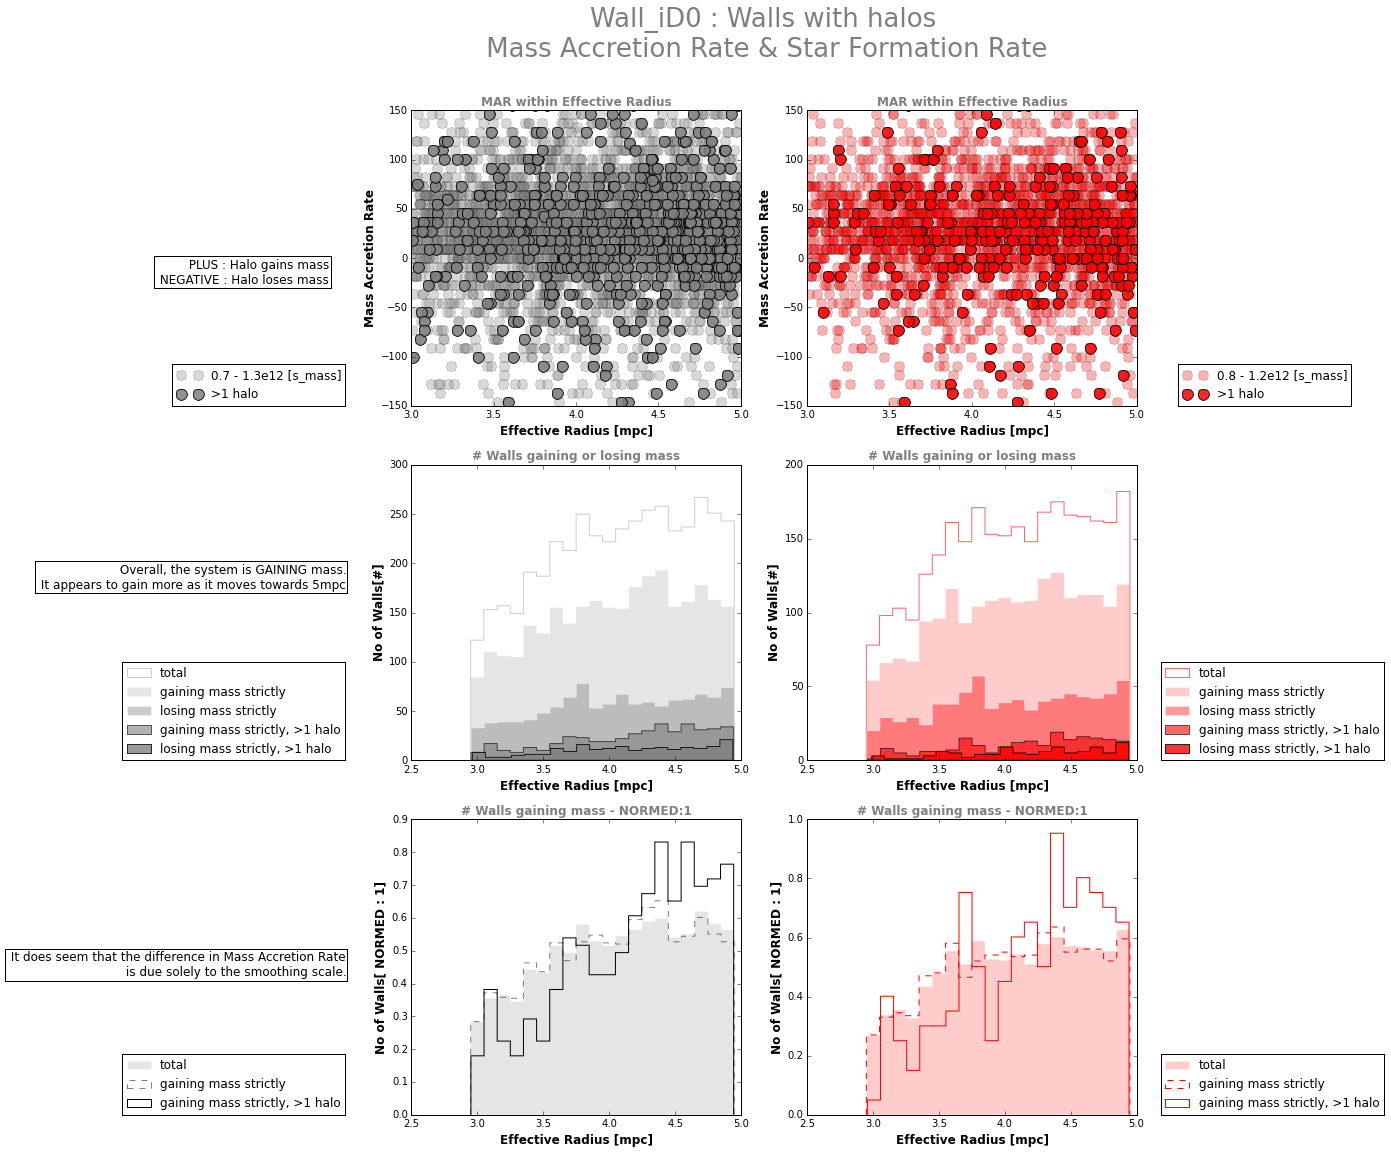

In [542]:
# E X E R C I S E  12 : WALL_iD0
# Let's plot the Council Radius of each halo within Milky Way Mass
# W A L L S  W I T H  H A L O S 

from __future__ import division
#--------------------------------------------------------------------------------

# Let's plot this
fig,ax = plt.subplots(3,2,figsize=(13,18))
fig.suptitle("Wall_iD0 : Walls with halos \n Mass Accretion Rate & Star Formation Rate", fontsize=26,alpha=0.5)

color1 = "Red"


# You must specify the catalogue you want to look at
catalogue =new_beh_cat0

# L E T  U S  P L O T  F O R  [ 0  ,  0]
# Let us see how many walls of different Mass Accretion Rate falls within the effective radius
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass_and_mar (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)

#  MAR    V S  E F F E C T I V E  R A D I U S
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_mar(no_of_walls0, plot_output2)
x = how_many_walls[0][:,3]     # Radius
y = how_many_walls[0][:,4]     # MAR
# Let us plot it 
ax[0,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=0.3,ms=10,label = '0.7 - 1.3e12 [s_mass]')

# G R A Y   W /  G R A Y   O U T L I N E 
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_mar(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # MAR
# Let us plot it
ax[0,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')

# Let's limit it
ax[0,0].set_ylim(-150,150)
# The axis
ax[0,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[0,0].set_ylabel('Mass Accretion Rate',fontsize=12,fontweight='bold')
# The Legend
ax[0,0].set_title('MAR within Effective Radius',fontsize=12,fontweight='bold',alpha=0.5)
ax[0,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The caption
note0 = " PLUS : Halo gains mass \n NEGATIVE : Halo loses mass "
ax[0,0].text(2.5,0,note0,fontsize=12,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'black'})


# L E T  U S  P L O T  F O R  [ 1  ,  0]
#  MAR +ve OR -ve :  Histogram  in  E F F E C T I V E  R A D I U S
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_mar(no_of_walls0, plot_output2)
x = how_many_walls[0][:,3]     # Radius
y = how_many_walls[0][:,4]     # MAR
x1 = x[np.where(y > 0)]
x2 = x[np.where(y < 0)]

# TOTAL NUMBER OF WALLS 
ax[1,0].hist(x,color='grey',alpha=0.2,label='total',bins = 20,
             histtype='step',align='left',edgecolor = "black")
# Losing or gaining 
ax[1,0].hist(x1,color='grey',alpha=0.2,label='gaining mass strictly',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "white")
ax[1,0].hist(x2,color='grey',alpha=0.4,label='losing mass strictly',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "white")

# G R A Y   W /  G R A Y   O U T L I N E 
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # MAR
x1 = x[np.where(y > 0)]
x2 = x[np.where(y < 0)]

ax[1,0].hist(x1,color='grey',alpha=0.6,label='gaining mass strictly, >1 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

ax[1,0].hist(x2,color='grey',alpha=0.8,label='losing mass strictly, >1 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# The axis
ax[1,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[1,0].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[1,0].set_title('# Walls gaining or losing mass',fontsize=12,fontweight='bold',alpha=0.5)
ax[1,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The caption
note0 = " Overall, the system is GAINING mass. \n It appears to gain more as it moves towards 5mpc "
ax[1,0].text(2,200,note0,fontsize=12,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'black'})


# L E T  U S  P L O T  F O R  [ 2  ,  0]
#  MAR +ve OR -ve :  Histogram  in  E F F E C T I V E  R A D I U S
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_mar(no_of_walls0, plot_output2)
x = how_many_walls[0][:,3]     # Radius
y = how_many_walls[0][:,4]     # MAR
x1 = x[np.where(y > 0)]
x2 = x[np.where(y < 0)]

# TOTAL NUMBER OF WALLS 
ax[2,0].hist(x,color='grey',alpha=0.2,label='total',bins = 20,normed = True,
             histtype='stepfilled',align='left',edgecolor = "white")
# Losing or gaining 
ax[2,0].hist(x1,color='grey',alpha=0.5,label='gaining mass strictly',bins = 20,normed = True,
             histtype='step',align='left',edgecolor = "black",linestyle='dashed')


# G R A Y   W /  G R A Y   O U T L I N E 
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # MAR
x1 = x[np.where(y > 0)]
x2 = x[np.where(y < 0)]

ax[2,0].hist(x1,color='grey',alpha=1,label='gaining mass strictly, >1 halo',bins = 20,normed = True,
             histtype='step',align='left',edgecolor = "black")

# The axis
ax[2,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[2,0].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[2,0].set_title('# Walls gaining mass - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[2,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The caption
note0 = " It does seem that the difference in Mass Accretion Rate \n is due solely to the smoothing scale. "
ax[2,0].text(2,0.5,note0,fontsize=12,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'black'})







# L E T  U S  P L O T  F O R  [ 0  ,  1 ]
# Let us see how many walls of different Mass Accretion Rate falls within the effective radius
# R E D 
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass_and_mar (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)

#  MAR    V S  E F F E C T I V E  R A D I U S
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_mar(no_of_walls0, plot_output2)
x = how_many_walls[0][:,3]     # Radius
y = how_many_walls[0][:,4]     # MAR
# Let us plot it 
ax[0,1].plot(x,y,marker='o',linestyle='none',color=color1,alpha=0.3,ms=10,label = '0.8 - 1.2e12 [s_mass]')

# R E D   W /  R E D   O U T L I N E 
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_mar(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # MAR
# Let us plot it
ax[0,1].plot(x,y,marker='o',linestyle='none',color=color1,alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')

# Let's limit it
ax[0,1].set_ylim(-150,150)
# The axis
ax[0,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[0,1].set_ylabel('Mass Accretion Rate',fontsize=12,fontweight='bold')
# The Legend
ax[0,1].set_title('MAR within Effective Radius',fontsize=12,fontweight='bold',alpha=0.5)
ax[0,1].legend(bbox_to_anchor=(1.65, 0), loc=4, borderaxespad=0.)



# L E T  U S  P L O T  F O R  [ 1  ,  1]
#  MAR +ve OR -ve :  Histogram  in  E F F E C T I V E  R A D I U S
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_mar(no_of_walls0, plot_output2)
x = how_many_walls[0][:,3]     # Radius
y = how_many_walls[0][:,4]     # MAR
x1 = x[np.where(y > 0)]
x2 = x[np.where(y < 0)]

# TOTAL NUMBER OF WALLS 

ax[1,1].hist(x,color='orange',alpha=0.6,label='total',bins = 20,
             histtype='step',align='left',edgecolor = color1)

# Losing or gaining 
ax[1,1].hist(x1,color=color1,alpha=0.2,label='gaining mass strictly',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "white")
ax[1,1].hist(x2,color=color1,alpha=0.4,label='losing mass strictly',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "white")

# R E D   W /  R E D   O U T L I N E 
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # MAR
x1 = x[np.where(y > 0)]
x2 = x[np.where(y < 0)]

ax[1,1].hist(x1,color=color1,alpha=0.6,label='gaining mass strictly, >1 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

ax[1,1].hist(x2,color=color1,alpha=0.8,label='losing mass strictly, >1 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# The axis
ax[1,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[1,1].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[1,1].set_title('# Walls gaining or losing mass',fontsize=12,fontweight='bold',alpha=0.5)
ax[1,1].legend(bbox_to_anchor=(1.75, 0), loc=4, borderaxespad=0.)



# L E T  U S  P L O T  F O R  [ 2  ,  1]
#  MAR +ve OR -ve :  Histogram  in  E F F E C T I V E  R A D I U S
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_mar(no_of_walls0, plot_output2)
x = how_many_walls[0][:,3]     # Radius
y = how_many_walls[0][:,4]     # MAR
x1 = x[np.where(y > 0)]
x2 = x[np.where(y < 0)]

# TOTAL NUMBER OF WALLS 
ax[2,1].hist(x,color=color1,alpha=0.2,label='total',bins = 20,normed = True,
             histtype='stepfilled',align='left',edgecolor = "white")
# Losing or gaining 
ax[2,1].hist(x1,color=color1,alpha=1,label='gaining mass strictly',bins = 20,normed = True,
             histtype='step',align='left',edgecolor = color1,linestyle='dashed')


# G R A Y   W /  G R A Y   O U T L I N E 
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # MAR
x1 = x[np.where(y > 0)]
x2 = x[np.where(y < 0)]

ax[2,1].hist(x1,color='grey',alpha=1,label='gaining mass strictly, >1 halo',bins = 20,normed = True,
             histtype='step',align='left',edgecolor = color1)

# The axis
ax[2,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[2,1].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[2,1].set_title('# Walls gaining mass - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[2,1].legend(bbox_to_anchor=(1.75, 0), loc=4, borderaxespad=0.)


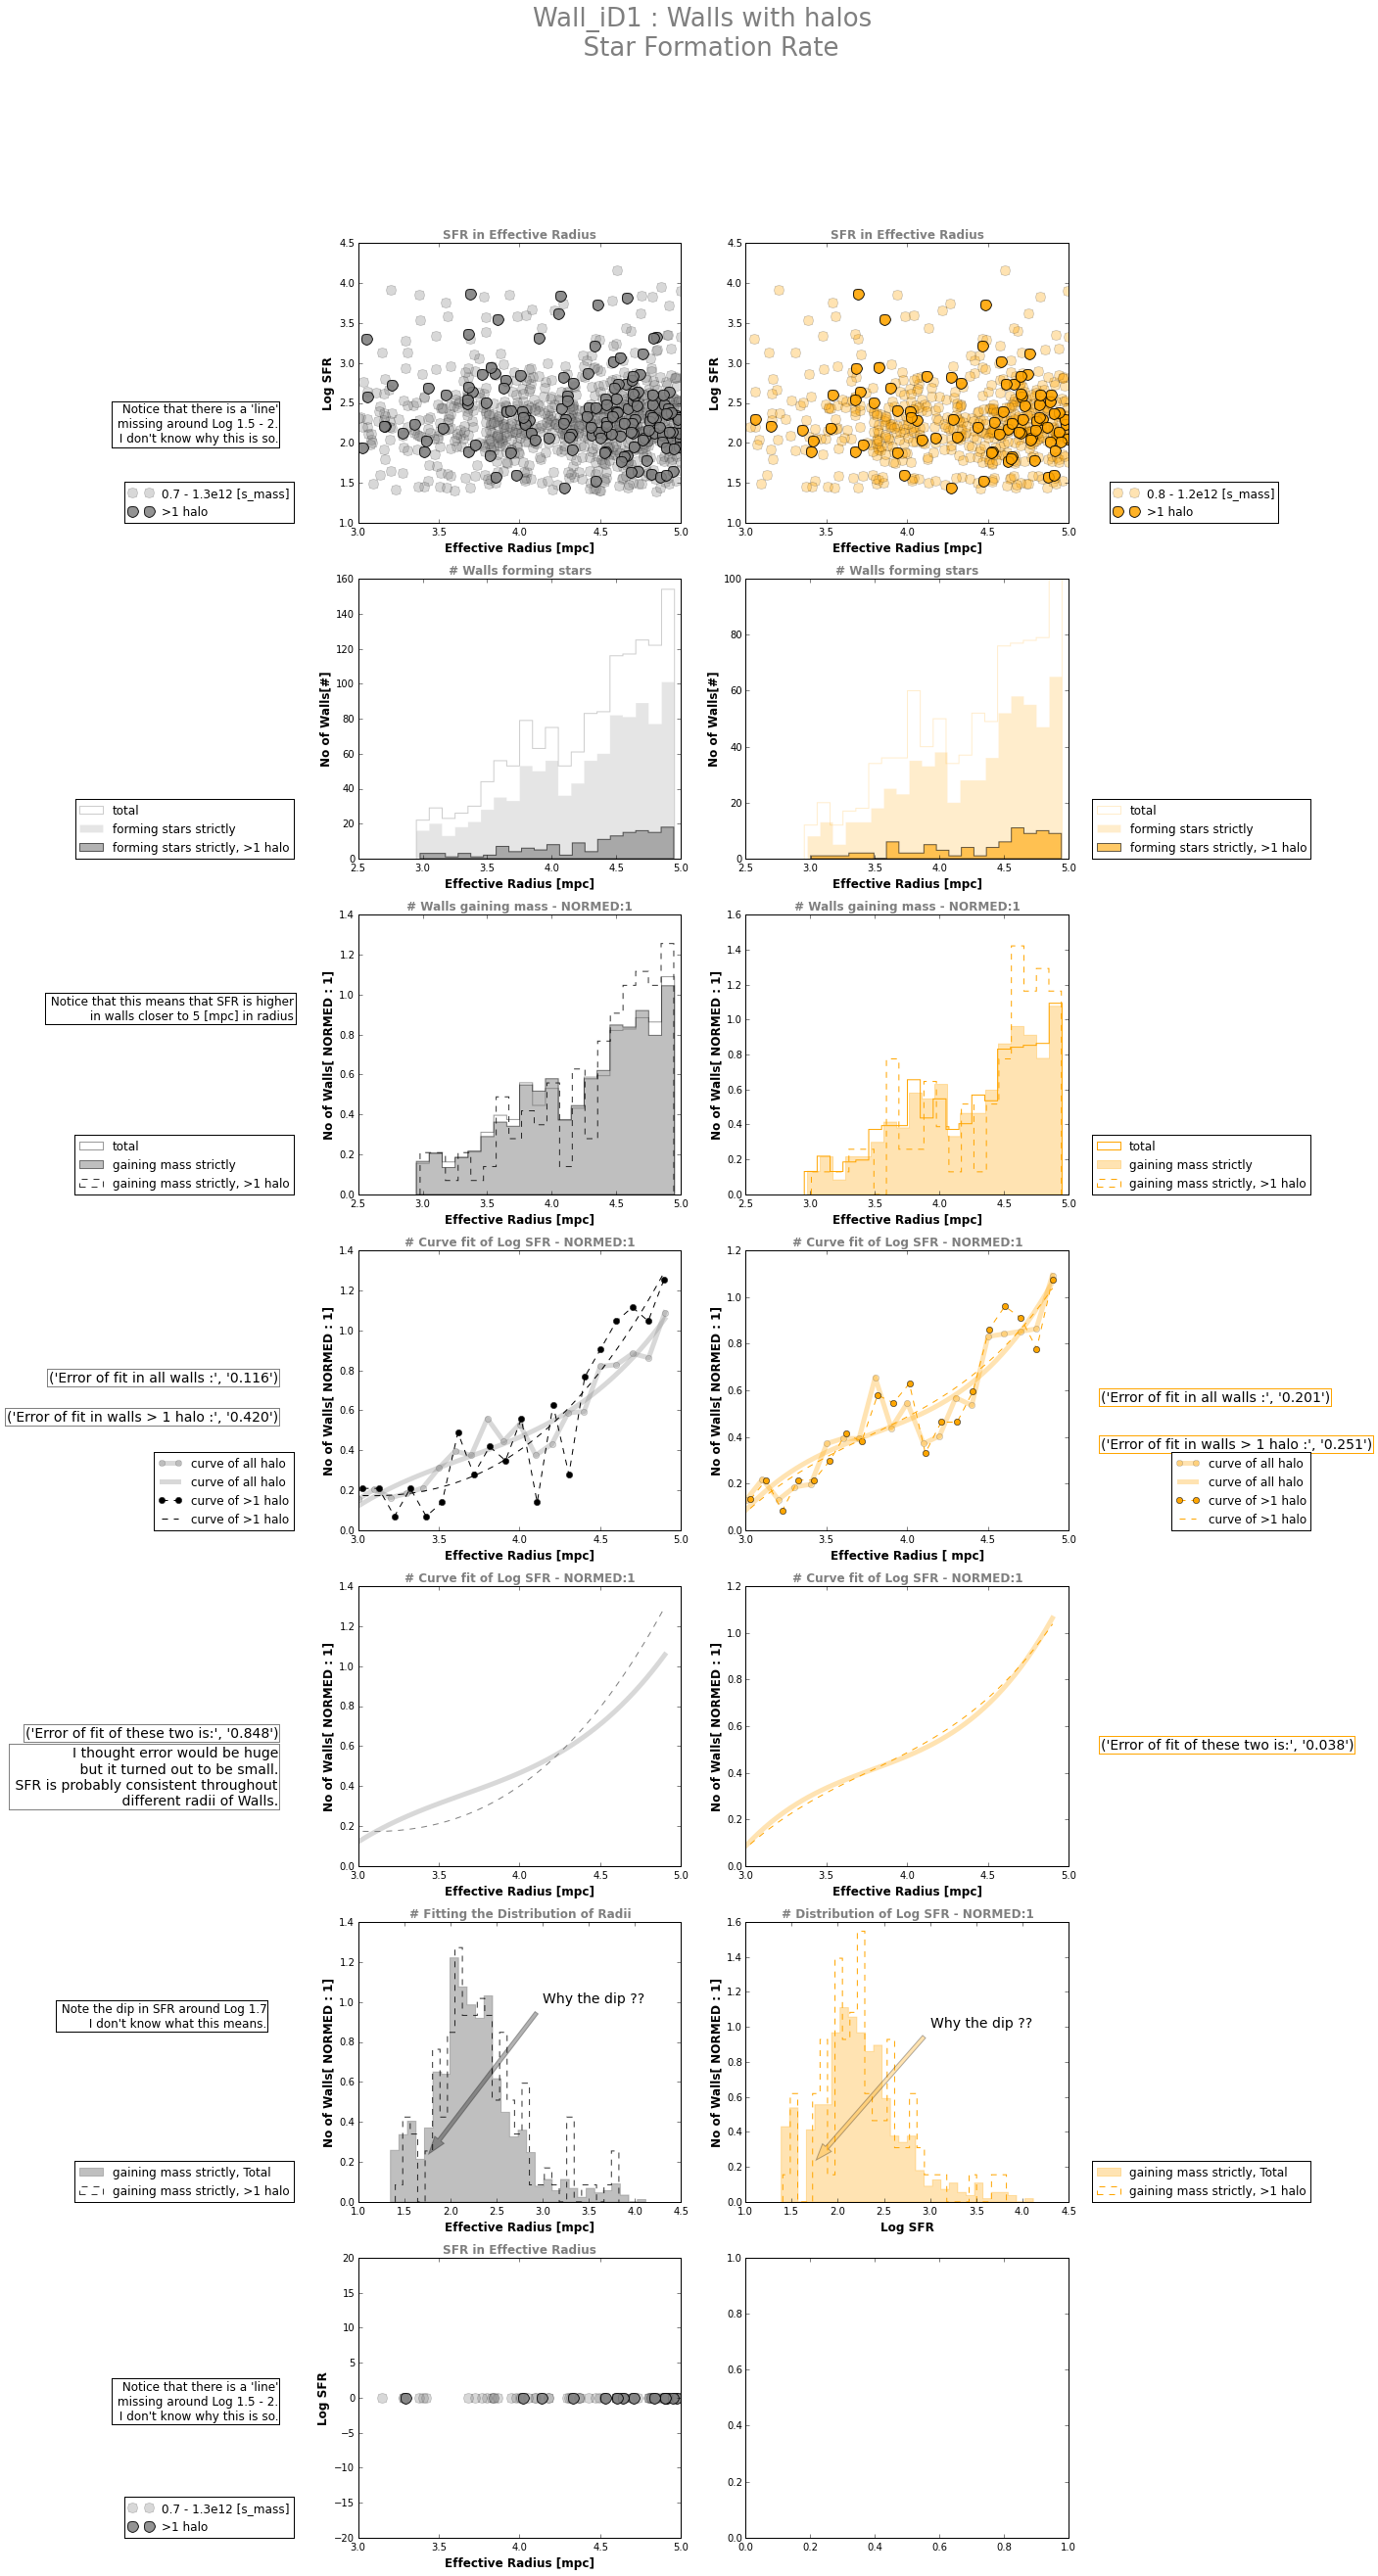

In [301]:
# E X E R C I S E  12 : WALL_iD0
# Let's plot the Council Radius of each halo within Milky Way Mass
# W A L L S  W I T H  H A L O S 

from __future__ import division
#--------------------------------------------------------------------------------

# Let's plot this
fig,ax = plt.subplots(6,2,figsize=(13, 42))
fig.suptitle("Wall_iD1 : Walls with halos \n  Star Formation Rate", fontsize=26,alpha=0.5)

color1 = "Orange"

# You must specify the catalogue you want to look at
catalogue =new_beh_cat1

# L E T  U S  P L O T  F O R  [ 0  ,  0]
# Let us see how many walls of different Mass Accretion Rate falls within the effective radius
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12

catalogue_SFR = give_me_sfr (catalogue)
plot_output2 = give_me_reduced_rad_and_mass_and_SFR(lo_rad,hi_rad,lo_mas,hi_mas, catalogue_SFR)
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
y =  plot_output2[4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)
# Let us plot it 
ax[0,0].plot(x1,y1,marker='o',linestyle='none',color='grey',alpha=0.3,ms=10,label = '0.7 - 1.3e12 [s_mass]')
# G R A Y   W /  G R A Y   O U T L I N E 
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_SFR(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

# Let us plot it
ax[0,0].plot(x1,y1,marker='o',linestyle='none',color='grey',alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')
# The axis
ax[0,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[0,0].set_ylabel('Log SFR',fontsize=12,fontweight='bold')
# The Legend
ax[0,0].set_title('SFR in Effective Radius',fontsize=12,fontweight='bold',alpha=0.5)
ax[0,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The caption
note0 = " Notice that there is a 'line' \n missing around Log 1.5 - 2. \n I don't know why this is so. "
ax[0,0].text(2.5,2.5,note0,fontsize=12,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'black'})




# L E T  U S  P L O T  F O R  [ 1  ,  0]
#  SFR  Histogram  in  E F F E C T I V E  R A D I U S
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
y =  plot_output2[4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

# TOTAL NUMBER OF WALLS 
ax[1,0].hist(x,color='grey',alpha=0.2,label='total',bins = 20,
             histtype='step',align='left',edgecolor = "black")
# Losing or gaining 
ax[1,0].hist(x1,color='grey',alpha=0.2,label='forming stars strictly',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "white")

# G R A Y   W /  G R A Y   O U T L I N E 
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # SFR
x1 = x[np.where(y > 0)]
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

ax[1,0].hist(x1,color='grey',alpha=0.6,label='forming stars strictly, >1 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# The axis
ax[1,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[1,0].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[1,0].set_title('# Walls forming stars',fontsize=12,fontweight='bold',alpha=0.5)
ax[1,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The caption
#note0 = " Overall, the system is GAINING mass. \n It appears to gain more as it moves towards 5mpc "
#ax[1,0].text(2,80,note0,fontsize=12,ha='right', va='top',
#             bbox={'facecolor':'white','edgecolor':'black'})


# L E T  U S  P L O T  F O R  [ 2  ,  0]
#  MAR +ve OR -ve :  Histogram  in  E F F E C T I V E  R A D I U S
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
y =  plot_output2[4]     # MAR
x1 = x[np.where(y > 0)]
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

# TOTAL NUMBER OF WALLS 
count,bins,ignored = ax[2,0].hist(x,color='grey',alpha=0.8,label='total',bins = 20,normed = True,
                histtype='step',align='left',edgecolor = "grey")
# Losing or gaining 
ax[2,0].hist(x1,color='grey',alpha=0.5,label='gaining mass strictly',bins = 20,normed = True,
             histtype='stepfilled',align='left',edgecolor = "black")


# G R A Y   W /  G R A Y   O U T L I N E 
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # MAR
x1 = x[np.where(y > 0)]
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

count1,bins1,ignored = ax[2,0].hist(x1,color='grey',alpha=0.8,label='gaining mass strictly, >1 halo',
                                  bins = 20,normed = True,histtype='step',align='left',
                                  edgecolor = "black",linestyle='dashed')

# The axis
ax[2,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[2,0].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[2,0].set_title('# Walls gaining mass - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[2,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The caption
note0 = " Notice that this means that SFR is higher \n in walls closer to 5 [mpc] in radius "
ax[2,0].text(2,1,note0,fontsize=12,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'black'})

# L E T  U S  P L O T  F O R  [ 3  ,  0]
#  C H I  - S Q U A R E D  F I T 

# Let's plot the distribution of the histogram
y = count
x = np.delete(bins, -1)


# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
all_halo_fit = x_new, y_new

# calculate the chi-square error
err = format(np.sum((np.polyval(np.polyfit(x, y, 2), x) - y)**2),'.3f')
note0 = 'Error of fit in all walls :', err

# Let us plot it
ax[3,0].plot(x,y,'o', x_new, y_new, color = 'grey',linestyle='-', linewidth=5,
             alpha=0.3,label = "curve of all halo")

# Let's plot the distribution of the histogram
y = count1
x = np.delete(bins1, -1)

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
more_than_1_fit = x_new,y_new

# calculate the chi-square error

err = format(np.sum((np.polyval(np.polyfit(x, y, 2), x) - y)**2),'.3f')
note1 = 'Error of fit in walls > 1 halo :', err

ax[3,0].plot(x,y,'o', x_new, y_new, color = 'black',linestyle='--', 
             alpha = 1, label = "curve of >1 halo",linewidth = 1)

# The axis
ax[3,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[3,0].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[3,0].set_title('# Curve fit of Log SFR - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[3,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The Caption
ax[3,0].text(2.5,0.8,note0,fontsize=14,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'grey'})
ax[3,0].text(2.5,0.6,note1,fontsize=14,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'grey'})



# L E T  U S  P L O T  F O R  [ 4  ,  0]
#  L E A S T   S Q U A R E S 
# The first curve
x = all_halo_fit[0]
y = all_halo_fit[1]

# The second curve
x1 = more_than_1_fit[0]
y1 = more_than_1_fit[1]

# Their plots
ax[4,0].plot(x,y ,color = 'grey',linestyle='-',linewidth = 5, alpha = 0.3)
ax[4,0].plot(x1,y1, color = 'grey',linestyle='--')

# Their errors
squared = (y1 -y)**2
term = squared/y
err = format(np.sum(term),'.3f')

# The axis
ax[4,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[4,0].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[4,0].set_title('# Curve fit of Log SFR - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[4,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The Caption
note0 = 'Error of fit of these two is:', err
ax[4,0].text(2.5,0.7,note0,fontsize=14,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'grey'})

note1 = 'I thought error would be huge \n but it turned out to be small. \n SFR is probably consistent throughout \n different radii of Walls.'
ax[4,0].text(2.5,0.6,note1,fontsize=14,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'grey'})





# L E T  U S  P L O T  F O R  [ 5  ,  0]
#  T H E   M I S S I N G   L I N E
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
y =  plot_output2[4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

# TOTAL NUMBER OF WALLS 
ax[5,0].hist(y1,color='grey',alpha=0.5,label='gaining mass strictly, Total',bins = 30,normed = True,
             histtype='stepfilled',align='left',edgecolor = "grey")
# G R A Y   W /  G R A Y   O U T L I N E 
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)
ax[5,0].hist(y1,color='grey',alpha=0.8,label='gaining mass strictly, >1 halo',bins = 30,normed = True,
             histtype='step',align='left',edgecolor = "black",linestyle='dashed')

#ax[5,0].arrow(0.3, 0.5, 1.7, 0.2, head_width=0.05, head_length=0.1, fc='k', ec='k',alpha = 0.5)
ax[5,0].annotate('Why the dip ??', xy=(1.7, 0.2), xytext=(3, 1),fontsize=14,
            arrowprops=dict(facecolor='black', shrink=0.05,alpha = 0.3))

# The axis
ax[5,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[5,0].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[5,0].set_title('# Fitting the Distribution of Radii',fontsize=12,fontweight='bold',alpha=0.5)
ax[5,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The caption
note0 = " Note the dip in SFR around Log 1.7 \n I don't know what this means. "
ax[5,0].text(0,1,note0,fontsize=12,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'black'})




##############################################################################################################

# L E T  U S  P L O T  F O R  [ 0  ,  1]
#  S F R  :  S T A R   F O R M A T I O N   R A T E
# Let us see how many walls of different Mass Accretion Rate falls within the effective radius
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12

catalogue_SFR = give_me_sfr (catalogue)
plot_output2 = give_me_reduced_rad_and_mass_and_SFR (lo_rad,hi_rad,lo_mas,hi_mas, catalogue_SFR)
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
y =  plot_output2[4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)
# Let us plot it 
ax[0,1].plot(x1,y1,marker='o',linestyle='none',color=color1,alpha=0.3,ms=10,label = '0.8 - 1.2e12 [s_mass]')
# G R A Y   W /  G R A Y   O U T L I N E 
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_SFR(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

# Let us plot it
ax[0,1].plot(x1,y1,marker='o',linestyle='none',color=color1,alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')
# The axis
ax[0,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[0,1].set_ylabel('Log SFR',fontsize=12,fontweight='bold')
# The Legend
ax[0,1].set_title('SFR in Effective Radius',fontsize=12,fontweight='bold',alpha=0.5)
ax[0,1].legend(bbox_to_anchor=(1.65, 0), loc=4, borderaxespad=0.)


# L E T  U S  P L O T  F O R  [ 1  ,  1]
#  SFR  Histogram  in  E F F E C T I V E  R A D I U S
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
y =  plot_output2[4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

# TOTAL NUMBER OF WALLS 
ax[1,1].hist(x,color=color1,alpha=0.2,label='total',bins = 20,
             histtype='step',align='left',edgecolor = color1)
# Losing or gaining 
ax[1,1].hist(x1,color=color1,alpha=0.2,label='forming stars strictly',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "white")

# R E D    W /  R E D    O U T L I N E 
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # SFR
x1 = x[np.where(y > 0)]
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

ax[1,1].hist(x1,color=color1,alpha=0.6,label='forming stars strictly, >1 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# The axis
ax[1,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[1,1].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[1,1].set_title('# Walls forming stars',fontsize=12,fontweight='bold',alpha=0.5)
ax[1,1].legend(bbox_to_anchor=(1.75, 0), loc=4, borderaxespad=0.)
# The caption
#note0 = " Overall, the system is GAINING mass. \n It appears to gain more as it moves towards 5mpc "
#ax[1,0].text(2,80,note0,fontsize=12,ha='right', va='top',
#             bbox={'facecolor':'white','edgecolor':'black'})



# L E T  U S  P L O T  F O R  [ 2  ,  1]
#  MAR +ve OR -ve :  Histogram  in  E F F E C T I V E  R A D I U S
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
y =  plot_output2[4]     # SFR
x1 = x[np.where(y > 0)]
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

# TOTAL NUMBER OF WALLS 
count,bins,ignored = ax[2,1].hist(x,color=color1,alpha=1,label='total',bins = 20,normed = True,
             histtype='step',align='left',edgecolor = color1)
# Losing or gaining 
count1,bins1,ignored = ax[2,1].hist(x1,color=color1,alpha=0.3,label='gaining mass strictly',bins = 20,normed = True,
             histtype='stepfilled',align='left',edgecolor = color1)


# R E D   W /  R E D   O U T L I N E 
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # SFR
x1 = x[np.where(y > 0)]
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

ax[2,1].hist(x1,color=color1,alpha=1,label='gaining mass strictly, >1 halo',bins = 20,normed = True,
             histtype='step',align='left',edgecolor = color1,linestyle='dashed')

# The axis
ax[2,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[2,1].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[2,1].set_title('# Walls gaining mass - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[2,1].legend(bbox_to_anchor=(1.75, 0), loc=4, borderaxespad=0.)
# The caption
#note0 = " It does seem that the difference in Mass Accretion Rate \n is due solely to the smoothing scale. "
#ax[2,0].text(2,1,note0,fontsize=12,ha='right', va='top',
#             bbox={'facecolor':'white','edgecolor':'black'})


# L E T  U S  P L O T  F O R  [ 3  ,  1]
#  C H I  - S Q U A R E D  F I T 

# Let's plot the distribution of the histogram
y = count
x = np.delete(bins, -1)

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
all_halo_fit = x_new, y_new

err = format(np.sum((np.polyval(np.polyfit(x, y, 2), x) - y)**2),'.3f')
note0 = 'Error of fit in all walls :', err

ax[3,1].plot(x,y,'o', x_new, y_new, color = color1,linestyle='-', linewidth=5,
             alpha=0.3,label = "curve of all halo")

# Let's plot the distribution of the histogram
y = count1
x = np.delete(bins1, -1)

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
more_than_1_fit = x_new,y_new


err = format(np.sum((np.polyval(np.polyfit(x, y, 2), x) - y)**2),'.3f')
note1 = 'Error of fit in walls > 1 halo :', err

ax[3,1].plot(x,y,'o', x_new, y_new, color = color1,linestyle='--', 
             alpha = 1, label = "curve of >1 halo",linewidth = 1)

# The axis
ax[3,1].set_xlabel('Effective Radius [ mpc]',fontsize=12,fontweight='bold')
ax[3,1].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[3,1].set_title('# Curve fit of Log SFR - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[3,1].legend(bbox_to_anchor=(1.75, 0), loc=4, borderaxespad=0.)
# The Caption
ax[3,1].text(5.2,0.6,note0,fontsize=14,ha='left', va='top',
             bbox={'facecolor':'white','edgecolor':color1})
ax[3,1].text(5.2,0.4,note1,fontsize=14,ha='left', va='top',
             bbox={'facecolor':'white','edgecolor':color1})

# L E T  U S  P L O T  F O R  [ 4  ,  1]
#  L E A S T   S Q U A R E S 
# The first curve
x = all_halo_fit[0]
y = all_halo_fit[1]

# The second curve
x1 = more_than_1_fit[0]
y1 = more_than_1_fit[1]

# Their plots
ax[4,1].plot(x,y ,color = color1,linestyle='-',linewidth = 5, alpha = 0.3)
ax[4,1].plot(x1,y1, color = color1,linestyle='--')

# Their errors
squared = (y1 -y)**2
term = squared/y
err = format(np.sum(term),'.3f')

# The axis
ax[4,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[4,1].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[4,1].set_title('# Curve fit of Log SFR - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[4,1].legend(bbox_to_anchor=(1.75, 0), loc=4, borderaxespad=0.)
# The Caption
note0 = 'Error of fit of these two is:', err
ax[4,1].text(5.2,0.55,note0,fontsize=14,ha='left', va='top',
             bbox={'facecolor':'white','edgecolor':color1})




# L E T  U S  P L O T  F O R  [ 5  ,  1]
#  T H E   M I S S I N G   L I N E
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
y =  plot_output2[4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

# TOTAL NUMBER OF WALLS 
ax[5,1].hist(y1,color=color1,alpha=0.3,label='gaining mass strictly, Total',bins = 30,normed = True,
             histtype='stepfilled',align='left',edgecolor = color1)

# R E D   W /  R E D    O U T L I N E 
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)
ax[5,1].hist(y1,color=color1,alpha=1,label='gaining mass strictly, >1 halo',bins = 30,normed = True,
             histtype='step',align='left',edgecolor = color1 ,linestyle='dashed')

# The aarow
ax[5,1].annotate('Why the dip ??', xy=(1.7, 0.2), xytext=(3, 1),fontsize=14,
            arrowprops=dict(facecolor=color1, shrink=0.05,alpha = 0.3))

# The axis
ax[5,1].set_xlabel('Log SFR',fontsize=12,fontweight='bold')
ax[5,1].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[5,1].set_title('# Distribution of Log SFR - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[5,1].legend(bbox_to_anchor=(1.75, 0), loc=4, borderaxespad=0.)



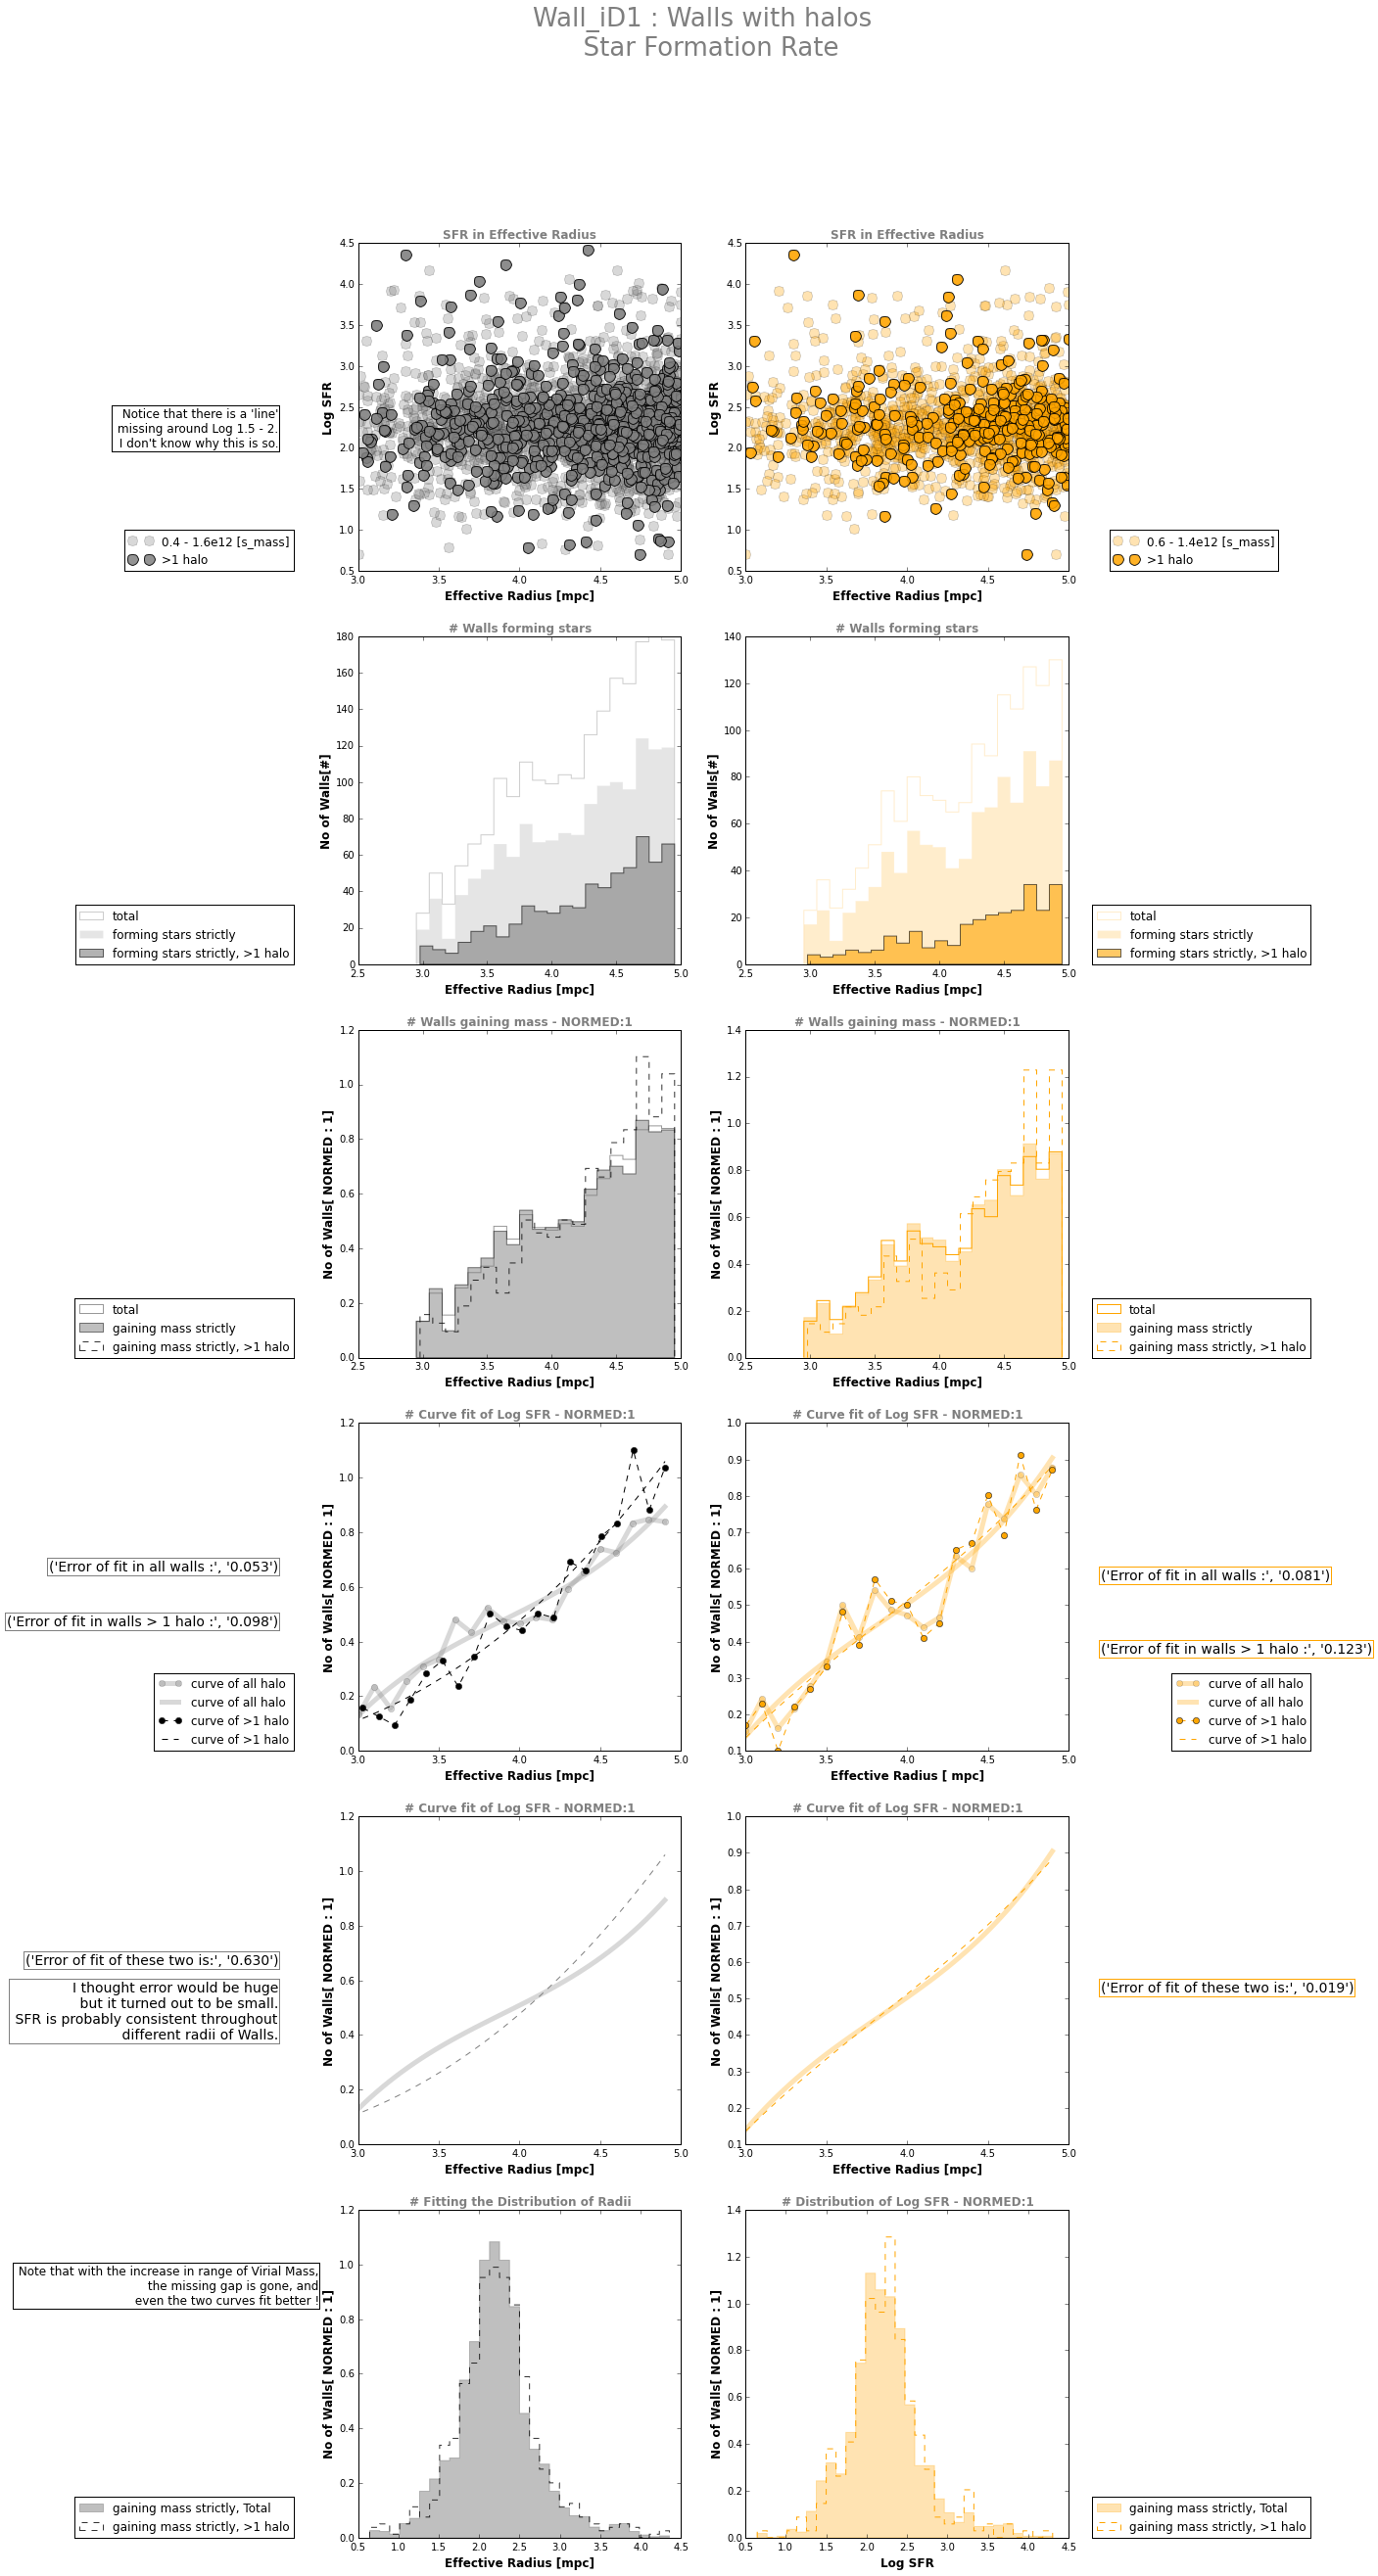

In [539]:
# E X E R C I S E  12 : WALL_iD0
# Let's plot the Council Radius of each halo within Milky Way Mass
# W A L L S  W I T H  H A L O S  - W I T H  C O R R E C T  M A S S 

from __future__ import division
#--------------------------------------------------------------------------------

# Let's plot this
fig,ax = plt.subplots(6,2,figsize=(13, 42))
fig.suptitle("Wall_iD1 : Walls with halos \n  Star Formation Rate", fontsize=26,alpha=0.5)

color1 = "Orange"

# You must specify the catalogue you want to look at
catalogue =new_beh_cat1

# L E T  U S  P L O T  F O R  [ 0  ,  0]
# Let us see how many walls of different Mass Accretion Rate falls within the effective radius
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.4e12
hi_mas = 1.6e12

catalogue_SFR = give_me_sfr (catalogue)
plot_output2 = give_me_reduced_rad_and_mass_and_SFR(lo_rad,hi_rad,lo_mas,hi_mas, catalogue_SFR)
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
y =  plot_output2[4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)
# Let us plot it 
ax[0,0].plot(x1,y1,marker='o',linestyle='none',color='grey',alpha=0.3,ms=10,label = '0.4 - 1.6e12 [s_mass]')
# G R A Y   W /  G R A Y   O U T L I N E 
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_SFR(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

# Let us plot it
ax[0,0].plot(x1,y1,marker='o',linestyle='none',color='grey',alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')
# The axis
ax[0,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[0,0].set_ylabel('Log SFR',fontsize=12,fontweight='bold')
# The Legend
ax[0,0].set_title('SFR in Effective Radius',fontsize=12,fontweight='bold',alpha=0.5)
ax[0,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The caption
note0 = " Notice that there is a 'line' \n missing around Log 1.5 - 2. \n I don't know why this is so. "
ax[0,0].text(2.5,2.5,note0,fontsize=12,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'black'})




# L E T  U S  P L O T  F O R  [ 1  ,  0]
#  SFR  Histogram  in  E F F E C T I V E  R A D I U S
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_SFR(no_of_walls0, plot_output2)
x = how_many_walls[0][:,3]     # Radius 
y = how_many_walls[0][:,4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

# TOTAL NUMBER OF WALLS 
ax[1,0].hist(x,color='grey',alpha=0.2,label='total',bins = 20,
             histtype='step',align='left',edgecolor = "black")
# Losing or gaining 
ax[1,0].hist(x1,color='grey',alpha=0.2,label='forming stars strictly',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "white")

# G R A Y   W /  G R A Y   O U T L I N E 
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # SFR
x1 = x[np.where(y > 0)]
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

ax[1,0].hist(x1,color='grey',alpha=0.6,label='forming stars strictly, >1 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# The axis
ax[1,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[1,0].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[1,0].set_title('# Walls forming stars',fontsize=12,fontweight='bold',alpha=0.5)
ax[1,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The caption
#note0 = " Overall, the system is GAINING mass. \n It appears to gain more as it moves towards 5mpc "
#ax[1,0].text(2,80,note0,fontsize=12,ha='right', va='top',
#             bbox={'facecolor':'white','edgecolor':'black'})


# L E T  U S  P L O T  F O R  [ 2  ,  0]
#  MAR +ve OR -ve :  Histogram  in  E F F E C T I V E  R A D I U S
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_SFR(no_of_walls0, plot_output2)
x = how_many_walls[0][:,3]     # Radius 
y = how_many_walls[0][:,4]     # SFR
x1 = x[np.where(y > 0)]
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

# TOTAL NUMBER OF WALLS 
count,bins,ignored = ax[2,0].hist(x,color='grey',alpha=0.8,label='total',bins = 20,normed = True,
                histtype='step',align='left',edgecolor = "grey")
# Losing or gaining 
ax[2,0].hist(x1,color='grey',alpha=0.5,label='gaining mass strictly',bins = 20,normed = True,
             histtype='stepfilled',align='left',edgecolor = "black")


# G R A Y   W /  G R A Y   O U T L I N E 
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # MAR
x1 = x[np.where(y > 0)]
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

count1,bins1,ignored = ax[2,0].hist(x1,color='grey',alpha=0.8,label='gaining mass strictly, >1 halo',
                                  bins = 20,normed = True,histtype='step',align='left',
                                  edgecolor = "black",linestyle='dashed')

# The axis
ax[2,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[2,0].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[2,0].set_title('# Walls gaining mass - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[2,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The caption
#note0 = " Notice that this means that SFR is higher \n in walls closer to 5 [mpc] in radius "
#ax[2,0].text(2,1,note0,fontsize=12,ha='right', va='top',
#             bbox={'facecolor':'white','edgecolor':'black'})

# L E T  U S  P L O T  F O R  [ 3  ,  0]
#  C H I  - S Q U A R E D  F I T 

# Let's plot the distribution of the histogram
y = count
x = np.delete(bins, -1)


# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
all_halo_fit = x_new, y_new

# calculate the chi-square error
err = format(np.sum((np.polyval(np.polyfit(x, y, 2), x) - y)**2),'.3f')
note0 = 'Error of fit in all walls :', err

# Let us plot it
ax[3,0].plot(x,y,'o', x_new, y_new, color = 'grey',linestyle='-', linewidth=5,
             alpha=0.3,label = "curve of all halo")

# Let's plot the distribution of the histogram
y = count1
x = np.delete(bins1, -1)

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
more_than_1_fit = x_new,y_new

# calculate the chi-square error

err = format(np.sum((np.polyval(np.polyfit(x, y, 2), x) - y)**2),'.3f')
note1 = 'Error of fit in walls > 1 halo :', err

ax[3,0].plot(x,y,'o', x_new, y_new, color = 'black',linestyle='--', 
             alpha = 1, label = "curve of >1 halo",linewidth = 1)

# The axis
ax[3,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[3,0].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[3,0].set_title('# Curve fit of Log SFR - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[3,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The Caption
ax[3,0].text(2.5,0.7,note0,fontsize=14,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'grey'})
ax[3,0].text(2.5,0.5,note1,fontsize=14,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'grey'})



# L E T  U S  P L O T  F O R  [ 4  ,  0]
#  L E A S T   S Q U A R E S 
# The first curve
x = all_halo_fit[0]
y = all_halo_fit[1]

# The second curve
x1 = more_than_1_fit[0]
y1 = more_than_1_fit[1]

# Their plots
ax[4,0].plot(x,y ,color = 'grey',linestyle='-',linewidth = 5, alpha = 0.3)
ax[4,0].plot(x1,y1, color = 'grey',linestyle='--')

# Their errors
squared = (y1 -y)**2
term = squared/y
err = format(np.sum(term),'.3f')

# The axis
ax[4,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[4,0].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[4,0].set_title('# Curve fit of Log SFR - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[4,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The Caption
note0 = 'Error of fit of these two is:', err
ax[4,0].text(2.5,0.7,note0,fontsize=14,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'grey'})

note1 = 'I thought error would be huge \n but it turned out to be small. \n SFR is probably consistent throughout \n different radii of Walls.'
ax[4,0].text(2.5,0.6,note1,fontsize=14,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'grey'})





# L E T  U S  P L O T  F O R  [ 5  ,  0]
#  T H E   M I S S I N G   L I N E
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
y =  plot_output2[4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

# TOTAL NUMBER OF WALLS 
ax[5,0].hist(y1,color='grey',alpha=0.5,label='gaining mass strictly, Total',bins = 30,normed = True,
             histtype='stepfilled',align='left',edgecolor = "grey")
# G R A Y   W /  G R A Y   O U T L I N E 
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)
ax[5,0].hist(y1,color='grey',alpha=0.8,label='gaining mass strictly, >1 halo',bins = 30,normed = True,
             histtype='step',align='left',edgecolor = "black",linestyle='dashed')

#ax[5,0].arrow(0.3, 0.5, 1.7, 0.2, head_width=0.05, head_length=0.1, fc='k', ec='k',alpha = 0.5)
#ax[5,0].annotate('Why the dip ??', xy=(1.7, 0.2), xytext=(3, 1),fontsize=14,
#            arrowprops=dict(facecolor='black', shrink=0.05,alpha = 0.3))

# The axis
ax[5,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[5,0].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[5,0].set_title('# Fitting the Distribution of Radii',fontsize=12,fontweight='bold',alpha=0.5)
ax[5,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The caption
note0 = " Note that with the increase in range of Virial Mass, \n the missing gap is gone, and \n even the two curves fit better !"
ax[5,0].text(0,1,note0,fontsize=12,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'black'})




##############################################################################################################

# L E T  U S  P L O T  F O R  [ 0  ,  1]
#  S F R  :  S T A R   F O R M A T I O N   R A T E
# Let us see how many walls of different Mass Accretion Rate falls within the effective radius
# R E D  
lo_rad = 3
hi_rad = 5
lo_mas = 0.6e12
hi_mas = 1.4e12

catalogue_SFR = give_me_sfr (catalogue)
plot_output2 = give_me_reduced_rad_and_mass_and_SFR (lo_rad,hi_rad,lo_mas,hi_mas, catalogue_SFR)
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
y =  plot_output2[4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)
# Let us plot it 
ax[0,1].plot(x1,y1,marker='o',linestyle='none',color=color1,alpha=0.3,ms=10,label = '0.6 - 1.4e12 [s_mass]')
# G R A Y   W /  G R A Y   O U T L I N E 
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_SFR(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

# Let us plot it
ax[0,1].plot(x1,y1,marker='o',linestyle='none',color=color1,alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')
# The axis
ax[0,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[0,1].set_ylabel('Log SFR',fontsize=12,fontweight='bold')
# The Legend
ax[0,1].set_title('SFR in Effective Radius',fontsize=12,fontweight='bold',alpha=0.5)
ax[0,1].legend(bbox_to_anchor=(1.65, 0), loc=4, borderaxespad=0.)


# L E T  U S  P L O T  F O R  [ 1  ,  1]
#  SFR  Histogram  in  E F F E C T I V E  R A D I U S
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_SFR(no_of_walls0, plot_output2)
x = how_many_walls[0][:,3]     # Radius 
y = how_many_walls[0][:,4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

# TOTAL NUMBER OF WALLS 
ax[1,1].hist(x,color=color1,alpha=0.2,label='total',bins = 20,
             histtype='step',align='left',edgecolor = color1)
# Losing or gaining 
ax[1,1].hist(x1,color=color1,alpha=0.2,label='forming stars strictly',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "white")

# R E D    W /  R E D    O U T L I N E 
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # SFR
x1 = x[np.where(y > 0)]
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

ax[1,1].hist(x1,color=color1,alpha=0.6,label='forming stars strictly, >1 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# The axis
ax[1,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[1,1].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[1,1].set_title('# Walls forming stars',fontsize=12,fontweight='bold',alpha=0.5)
ax[1,1].legend(bbox_to_anchor=(1.75, 0), loc=4, borderaxespad=0.)
# The caption
#note0 = " Overall, the system is GAINING mass. \n It appears to gain more as it moves towards 5mpc "
#ax[1,0].text(2,80,note0,fontsize=12,ha='right', va='top',
#             bbox={'facecolor':'white','edgecolor':'black'})



# L E T  U S  P L O T  F O R  [ 2  ,  1]
#  MAR +ve OR -ve :  Histogram  in  E F F E C T I V E  R A D I U S
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_SFR(no_of_walls0, plot_output2)
x = how_many_walls[0][:,3]     # Radius 
y = how_many_walls[0][:,4]     # SFR
x1 = x[np.where(y > 0)]
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

# TOTAL NUMBER OF WALLS 
count,bins,ignored = ax[2,1].hist(x,color=color1,alpha=1,label='total',bins = 20,normed = True,
             histtype='step',align='left',edgecolor = color1)
# Losing or gaining 
count1,bins1,ignored = ax[2,1].hist(x1,color=color1,alpha=0.3,label='gaining mass strictly',bins = 20,normed = True,
             histtype='stepfilled',align='left',edgecolor = color1)


# R E D   W /  R E D   O U T L I N E 
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # SFR
x1 = x[np.where(y > 0)]
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

ax[2,1].hist(x1,color=color1,alpha=1,label='gaining mass strictly, >1 halo',bins = 20,normed = True,
             histtype='step',align='left',edgecolor = color1,linestyle='dashed')

# The axis
ax[2,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[2,1].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[2,1].set_title('# Walls gaining mass - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[2,1].legend(bbox_to_anchor=(1.75, 0), loc=4, borderaxespad=0.)
# The caption
#note0 = " It does seem that the difference in Mass Accretion Rate \n is due solely to the smoothing scale. "
#ax[2,0].text(2,1,note0,fontsize=12,ha='right', va='top',
#             bbox={'facecolor':'white','edgecolor':'black'})


# L E T  U S  P L O T  F O R  [ 3  ,  1]
#  C H I  - S Q U A R E D  F I T 

# Let's plot the distribution of the histogram
y = count
x = np.delete(bins, -1)

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
all_halo_fit = x_new, y_new

err = format(np.sum((np.polyval(np.polyfit(x, y, 2), x) - y)**2),'.3f')
note0 = 'Error of fit in all walls :', err

ax[3,1].plot(x,y,'o', x_new, y_new, color = color1,linestyle='-', linewidth=5,
             alpha=0.3,label = "curve of all halo")

# Let's plot the distribution of the histogram
y = count1
x = np.delete(bins1, -1)

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
more_than_1_fit = x_new,y_new


err = format(np.sum((np.polyval(np.polyfit(x, y, 2), x) - y)**2),'.3f')
note1 = 'Error of fit in walls > 1 halo :', err

ax[3,1].plot(x,y,'o', x_new, y_new, color = color1,linestyle='--', 
             alpha = 1, label = "curve of >1 halo",linewidth = 1)

# The axis
ax[3,1].set_xlabel('Effective Radius [ mpc]',fontsize=12,fontweight='bold')
ax[3,1].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[3,1].set_title('# Curve fit of Log SFR - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[3,1].legend(bbox_to_anchor=(1.75, 0), loc=4, borderaxespad=0.)
# The Caption
ax[3,1].text(5.2,0.6,note0,fontsize=14,ha='left', va='top',
             bbox={'facecolor':'white','edgecolor':color1})
ax[3,1].text(5.2,0.4,note1,fontsize=14,ha='left', va='top',
             bbox={'facecolor':'white','edgecolor':color1})

# L E T  U S  P L O T  F O R  [ 4  ,  1]
#  L E A S T   S Q U A R E S 
# The first curve
x = all_halo_fit[0]
y = all_halo_fit[1]

# The second curve
x1 = more_than_1_fit[0]
y1 = more_than_1_fit[1]

# Their plots
ax[4,1].plot(x,y ,color = color1,linestyle='-',linewidth = 5, alpha = 0.3)
ax[4,1].plot(x1,y1, color = color1,linestyle='--')

# Their errors
squared = (y1 -y)**2
term = squared/y
err = format(np.sum(term),'.3f')

# The axis
ax[4,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[4,1].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[4,1].set_title('# Curve fit of Log SFR - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[4,1].legend(bbox_to_anchor=(1.75, 0), loc=4, borderaxespad=0.)
# The Caption
note0 = 'Error of fit of these two is:', err
ax[4,1].text(5.2,0.55,note0,fontsize=14,ha='left', va='top',
             bbox={'facecolor':'white','edgecolor':color1})




# L E T  U S  P L O T  F O R  [ 5  ,  1]
#  T H E   M I S S I N G   L I N E
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
y =  plot_output2[4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

# TOTAL NUMBER OF WALLS 
ax[5,1].hist(y1,color=color1,alpha=0.3,label='gaining mass strictly, Total',bins = 30,normed = True,
             histtype='stepfilled',align='left',edgecolor = color1)

# R E D   W /  R E D    O U T L I N E 
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)
ax[5,1].hist(y1,color=color1,alpha=1,label='gaining mass strictly, >1 halo',bins = 30,normed = True,
             histtype='step',align='left',edgecolor = color1 ,linestyle='dashed')

# The aarow
#ax[5,1].annotate('Why the dip ??', xy=(1.7, 0.2), xytext=(3, 1),fontsize=14,
#            arrowprops=dict(facecolor=color1, shrink=0.05,alpha = 0.3))

# The axis
ax[5,1].set_xlabel('Log SFR',fontsize=12,fontweight='bold')
ax[5,1].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[5,1].set_title('# Distribution of Log SFR - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[5,1].legend(bbox_to_anchor=(1.75, 0), loc=4, borderaxespad=0.)



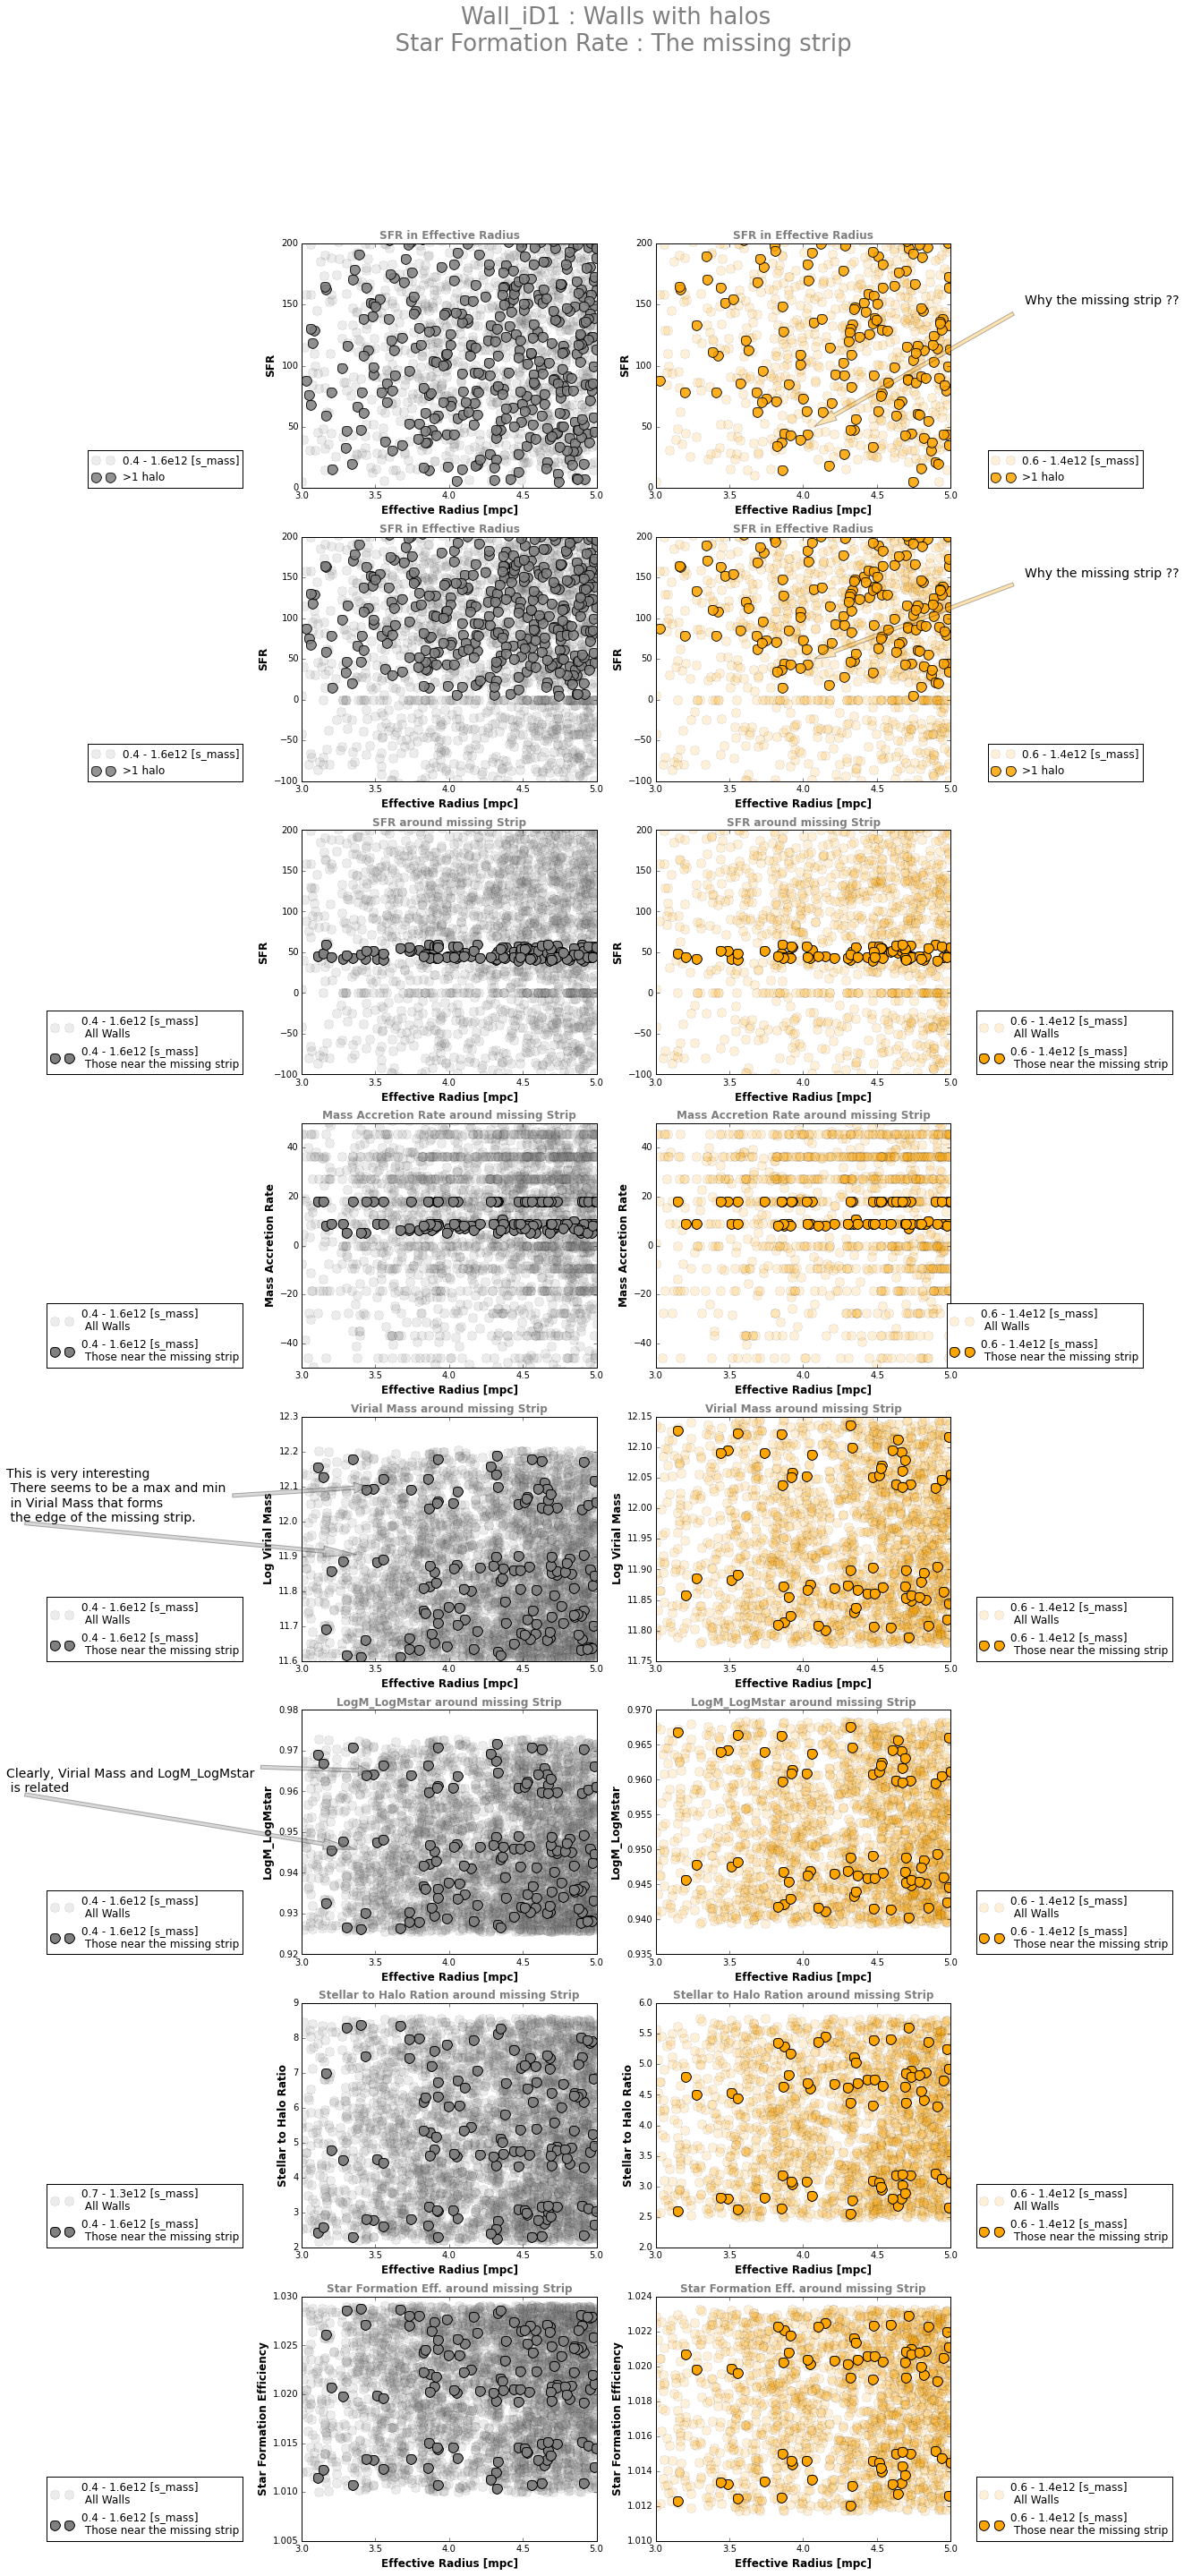

In [423]:
# E X E R C I S E  12 : WALL_iD0
# Let's plot the Council Radius of each halo within Milky Way Mass
# W A L L S  W I T H  H A L O S 

from __future__ import division
#--------------------------------------------------------------------------------

# Let's plot this
fig,ax = plt.subplots(8,2,figsize=(13, 46))
fig.suptitle("Wall_iD1 : Walls with halos \n  Star Formation Rate : The missing strip", fontsize=26,alpha=0.5)

color1 = "orange"

# You must specify the catalogue you want to look at
catalogue =new_beh_cat1

# L E T  U S  P L O T  F O R  [ 0  ,  0]
# Let us see how many walls of different Mass Accretion Rate falls within the effective radius
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.4e12
hi_mas = 1.6e12

catalogue_SFR = give_me_sfr (catalogue)
plot_output2 = give_me_reduced_rad_and_mass_and_SFR(lo_rad,hi_rad,lo_mas,hi_mas, catalogue_SFR)
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
y =  plot_output2[4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)
# Let us plot it 
ax[0,0].plot(x1,a1,marker='o',linestyle='none',color='grey',alpha=0.15,ms=10,label = '0.4 - 1.6e12 [s_mass]')


ax[1,0].set_ylim(-200,200)
# G R A Y   W /  G R A Y   O U T L I N E 
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_SFR(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)
# Let us plot it
ax[0,0].plot(x1,a1,marker='o',linestyle='none',color='grey',alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')
# The axis
ax[0,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[0,0].set_ylabel('SFR',fontsize=12,fontweight='bold')
# The Legend
ax[0,0].set_title('SFR in Effective Radius',fontsize=12,fontweight='bold',alpha=0.5)
ax[0,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The Limits
ax[0,0].set_ylim(0,200)


# L E T  U S  P L O T  F O R  [ 1  ,  0]
catalogue_SFR = give_me_sfr (catalogue)
plot_output2 = give_me_reduced_rad_and_mass_and_SFR(lo_rad,hi_rad,lo_mas,hi_mas, catalogue_SFR)
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
y =  plot_output2[4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)
ax[1,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=0.15,ms=10,label = '0.4 - 1.6e12 [s_mass]')
# G R A Y   W /  G R A Y   O U T L I N E 
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_SFR(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)
# Let us plot it
ax[1,0].plot(x1,a1,marker='o',linestyle='none',color='grey',alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')
# The axis
ax[1,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[1,0].set_ylabel('SFR',fontsize=12,fontweight='bold')
# The Legend
ax[1,0].set_title('SFR in Effective Radius',fontsize=12,fontweight='bold',alpha=0.5)
ax[1,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The Limits
ax[1,0].set_ylim(-100,200)

# L E T  U S  P L O T  F O R  [ 2  ,  0]
# L E T  U S  T A G   T H O S E   M I S S I N G   S T R I P S
# S F R 
SFR_LOW = 40
SFR_UPP = 60

catalogue_SFR = give_me_sfr (catalogue)
plot_output2 = give_me_reduced_rad_and_mass_and_SFR(lo_rad,hi_rad,lo_mas,hi_mas, catalogue_SFR)
SFR = plot_output2[4]      # SFR 
RAD =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
ax[2,0].plot(RAD,SFR,marker='o',linestyle='none',color='grey',
             alpha=0.15,ms=10,label = '0.4 - 1.6e12 [s_mass] \n All Walls')
y = SFR[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
x = RAD[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
ax[2,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=1,ms=11,
             markeredgewidth=1.0,label = '0.4 - 1.6e12 [s_mass] \n Those near the missing strip ')
# The axis
ax[2,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[2,0].set_ylabel('SFR',fontsize=12,fontweight='bold')
# The Legend
ax[2,0].set_title('SFR around missing Strip',fontsize=12,fontweight='bold',alpha=0.5)
ax[2,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The Limits
ax[2,0].set_ylim(-100,200)

# L E T  U S  P L O T  F O R  [ 3  ,  0]
# M A R 
catalogue_SFR = give_me_sfr (catalogue)
plot_output2 = give_me_reduced_rad_and_mass_and_SFR(lo_rad,hi_rad,lo_mas,hi_mas, catalogue_SFR)
SFR = plot_output2[4]      # SFR 

plot_output2 = give_me_reduced_rad_and_mass_and_mar (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
MAR = plot_output2[4]      # MAR 
RAD =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
ax[3,0].plot(RAD,MAR,marker='o',linestyle='none',color='grey',alpha=0.15,
             ms=10,label = '0.4 - 1.6e12 [s_mass] \n All Walls ')
y=  MAR[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
x = RAD[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
ax[3,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=1,ms=11,
             markeredgewidth=1.0,label = '0.4 - 1.6e12 [s_mass] \n Those near the missing strip')

# The axis
ax[3,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[3,0].set_ylabel('Mass Accretion Rate',fontsize=12,fontweight='bold')
# The Legend
ax[3,0].set_title('Mass Accretion Rate around missing Strip',fontsize=12,fontweight='bold',alpha=0.5)
ax[3,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The Limits
ax[3,0].set_ylim(-50,50)


# L E T  U S  P L O T  F O R  [ 4  ,  0]
# Virial Mass
catalogue_SFR = give_me_sfr (catalogue)
plot_output2 = give_me_reduced_rad_and_mass_and_SFR(lo_rad,hi_rad,lo_mas,hi_mas, catalogue_SFR)
SFR = plot_output2[4]      # SFR 

plot_output2 = give_me_reduced_rad_and_mass_and_logM_LogMstar (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
a = plot_output2[2]      # Virial Mass 
Mvir = np.log10(a)
RAD =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
ax[4,0].plot(RAD,Mvir,marker='o',linestyle='none',color='grey',alpha=0.15,
             ms=10,label = '0.4 - 1.6e12 [s_mass] \n All Walls ')
b =  a[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
y = np.log10(b)
x = RAD[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
ax[4,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=1,ms=11,
             markeredgewidth=1.0,label = '0.4 - 1.6e12 [s_mass] \n Those near the missing strip')

# The axis
ax[4,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[4,0].set_ylabel('Log Virial Mass',fontsize=12,fontweight='bold')
# The Legend
ax[4,0].set_title('Virial Mass around missing Strip',fontsize=12,fontweight='bold',alpha=0.5)
ax[4,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The Limits
#ax[3,0].set_ylim(-100,200)
# The aarow
ax[4,0].annotate('This is very interesting \n There seems to be a max and min \n in Virial Mass that forms \n the edge of the missing strip.', 
                 xy=(3.5, 12.1), xytext=(1, 12),fontsize=14,
            arrowprops=dict(facecolor='grey', shrink=0.05,alpha = 0.3))
ax[4,0].annotate('',
                 xy=(3.5, 11.9), xytext=(1, 12),fontsize=14,
            arrowprops=dict(facecolor='grey', shrink=0.05,alpha = 0.3))


# L E T  U S  P L O T  F O R  [ 5  ,  0]
# LogM_LogMstar

catalogue_SFR = give_me_sfr (catalogue)
plot_output2 = give_me_reduced_rad_and_mass_and_SFR(lo_rad,hi_rad,lo_mas,hi_mas, catalogue_SFR)
SFR = plot_output2[4]      # SFR 

plot_output2 = give_me_reduced_rad_and_mass_and_logM_LogMstar (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
LogM_LogMstar = plot_output2[4]      # LogM_LogMstar
RAD =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
ax[5,0].plot(RAD,LogM_LogMstar,marker='o',linestyle='none',color='grey',alpha=0.15,
             ms=10,label = '0.4 - 1.6e12 [s_mass] \n All Walls ')
y =  LogM_LogMstar[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
x = RAD[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
ax[5,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=1,ms=11,
             markeredgewidth=1.0,label = '0.4 - 1.6e12 [s_mass] \n Those near the missing strip')

# The axis
ax[5,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[5,0].set_ylabel('LogM_LogMstar',fontsize=12,fontweight='bold')
# The Legend
ax[5,0].set_title('LogM_LogMstar around missing Strip',fontsize=12,fontweight='bold',alpha=0.5)
ax[5,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The Limits
#ax[3,0].set_ylim(-100,200)

# The aarow
ax[5,0].annotate('Clearly, Virial Mass and LogM_LogMstar \n is related', 
                 xy=(3.5, 0.965), xytext=(1, 0.96),fontsize=14,
            arrowprops=dict(facecolor='grey', shrink=0.05,alpha = 0.3))
ax[5,0].annotate('',
                 xy=(3.5, 0.945), xytext=(1, 0.96),fontsize=14,
            arrowprops=dict(facecolor='grey', shrink=0.05,alpha = 0.3))


# L E T  U S  P L O T  F O R  [ 6  ,  0]
catalogue_SFR = give_me_sfr (catalogue)
plot_output2 = give_me_reduced_rad_and_mass_and_SFR(lo_rad,hi_rad,lo_mas,hi_mas, catalogue_SFR)
SFR = plot_output2[4]      # SFR 

# LogM_LogMstar
plot_output2 = give_me_reduced_rad_and_mass_and_logM_LogMstar (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
LogM_LogMstar = plot_output2[4] # LogM_LogMstar
a = LogM_LogMstar
Mvir = plot_output2[2]     # Virial Mass
RAD =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
f = Mvir **((1-a)/a)

ax[6,0].plot(RAD,f,marker='o',linestyle='none',color='grey',alpha=0.15,
             ms=10,label = '0.7 - 1.3e12 [s_mass] \n All Walls ')
y =  f[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
x = RAD[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
ax[6,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=1,ms=11,
             markeredgewidth=1.0,label = '0.4 - 1.6e12 [s_mass] \n Those near the missing strip')

# The axis
ax[6,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[6,0].set_ylabel('Stellar to Halo Ratio',fontsize=12,fontweight='bold')
# The Legend
ax[6,0].set_title('Stellar to Halo Ration around missing Strip',fontsize=12,fontweight='bold',alpha=0.5)
ax[6,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The Limits
#ax[3,0].set_ylim(-100,200)

# L E T  U S  P L O T  F O R  [ 7  ,  0]
# MAR
plot_output2 = give_me_reduced_rad_and_mass_and_mar (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
MAR = plot_output2[4]      # MAR 

# SFR
catalogue_SFR = give_me_sfr (catalogue)
plot_output2 = give_me_reduced_rad_and_mass_and_SFR(lo_rad,hi_rad,lo_mas,hi_mas, catalogue_SFR)
SFR = plot_output2[4]      # SFR 

# LogM_LogMstar
plot_output2 = give_me_reduced_rad_and_mass_and_logM_LogMstar (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
LogM_LogMstar = plot_output2[4] # LogM_LogMstar
a = LogM_LogMstar
Mvir = plot_output2[2]     # Virial Mass
RAD =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
f = Mvir **((1-a)/a)
# Star Formation Effectiency

star_form_eff = np.zeros(len(SFR))
times = MAR*f
for i in range(len(star_form_eff)):
    if times[i] !=0:  
        star_form_eff[i] = SFR[i] / times[i]
    else:
        star_form_eff[i] = 0

star_form_eff1 = star_form_eff[np.where(star_form_eff!=0)]      
RAD1 = RAD[np.where(star_form_eff!=0)] 
        
ax[7,0].plot(RAD1,star_form_eff1,marker='o',linestyle='none',color='grey',alpha=0.15,
             ms=10,label = '0.4 - 1.6e12 [s_mass] \n All Walls ')
y =  star_form_eff[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
x = RAD[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
y = y[np.where(y!=0)]
x = x[np.where(y!=0)]

ax[7,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=1,ms=11,
             markeredgewidth=1.0,label = '0.4 - 1.6e12 [s_mass] \n Those near the missing strip')

# The axis
ax[7,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[7,0].set_ylabel('Star Formation Efficiency',fontsize=12,fontweight='bold')
# The Legend
ax[7,0].set_title('Star Formation Eff. around missing Strip',fontsize=12,fontweight='bold',alpha=0.5)
ax[7,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The Limits

####################################################################################################

# L E T  U S  P L O T  F O R  [ 0  ,  1]
# Let us see how many walls of different Mass Accretion Rate falls within the effective radius
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.6e12
hi_mas = 1.4e12

catalogue_SFR = give_me_sfr (catalogue)
plot_output2 = give_me_reduced_rad_and_mass_and_SFR(lo_rad,hi_rad,lo_mas,hi_mas, catalogue_SFR)
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
y =  plot_output2[4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)
# Let us plot it 
ax[0,1].plot(x1,a1,marker='o',linestyle='none',color=color1,alpha=0.15,ms=10,label = '0.6 - 1.4e12 [s_mass]')

# G R A Y   W /  G R A Y   O U T L I N E 
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_SFR(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)

# Let us plot it
ax[0,1].plot(x1,a1,marker='o',linestyle='none',color=color1,alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')
# The axis
ax[0,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[0,1].set_ylabel('SFR',fontsize=12,fontweight='bold')
# The Legend
ax[0,1].set_title('SFR in Effective Radius',fontsize=12,fontweight='bold',alpha=0.5)
ax[0,1].legend(bbox_to_anchor=(1.65, 0), loc=4, borderaxespad=0.)

ax[0,1].set_ylim(0,200)

# The aarow
ax[0,1].annotate('Why the missing strip ??', xy=(4, 45), xytext=(5.5, 150),fontsize=14,
            arrowprops=dict(facecolor=color1, shrink=0.05,alpha = 0.3))


# L E T  U S  P L O T  F O R  [ 1  ,  1]
catalogue_SFR = give_me_sfr (catalogue)
plot_output2 = give_me_reduced_rad_and_mass_and_SFR(lo_rad,hi_rad,lo_mas,hi_mas, catalogue_SFR)
x =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
y =  plot_output2[4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)
ax[1,1].plot(x,y,marker='o',linestyle='none',color=color1,alpha=0.15,ms=10,label = '0.6 - 1.4e12 [s_mass]')
# G R A Y   W /  G R A Y   O U T L I N E 
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_SFR(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
y = how_many_walls[1][:,4]     # SFR
x1 = x[np.where(y > 0)]
a1 = y[np.where(y > 0)]
y1 = np.log10(a1)
# Let us plot it
ax[1,1].plot(x1,a1,marker='o',linestyle='none',color=color1,alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')
# The axis
ax[1,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[1,1].set_ylabel('SFR',fontsize=12,fontweight='bold')
# The Legend
ax[1,1].set_title('SFR in Effective Radius',fontsize=12,fontweight='bold',alpha=0.5)
ax[1,1].legend(bbox_to_anchor=(1.65, 0), loc=4, borderaxespad=0.)
# The Limits
ax[1,1].set_ylim(-100,200)
# The aarow
ax[1,1].annotate('Why the missing strip ??', xy=(4, 45), xytext=(5.5, 150),fontsize=14,
            arrowprops=dict(facecolor=color1, shrink=0.05,alpha = 0.3))


# L E T  U S  P L O T  F O R  [ 2  ,  1]
# L E T  U S  T A G   T H O S E   M I S S I N G   S T R I P S
# S F R 
SFR_LOW = 40
SFR_UPP = 60

catalogue_SFR = give_me_sfr (catalogue)
plot_output2 = give_me_reduced_rad_and_mass_and_SFR(lo_rad,hi_rad,lo_mas,hi_mas, catalogue_SFR)
SFR = plot_output2[4]      # SFR 
RAD =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
ax[2,1].plot(RAD,SFR,marker='o',linestyle='none',color=color1,
             alpha=0.15,ms=10,label = '0.6 - 1.4e12 [s_mass] \n All Walls')
y = SFR[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
x = RAD[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
ax[2,1].plot(x,y,marker='o',linestyle='none',color=color1,alpha=1,ms=11,
             markeredgewidth=1.0,label = '0.6 - 1.4e12 [s_mass] \n Those near the missing strip ')
# The axis
ax[2,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[2,1].set_ylabel('SFR',fontsize=12,fontweight='bold')
# The Legend
ax[2,1].set_title('SFR around missing Strip',fontsize=12,fontweight='bold',alpha=0.5)
ax[2,1].legend(bbox_to_anchor=(1.75, 0), loc=4, borderaxespad=0.)
# The Limits
ax[2,1].set_ylim(-100,200)

# L E T  U S  P L O T  F O R  [ 3  ,  1]
# M A R 
catalogue_SFR = give_me_sfr (catalogue)
plot_output2 = give_me_reduced_rad_and_mass_and_SFR(lo_rad,hi_rad,lo_mas,hi_mas, catalogue_SFR)
SFR = plot_output2[4]      # SFR 

plot_output2 = give_me_reduced_rad_and_mass_and_mar (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
MAR = plot_output2[4]      # MAR 
RAD =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
ax[3,1].plot(RAD,MAR,marker='o',linestyle='none',color=color1,alpha=0.15,
             ms=10,label = '0.6 - 1.4e12 [s_mass] \n All Walls ')
y=  MAR[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
x = RAD[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
ax[3,1].plot(x,y,marker='o',linestyle='none',color=color1,alpha=1,ms=11,
             markeredgewidth=1.0,label = '0.6 - 1.4e12 [s_mass] \n Those near the missing strip')

# The axis
ax[3,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[3,1].set_ylabel('Mass Accretion Rate',fontsize=12,fontweight='bold')
# The Legend
ax[3,1].set_title('Mass Accretion Rate around missing Strip',fontsize=12,fontweight='bold',alpha=0.5)
ax[3,1].legend(bbox_to_anchor=(1.65, 0), loc=4, borderaxespad=0.)
# The Limits
ax[3,1].set_ylim(-50,50)


# L E T  U S  P L O T  F O R  [ 4  ,  0]
# Virial Mass
catalogue_SFR = give_me_sfr (catalogue)
plot_output2 = give_me_reduced_rad_and_mass_and_SFR(lo_rad,hi_rad,lo_mas,hi_mas, catalogue_SFR)
SFR = plot_output2[4]      # SFR 

plot_output2 = give_me_reduced_rad_and_mass_and_logM_LogMstar (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
a = plot_output2[2]      # Virial Mass 
Mvir = np.log10(a)
RAD =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
ax[4,1].plot(RAD,Mvir,marker='o',linestyle='none',color=color1,alpha=0.15,
             ms=10,label = '0.6 - 1.4e12 [s_mass] \n All Walls ')
b =  a[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
y = np.log10(b)
x = RAD[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
ax[4,1].plot(x,y,marker='o',linestyle='none',color=color1,alpha=1,ms=11,
             markeredgewidth=1.0,label = '0.6 - 1.4e12 [s_mass] \n Those near the missing strip')

# The axis
ax[4,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[4,1].set_ylabel('Log Virial Mass',fontsize=12,fontweight='bold')
# The Legend
ax[4,1].set_title('Virial Mass around missing Strip',fontsize=12,fontweight='bold',alpha=0.5)
ax[4,1].legend(bbox_to_anchor=(1.75, 0), loc=4, borderaxespad=0.)
# The Limits
#ax[3,0].set_ylim(-100,200)


# L E T  U S  P L O T  F O R  [ 5  ,  1]
# LogM_LogMstar

catalogue_SFR = give_me_sfr (catalogue)
plot_output2 = give_me_reduced_rad_and_mass_and_SFR(lo_rad,hi_rad,lo_mas,hi_mas, catalogue_SFR)
SFR = plot_output2[4]      # SFR 

plot_output2 = give_me_reduced_rad_and_mass_and_logM_LogMstar (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
LogM_LogMstar = plot_output2[4]      # LogM_LogMstar
RAD =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
ax[5,1].plot(RAD,LogM_LogMstar,marker='o',linestyle='none',color=color1,alpha=0.15,
             ms=10,label = '0.6 - 1.4e12 [s_mass] \n All Walls ')
y =  LogM_LogMstar[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
x = RAD[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
ax[5,1].plot(x,y,marker='o',linestyle='none',color=color1,alpha=1,ms=11,
             markeredgewidth=1.0,label = '0.6 - 1.4e12 [s_mass] \n Those near the missing strip')

# The axis
ax[5,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[5,1].set_ylabel('LogM_LogMstar',fontsize=12,fontweight='bold')
# The Legend
ax[5,1].set_title('LogM_LogMstar around missing Strip',fontsize=12,fontweight='bold',alpha=0.5)
ax[5,1].legend(bbox_to_anchor=(1.75, 0), loc=4, borderaxespad=0.)
# The Limits
#ax[3,0].set_ylim(-100,200)


# L E T  U S  P L O T  F O R  [ 6  ,  1]
catalogue_SFR = give_me_sfr (catalogue)
plot_output2 = give_me_reduced_rad_and_mass_and_SFR(lo_rad,hi_rad,lo_mas,hi_mas, catalogue_SFR)
SFR = plot_output2[4]      # SFR 

# LogM_LogMstar
plot_output2 = give_me_reduced_rad_and_mass_and_logM_LogMstar (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
LogM_LogMstar = plot_output2[4] # LogM_LogMstar
a = LogM_LogMstar
Mvir = plot_output2[2]     # Virial Mass
RAD =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
f = Mvir **((1-a)/a)

ax[6,1].plot(RAD,f,marker='o',linestyle='none',color=color1,alpha=0.15,
             ms=10,label = '0.6 - 1.4e12 [s_mass] \n All Walls ')
y =  f[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
x = RAD[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
ax[6,1].plot(x,y,marker='o',linestyle='none',color=color1,alpha=1,ms=11,
             markeredgewidth=1.0,label = '0.6 - 1.4e12 [s_mass] \n Those near the missing strip')

# The axis
ax[6,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[6,1].set_ylabel('Stellar to Halo Ratio',fontsize=12,fontweight='bold')
# The Legend
ax[6,1].set_title('Stellar to Halo Ration around missing Strip',fontsize=12,fontweight='bold',alpha=0.5)
ax[6,1].legend(bbox_to_anchor=(1.75, 0), loc=4, borderaxespad=0.)
# The Limits
#ax[3,0].set_ylim(-100,200)

# L E T  U S  P L O T  F O R  [ 7  ,  0]
# MAR
plot_output2 = give_me_reduced_rad_and_mass_and_mar (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
MAR = plot_output2[4]      # MAR 

# SFR
catalogue_SFR = give_me_sfr (catalogue)
plot_output2 = give_me_reduced_rad_and_mass_and_SFR(lo_rad,hi_rad,lo_mas,hi_mas, catalogue_SFR)
SFR = plot_output2[4]      # SFR 

# LogM_LogMstar
plot_output2 = give_me_reduced_rad_and_mass_and_logM_LogMstar (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
LogM_LogMstar = plot_output2[4] # LogM_LogMstar
a = LogM_LogMstar
Mvir = plot_output2[2]     # Virial Mass
RAD =  plot_output2[3]     # Effective Radii: 3-5 [mpc]
f = Mvir **((1-a)/a)
# Star Formation Effectiency

star_form_eff = np.zeros(len(SFR))
times = MAR*f
for i in range(len(star_form_eff)):
    if times[i] !=0:  
        star_form_eff[i] = SFR[i] / times[i]
    else:
        star_form_eff[i] = 0

star_form_eff1 = star_form_eff[np.where(star_form_eff!=0)]      
RAD1 = RAD[np.where(star_form_eff!=0)] 
        
ax[7,1].plot(RAD1,star_form_eff1,marker='o',linestyle='none',color=color1,alpha=0.15,
             ms=10,label = '0.6 - 1.4e12 [s_mass] \n All Walls ')
y =  star_form_eff[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
x = RAD[np.logical_and(SFR >SFR_LOW  , SFR< SFR_UPP)] 
y = y[np.where(y!=0)]
x = x[np.where(y!=0)]

ax[7,1].plot(x,y,marker='o',linestyle='none',color=color1,alpha=1,ms=11,
             markeredgewidth=1.0,label = '0.6 - 1.4e12 [s_mass] \n Those near the missing strip')

# The axis
ax[7,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[7,1].set_ylabel('Star Formation Efficiency',fontsize=12,fontweight='bold')
# The Legend
ax[7,1].set_title('Star Formation Eff. around missing Strip',fontsize=12,fontweight='bold',alpha=0.5)
ax[7,1].legend(bbox_to_anchor=(1.75, 0), loc=4, borderaxespad=0.)
# The Limits


In [37]:
# I need to clear space
star_form_eff = 0
times = 0
star_form_eff1 = 0   

catalogue_SFR = 0
plot_output2 = 0
SFR = 0

LogM_LogMstar = 0
a = 0
Mvir = 0
RAD = 0
f =0

In [ ]:
def give_me_sfr (catalogue):
    '''We are getting the starformation rate added to the catalogue
    Wall_iD        Halo_Catalogue_iD     Viral_Mass          Effective_Radius
    Spin           Spin_Bullock          Ang_Mo.(x)          Ang_Mo.(y) 
    Ang_Mo.(z)     Rvir                  Concentration       Mass_Accretion_Rate
    log_M/log_M*   Mdot*/M_inst*         Ellipsoid(x)        Ellipsoid(y)
    Ellipsoid_(z)  is_it_aligned         mod_of_ang          SFR             '''       
    

('Max No. of halos in walls for grey:', 6.0)
('Max No. of halos in walls for red:', 4.0)


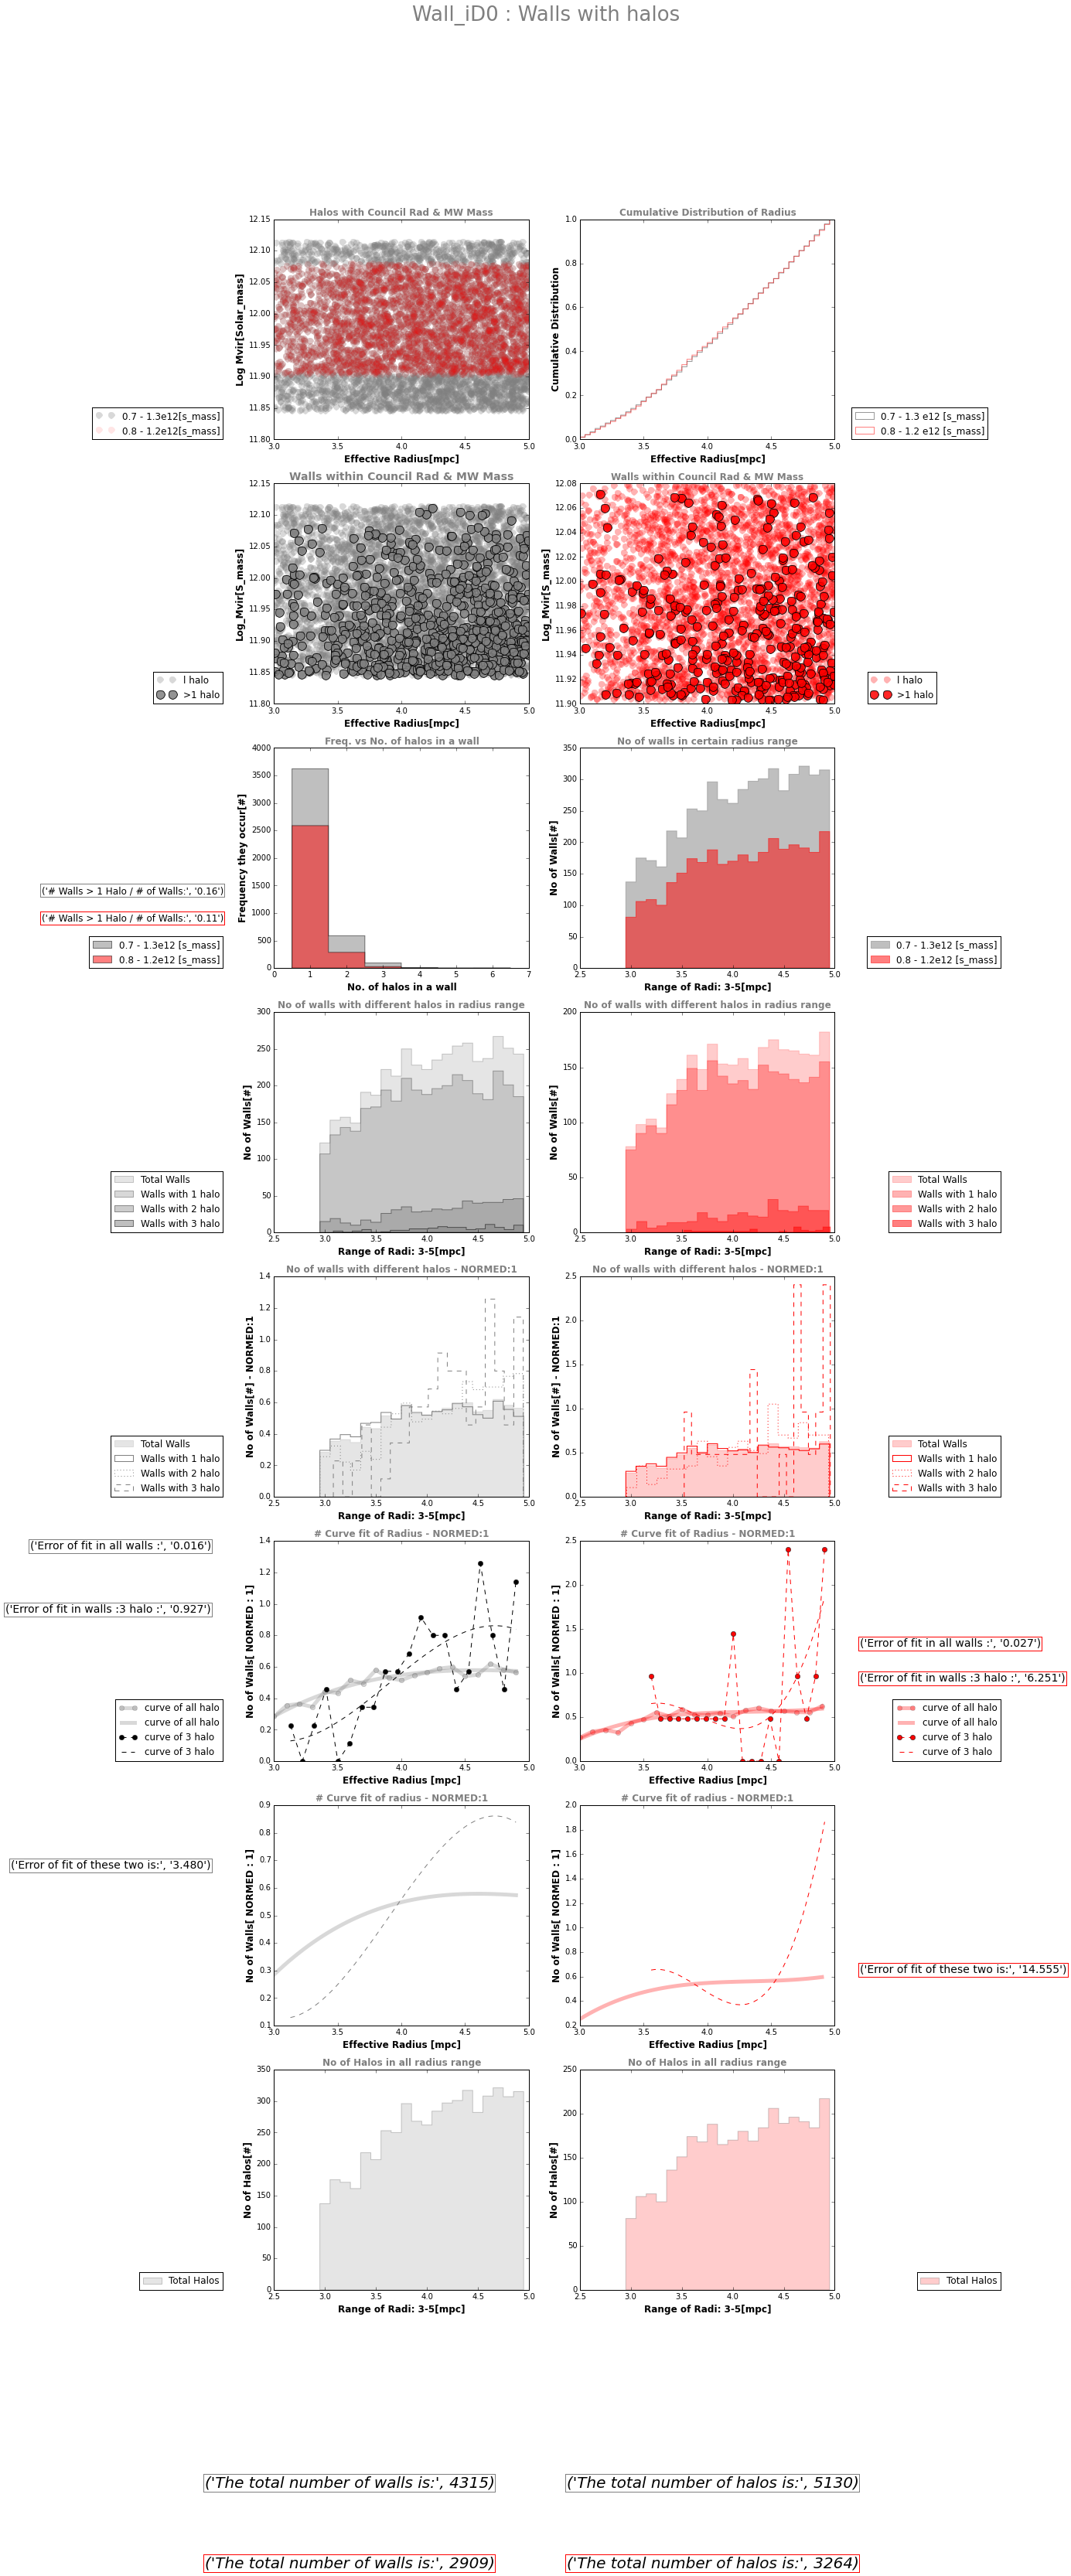

In [535]:
# E X E R C I S E  12 : WALL_iD0
# Let's plot the Council Radius of each halo within Milky Way Mass
# W A L L S  W I T H  H A L O S  - L E T  U S  L O O K  A T  H A L O S  T O O

from __future__ import division
#--------------------------------------------------------------------------------

# Let's plot this
fig,ax = plt.subplots(8,2,figsize=(13, 48))
fig.suptitle("Wall_iD0 : Walls with halos", fontsize=26,alpha=0.5)

color1 = "RED"


# You must specify the catalogue you want to look at
catalogue =new_beh_cat0

# L E T  U S  P L O T  F O R  [ 0  ,  0 ]
# The scatter plot
# G R A Y
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
# Use the Difinition
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
# Let us plot for [0,0]
x = plot_output2[3] # radius
a = plot_output2[2] # mass
y=[]
for i in range(len(a)):
    y.append(math.log10(a[i]))
# The individual dots
ax[0,0].plot(x,y,marker='o',linestyle='none',color='gray',alpha=0.3,ms=9,
             markeredgewidth=0.0, label = '0.7 - 1.3e12[s_mass] ')

# R E D  
lo_rad =3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
x = plot_output2[3] # radius
a = plot_output2[2] # mass
y=[]
for i in range(len(a)):
    y.append(math.log10(a[i]))
# The individual dots
ax[0,0].plot(x,y,marker='o',linestyle='none',color = color1,alpha=0.1,ms=9,
             markeredgewidth=0.0, label = '0.8 - 1.2e12[s_mass] ')

# The axis
ax[0,0].set_xlabel('Effective Radius[mpc]',fontsize=12,fontweight='bold')
ax[0,0].set_ylabel('Log Mvir[Solar_mass]',fontsize=12,fontweight='bold')
# The Legend
ax[0,0].set_title('Halos with Council Rad & MW Mass ',fontsize=12,fontweight='bold',alpha=0.5)
ax[0,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)


# L E T  U S  P L O T  F O R  [ 1  ,  0 ] 
# The Cumulative mass
# Scatter Plots of 1 Halo vs many halos
# G R A Y 
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
x = plot_output2[3]    # Radius
a = plot_output2[2]    # Mass
y=[]
for i in range(len(a)):
    y.append(math.log10(a[i]))
ax[1,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=0.3,ms=9,markeredgewidth=0.0,label = 'l halo')
# G R A Y  W /  B L A C K  O U T L I N E 
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
a = how_many_walls[1][:,2]    # Mass
y=[]
for i in range(len(a)):
    y.append(math.log10(a[i]))
ax[1,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')
# The axis
ax[1,0].set_xlabel('Effective Radius[mpc]',fontsize=12,fontweight='bold')
ax[1,0].set_ylabel('Log_Mvir[S_mass]',fontsize=12,fontweight='bold')
# The Legend
ax[1,0].set_title('Walls within Council Rad & MW Mass',fontsize=14,fontweight='bold',alpha=0.5)
ax[1,0].legend(bbox_to_anchor=(-0.2, 0), loc=4, borderaxespad=0.)


# L E T  U S  P L O T  F O R  [ 2  ,  0 ]

# Histogram of 1 halo vs many halo
# G R A Y 
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas,catalogue)
# Let's get the array the array of the frequency of the halo in each wall
freq_halo = np.asarray(itemfreq(plot_output2[0]))     # The frequency of the number of halos in a wall
x = freq_halo[:,1]
ax[2,0].hist(x,color='gray',alpha=0.5,label='0.7 - 1.3e12 [s_mass]',bins = [1,2,3,4,5,6,7],
             histtype='stepfilled',align='left',edgecolor = "black")
# M O R E  T H A N  A  H A L O   
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)
a = how_many_walls[1][:,3]        # Radius
b0 = len(how_many_walls[0][:,3])  #total_number_of_walls
c = len(a)                        #walls_with_more_than_a_halo
frac_0 = c/b0
ans = format(frac_0,'.2f')
# The caption
note0 = "# Walls > 1 Halo / # of Walls:", ans 
ax[2,0].text(-1.4,1500,note0,fontsize=12,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'grey'})

# GREY  
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
# Let's get the array the array of the frequency of the halo in each wall
freq_halo = np.asarray(itemfreq(plot_output2[0]))     # The frequency of the number of halos in a wall
x = freq_halo[:,1]
ax[2,0].hist(x,color = color1,alpha=0.5,label='0.8 - 1.2e12 [s_mass]',bins = [1,2,3,4,5,6,7],
             histtype='stepfilled',align='left',edgecolor = "black")

# M O R E  T H A N  A  H A L O   
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)
a = how_many_walls[1][:,3]        # Radius
b0 = len(how_many_walls[0][:,3])  #total_number_of_walls

c = len(a)                        #walls_with_more_than_a_halo
frac_0 = c/b0
ans = format(frac_0,'.2f')
# The caption
note0 = "# Walls > 1 Halo / # of Walls:", ans
ax[2,0].text(-1.4,1000,note0,fontsize=12,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':color1})

# The axis
ax[2,0].set_xlabel('No. of halos in a wall',fontsize=12,fontweight='bold')
ax[2,0].set_ylabel('Frequency they occur[#]',fontsize=12,fontweight='bold')
# The Legend
ax[2,0].set_title('Freq. vs No. of halos in a wall',fontsize=12,fontweight='bold',alpha=0.5)
# The axis
ax[2,0].set_xlabel('No. of halos in a wall',fontsize=12,fontweight='bold')
ax[2,0].set_ylabel('Frequency they occur[#]',fontsize=12,fontweight='bold')
# The Legend
ax[2,0].set_title('Freq. vs No. of halos in a wall',fontsize=12,fontweight='bold',alpha=0.5)
ax[2,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)

# L E T  U S  P L O T  F O R  [ 3 ,  0 ]
# Let us see how many walls of different halos falls within certain radius range
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)

# TOTAL NUMBER OF WALLS 
x = how_many_walls[0][:,3]     # Radius of all walls
# Let's get the array the array of the frequency of the halo in each wall
ax[3,0].hist(x,color='grey',alpha=0.2,label='Total Walls',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")
###############################
#appending information
total_no_of_walls_grey = len(x)
###############################

# TOTAL NUMBER OF WALLS WITH EXACTLY 1 HALO 
x = how_many_walls[2][:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[3,0].hist(x,color='grey',alpha=0.3,label='Walls with 1 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# TOTAL NUMBER OF WALLS WITH MORE THAN 1 HALO
print('Max No. of halos in walls for grey:',max(how_many_walls[1][:,1]))    # The maximum number of halos in walls

# TOTAL NUMBER OF WALLS WITH EXACTLY 2 HALO 
walls_with_2_halos = how_many_walls[1][how_many_walls[1][:,1] == 2] 
x = walls_with_2_halos[:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[3,0].hist(x,color='grey',alpha=0.4,label='Walls with 2 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# TOTAL NUMBER OF WALLS WITH EXACTLY 3 HALO 
walls_with_3_halos = how_many_walls[1][how_many_walls[1][:,1] == 3] 
x = walls_with_3_halos[:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[3,0].hist(x,color='grey',alpha=0.5,label='Walls with 3 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# The axis
ax[3,0].set_xlabel('Range of Radi: 3-5[mpc]',fontsize=12,fontweight='bold')
ax[3,0].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[3,0].set_title('No of walls with different halos in radius range',fontsize=12,fontweight='bold',alpha=0.5)
ax[3,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)


# L E T  U S  P L O T  F O R  [ 4 ,  0 ]
# N O R M E D
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)

# TOTAL NUMBER OF WALLS 
x = how_many_walls[0][:,3]     # Radius of all walls
# Let's get the array the array of the frequency of the halo in each wall
count,bins,ignored = ax[4,0].hist(x,color='grey',alpha=0.2,label='Total Walls',bins = 20,normed = True,
             histtype='stepfilled',align='left',edgecolor = "grey")


# TOTAL NUMBER OF WALLS WITH EXACTLY 1 HALO 
x = how_many_walls[2][:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[4,0].hist(x,color='grey',alpha=1,label='Walls with 1 halo',bins = 20,normed = True,
             histtype='step',align='left',edgecolor = "grey")

# TOTAL NUMBER OF WALLS WITH EXACTLY 2 HALO 
walls_with_2_halos = how_many_walls[1][how_many_walls[1][:,1] == 2] 
x = walls_with_2_halos[:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[4,0].hist(x,color='grey',alpha=1,label='Walls with 2 halo',bins = 20,normed = True,
             histtype='step',align='left',edgecolor = "grey",linestyle="dotted")

# TOTAL NUMBER OF WALLS WITH EXACTLY 3 HALO 
walls_with_3_halos = how_many_walls[1][how_many_walls[1][:,1] == 3] 
x = walls_with_3_halos[:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
count1,bins1,ignored1 = ax[4,0].hist(x,color='grey',alpha=1,label='Walls with 3 halo',bins = 20,normed = True,
             histtype='step',align='left',edgecolor = "grey",linestyle="dashed")

# The axis
ax[4,0].set_xlabel('Range of Radi: 3-5[mpc]',fontsize=12,fontweight='bold')
ax[4,0].set_ylabel('No of Walls[#] - NORMED:1',fontsize=12,fontweight='bold')
# The Legend
ax[4,0].set_title('No of walls with different halos - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[4,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)



# L E T  U S  P L O T  F O R  [ 5  ,  0]
#  C H I  - S Q U A R E D  F I T 

# Let's plot the distribution of the histogram
y = count
x = np.delete(bins, -1)

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
all_halo_fit = x_new, y_new

# calculate the chi-square error
err = format(np.sum((np.polyval(np.polyfit(x, y, 2), x) - y)**2),'.3f')
note0 = 'Error of fit in all walls :', err

# Let us plot it
ax[5,0].plot(x,y,'o', x_new, y_new, color = 'grey',linestyle='-', linewidth=5,
             alpha=0.3,label = "curve of all halo")

# Let's plot the distribution of the histogram
y = count1
x = np.delete(bins1, -1)

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
more_than_1_fit = x_new,y_new

# calculate the chi-square error

err = format(np.sum((np.polyval(np.polyfit(x, y, 2), x) - y)**2),'.3f')
note1 = 'Error of fit in walls :3 halo :', err

ax[5,0].plot(x,y,'o', x_new, y_new, color = 'black',linestyle='--', 
             alpha = 1, label = "curve of 3 halo",linewidth = 1)

# The axis
ax[5,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[5,0].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[5,0].set_title('# Curve fit of Radius - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[5,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The Caption
ax[5,0].text(2.5,1.4,note0,fontsize=14,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'grey'})
ax[5,0].text(2.5,1.0,note1,fontsize=14,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'grey'})



# L E T  U S  P L O T  F O R  [ 6  ,  0]
#  L E A S T   S Q U A R E S 
# The first curve
x = all_halo_fit[0]
y = all_halo_fit[1]

# The second curve
x1 = more_than_1_fit[0]
y1 = more_than_1_fit[1]

# Their plots
ax[6,0].plot(x,y ,color = 'grey',linestyle='-',linewidth = 5, alpha = 0.3)
ax[6,0].plot(x1,y1, color = 'grey',linestyle='--')

# Their errors
squared = (y1 -y)**2
term = squared/y
err = format(np.sum(term),'.3f')

# The axis
ax[6,0].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[6,0].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[6,0].set_title('# Curve fit of radius - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[6,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)
# The Caption
note0 = 'Error of fit of these two is:', err
ax[6,0].text(2.5,0.7,note0,fontsize=14,ha='right', va='top',
             bbox={'facecolor':'white','edgecolor':'grey'})

#note1 = 'I thought error would be huge \n but it turned out to be small. \n SFR is probably consistent throughout \n different radii of Walls.'
#ax[6,0].text(2.5,0.6,note1,fontsize=14,ha='right', va='top',
#             bbox={'facecolor':'white','edgecolor':'grey'})




# L E T  U S  P L O T  F O R  [ 7 ,  0 ]
# N O .  O F  H A L O S  I N  R A D I U S  R A N G E
# G R A Y  

plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)


# TOTAL NUMBER OF HALOS 
x = plot_output2[3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[7,0].hist(x,color='grey',alpha=0.2,label='Total Halos',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

###############################
#appending information
total_no_of_halos_grey = len(x)
###############################

# The axis
ax[7,0].set_xlabel('Range of Radi: 3-5[mpc]',fontsize=12,fontweight='bold')
ax[7,0].set_ylabel('No of Halos[#]',fontsize=12,fontweight='bold')
# The Legend
ax[7,0].set_title('No of Halos in all radius range',fontsize=12,fontweight='bold',alpha=0.5)
ax[7,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)



# L E T  U S  P L O T  F O R  [ 0  ,  1]
# The Cumulative radius
# G R A Y
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
x = plot_output2[3] # radius
n_bins = 50
n, bins, patches = ax[0,1].hist(x, n_bins, normed=1, label = '0.7 - 1.3 e12 [s_mass]',
                            histtype='step', cumulative=True,color='gray',alpha = 0.8)
# R E D  
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
x = plot_output2[3] # radius
n_bins = 50

n, bins, patches = ax[0,1].hist(x, n_bins, normed=1, label = '0.8 - 1.2 e12 [s_mass]',
                            histtype='step', cumulative=True,color=color1,alpha = 0.5)
# The axis
ax[0,1].set_xlabel('Effective Radius[mpc]',fontsize=12,fontweight='bold')
ax[0,1].set_ylabel('Cumulative Distribution',fontsize=12,fontweight='bold')
# The Legend
ax[0,1].set_title('Cumulative Distribution of Radius',fontsize=12,fontweight='bold',alpha=0.5)
ax[0,1].legend(bbox_to_anchor=(1.6, 0), loc=4, borderaxespad=0.)


# L E T  U S  P L O T  F O R  [ 1  ,  1 ]
# Scatter Plots of 1 Halo vs many halos
# R E D  
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
x = plot_output2[3]    # Radius
a = plot_output2[2]    # Mass
y=[]
for i in range(len(a)):
    y.append(math.log10(a[i]))
ax[1,1].plot(x,y,marker='o',linestyle='none',color = color1,alpha=0.3,ms=9,markeredgewidth=0.0,label = 'l halo')
# R E D   W /  B L A C K  O U T L I N E 
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
a = how_many_walls[1][:,2]    # Mass
y=[]
for i in range(len(a)):
    y.append(math.log10(a[i]))
ax[1,1].plot(x,y,marker='o',linestyle='none',color = color1,alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')
# The axis
ax[1,1].set_xlabel('Effective Radius[mpc]',fontsize=12,fontweight='bold')
ax[1,1].set_ylabel('Log_Mvir[S_mass]',fontsize=12,fontweight='bold')
# The Legend
ax[1,1].set_title('Walls within Council Rad & MW Mass',fontsize=12,fontweight='bold',alpha=0.5)
ax[1,1].legend(bbox_to_anchor=(1.4, 0), loc=4, borderaxespad=0.)



# L E T  U S  P L O T  F O R  [ 2 ,  1 ]
# Let us see how many halos falls within certain radius range
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
x = plot_output2[3]  # radius
# Let's get the array the array of the frequency of the halo in each wall

ax[2,1].hist(x,color='grey',alpha=0.5,label='0.7 - 1.3e12 [s_mass]',bins = 20,
             histtype='stepfilled',align='left',edgecolor = 'grey')
# R E D   
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
x = plot_output2[3]  # radius
# Let's get the array the array of the frequency of the halo in each wall

ax[2,1].hist(x,color = color1,alpha=0.5,label='0.8 - 1.2e12 [s_mass]',bins = 20,
             histtype='stepfilled',align='left',edgecolor = color1)
# The axis
ax[2,1].set_xlabel('Range of Radi: 3-5[mpc]',fontsize=12,fontweight='bold')
ax[2,1].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[2,1].set_title('No of walls in certain radius range',fontsize=12,fontweight='bold',alpha=0.5)
ax[2,1].legend(bbox_to_anchor=(1.65, 0), loc=4, borderaxespad=0.)


# L E T  U S  P L O T  F O R  [ 3 ,  1 ]
# Let us see how many walls of different halos falls within certain radius range
 

plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)

# TOTAL NUMBER OF WALLS 
x = how_many_walls[0][:,3]     # Radius of all walls
# Let's get the array the array of the frequency of the halo in each wall
ax[3,1].hist(x,color=color1,alpha=0.2,label='Total Walls',bins = 20,
             histtype='stepfilled',align='left',edgecolor = color1)
###############################
#appending information
total_no_of_walls_red = len(x)
###############################

# TOTAL NUMBER OF WALLS WITH EXACTLY 1 HALO 
x = how_many_walls[2][:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[3,1].hist(x,color=color1,alpha=0.3,label='Walls with 1 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = color1)

# TOTAL NUMBER OF WALLS WITH MORE THAN 1 HALO
print('Max No. of halos in walls for red:',max(how_many_walls[1][:,1]))    # The maximum number of halos in walls


# TOTAL NUMBER OF WALLS WITH EXACTLY 2 HALO 
walls_with_2_halos = how_many_walls[1][how_many_walls[1][:,1] == 2] 
x = walls_with_2_halos[:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[3,1].hist(x,color=color1,alpha=0.4,label='Walls with 2 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = color1)

# TOTAL NUMBER OF WALLS WITH EXACTLY 3 HALO 
walls_with_3_halos = how_many_walls[1][how_many_walls[1][:,1] == 3] 
x = walls_with_3_halos[:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[3,1].hist(x,color=color1,alpha=0.5,label='Walls with 3 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = color1)

# The axis
ax[3,1].set_xlabel('Range of Radi: 3-5[mpc]',fontsize=12,fontweight='bold')
ax[3,1].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[3,1].set_title('No of walls with different halos in radius range',fontsize=12,fontweight='bold',alpha=0.5)
ax[3,1].legend(bbox_to_anchor=(1.65, 0), loc=4, borderaxespad=0.)



# L E T  U S  P L O T  F O R  [ 4 ,  1 ]
# N O R M E D

plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)

# TOTAL NUMBER OF WALLS 
x = how_many_walls[0][:,3]     # Radius of all walls
# Let's get the array the array of the frequency of the halo in each wall
count,bins,ignored = ax[4,1].hist(x,color=color1,alpha=0.2,label='Total Walls',bins = 20,normed = True,
             histtype='stepfilled',align='left',edgecolor = color1)
###############################
#appending information
total_no_of_walls_red = len(x)
###############################

# TOTAL NUMBER OF WALLS WITH EXACTLY 1 HALO 
x = how_many_walls[2][:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[4,1].hist(x,color='grey',alpha=1,label='Walls with 1 halo',bins = 20,normed = True,
             histtype='step',align='left',edgecolor = color1)

# TOTAL NUMBER OF WALLS WITH EXACTLY 2 HALO 
walls_with_2_halos = how_many_walls[1][how_many_walls[1][:,1] == 2] 
x = walls_with_2_halos[:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[4,1].hist(x,color='grey',alpha=1,label='Walls with 2 halo',bins = 20,normed = True,
             histtype='step',align='left',edgecolor = color1,linestyle="dotted")

# TOTAL NUMBER OF WALLS WITH EXACTLY 3 HALO 
walls_with_3_halos = how_many_walls[1][how_many_walls[1][:,1] == 3] 
x = walls_with_3_halos[:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
count1,bins1,ignored1 = ax[4,1].hist(x,color=color1,alpha=1,label='Walls with 3 halo',bins = 20,normed = True,
             histtype='step',align='left',edgecolor = color1,linestyle="dashed")

# The axis
ax[4,1].set_xlabel('Range of Radi: 3-5[mpc]',fontsize=12,fontweight='bold')
ax[4,1].set_ylabel('No of Walls[#] - NORMED:1',fontsize=12,fontweight='bold')
# The Legend
ax[4,1].set_title('No of walls with different halos - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[4,1].legend(bbox_to_anchor=(1.65, 0), loc=4, borderaxespad=0.)



# L E T  U S  P L O T  F O R  [ 5  ,  1]
#  C H I  - S Q U A R E D  F I T 

# Let's plot the distribution of the histogram
y = count
x = np.delete(bins, -1)

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
all_halo_fit = x_new, y_new

# calculate the chi-square error
err = format(np.sum((np.polyval(np.polyfit(x, y, 2), x) - y)**2),'.3f')
note0 = 'Error of fit in all walls :', err

# Let us plot it
ax[5,1].plot(x,y,'o', x_new, y_new, color = color1,linestyle='-', linewidth=5,
             alpha=0.3,label = "curve of all halo")

# Let's plot the distribution of the histogram
y = count1
x = np.delete(bins1, -1)

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
more_than_1_fit = x_new,y_new

# calculate the chi-square error

err = format(np.sum((np.polyval(np.polyfit(x, y, 2), x) - y)**2),'.3f')
note1 = 'Error of fit in walls :3 halo :', err

ax[5,1].plot(x,y,'o', x_new, y_new, color = color1,linestyle='--', 
             alpha = 1, label = "curve of 3 halo",linewidth = 1)

# The axis
ax[5,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[5,1].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[5,1].set_title('# Curve fit of Radius - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[5,1].legend(bbox_to_anchor=(1.65, 0), loc=4, borderaxespad=0.)
# The Caption
ax[5,1].text(5.2,1.4,note0,fontsize=14,ha='left', va='top',
             bbox={'facecolor':'white','edgecolor':color1})
ax[5,1].text(5.2,1.0,note1,fontsize=14,ha='left', va='top',
             bbox={'facecolor':'white','edgecolor':color1})



# L E T  U S  P L O T  F O R  [ 6  ,  0]
#  L E A S T   S Q U A R E S 
# The first curve
x = all_halo_fit[0]
y = all_halo_fit[1]

# The second curve
x1 = more_than_1_fit[0]
y1 = more_than_1_fit[1]

# Their plots
ax[6,1].plot(x,y ,color = color1,linestyle='-',linewidth = 5, alpha = 0.3)
ax[6,1].plot(x1,y1, color = color1,linestyle='--')

# Their errors
squared = (y1 -y)**2
term = squared/y
err = format(np.sum(term),'.3f')

# The axis
ax[6,1].set_xlabel('Effective Radius [mpc]',fontsize=12,fontweight='bold')
ax[6,1].set_ylabel('No of Walls[ NORMED : 1]',fontsize=12,fontweight='bold')
# The Legend
ax[6,1].set_title('# Curve fit of radius - NORMED:1',fontsize=12,fontweight='bold',alpha=0.5)
ax[6,1].legend(bbox_to_anchor=(1.65, 0), loc=4, borderaxespad=0.)
# The Caption
note0 = 'Error of fit of these two is:', err
ax[6,1].text(5.2,0.7,note0,fontsize=14,ha='left', va='top',
             bbox={'facecolor':'white','edgecolor':color1})

#note1 = 'I thought error would be huge \n but it turned out to be small. \n SFR is probably consistent throughout \n different radii of Walls.'
#ax[6,0].text(2.5,0.6,note1,fontsize=14,ha='right', va='top',
#             bbox={'facecolor':'white','edgecolor':'grey'})




# L E T  U S  P L O T  F O R  [ 7 ,  1 ]
# N O .  O F  H A L O S  I N  R A D I U S  R A N G E
# G R A Y  

plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)


# TOTAL NUMBER OF HALOS 
x = plot_output2[3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[7,1].hist(x,color=color1,alpha=0.2,label='Total Halos',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

###############################
#appending information
total_no_of_halos_red = len(x)
###############################

# The axis
ax[7,1].set_xlabel('Range of Radi: 3-5[mpc]',fontsize=12,fontweight='bold')
ax[7,1].set_ylabel('No of Halos[#]',fontsize=12,fontweight='bold')
# The Legend
ax[7,1].set_title('No of Halos in all radius range',fontsize=12,fontweight='bold',alpha=0.5)
ax[7,1].legend(bbox_to_anchor=(1.65, 0), loc=4, borderaxespad=0.)




# The caption
note0 = "The total number of walls is:",total_no_of_walls_grey
note1 = "The total number of walls is:",total_no_of_walls_red
note2 = "The total number of halos is:",total_no_of_halos_grey
note3 = "The total number of halos is:",total_no_of_halos_red
#note4 = " The number of walls with more than a halo:",more_than_1_halo
plt.figtext(.03,.050,note0,ha='left',va='bottom',fontsize=20,style='italic',
                bbox={'facecolor':'white','edgecolor':'grey'})
plt.figtext(.03,.02,note1,ha='left',va='bottom',fontsize=20,style='italic',
                bbox={'facecolor':'white','edgecolor':color1})
plt.figtext(.53,.050,note2,ha='left',va='bottom',fontsize=20,style='italic',
                bbox={'facecolor':'white','edgecolor':'grey'})
plt.figtext(.53,.02,note3,ha='left',va='bottom',fontsize=20,style='italic',
                bbox={'facecolor':'white','edgecolor':color1})
#plt.figtext(.13,-.07,note4,ha='left',va='bottom',fontsize=16,style='italic',
#                bbox={'facecolor':'white','edgecolor':'red'})

In [45]:
b_tran ={0:'scale',1:'id',2:'desc_scale', 3:'desc_id',4:'num_prog',5:'pid', 6:'upid',
         7:'desc_pid',8:'phantom',9:'sam_mvir', 10:'mvir',11:'rvir',12:'rs', 13:'vrms',
         14:'mmp?',15:'scale_of_last_MM',16:'vmax', 17:'x',18:'y',19:'z', 20:'vx',21:'vy',
         22:'vz',23:'Jx',24:'Jy', 25:'Jz',26:'Spin',27:'Breadth_first_ID', 28:'Depth_first_ID',
         29:'Tree_root_ID', 30:'Orig_halo_ID',31:'Snap_num',32:'Next_coprogenitor_depthfirst_ID',
         33:'Last_progenitor_depthfirst_ID',34:'Rs_Klypin',35:'Mvir_all',36:'M200b',37:'M200c',
         38:'M500c',39:'M2500c',40:'Xoff',41:'Voff',42:'Spin_Bullock',43:'b_to_a',44:'c_to_a',
         45:'A[x]',46:'A[y]',47:'A[z]',48:'b_to_a(500c)',49:'c_to_a(500c)',50:'A[x](500c)',
         51:'A[y](500c)',52:'A[z](500c)',53:'T/|U|',54:'M_pe_Behroozi',55:'M_pe_Diemer',
         56:'Macc',57:'Mpeak',58:'Vacc',59:'Vpeak',60:'Halfmass_Scale',61:'Acc_Rate_Inst',
         62:'Acc_Rate_100Myr',63:'Acc_Rate_1*Tdyn',64:'Acc_Rate_2*Tdyn',65:'Acc_Rate_Mpeak',
         66:'Mpeak_Scale',67:'Acc_Scale', 68:'First_Acc_Scale',69:'First_Acc_Mvir',
         70:'First_Acc_Vmax',71:'Vmax@Mpeak',72:'density_CIC',73:'density_1/2',74:'density_1',
         75:'density_2',76:'density_4',77:'density_8',78:'density_16',79:'C_NFW', 80:'bs_ratio',
         81:'cost',82:'P_rvir',83:'P_r500',84:'Mdot/M_inst', 85:'Mdot/M_tdyn',86:'Mdot/M_t2dyn',
         87:'logM/logM*',88:'C_Klypin',89:'Last_mainleaf_depthfirst_ID',90:'Tidal_Force', 
         91:'Tidal_ID',92:'Tidal_Force_Tdyn'
                 }

In [139]:
# A N G U L A R   M O M E N T U M 
# Let's read the new files to find the Angular Momentum 

#Read *.iwall, *.ifila, *.iwat with, e.g.:

# Smoothing Scale : 1 
data = np.fromfile('Particles.0273.0000.GAU-2.0.Y-0-1.iwall',np.int32)[64:]
print(len(data))
print(data)
# The data would read something like data[x][y][z]
data1 = data.reshape((1024,1024,1024))


1073741824
[ -1  -1 141 ...,  -1  -1  -1]


In [39]:
# E X E R C I S E  12 : WALL_iD0
# Let's plot the Council Radius of each halo within Milky Way Mass
# W A L L S  W I T H  H A L O S  - A L I G N M E N T

from __future__ import division
#--------------------------------------------------------------------------------

# Let's plot this
#fig,ax = plt.subplots(2,2,figsize=(13, 12))
#fig.suptitle("Wall_iD1 : Walls with halos", fontsize=26,alpha=0.5)


# You must specify the catalogue you want to look at
catalogue =new_beh_cat1

# L E T  U S  P L O T  F O R  [ 0  ,  0]
# Let us see if the angular momentum aligns with the intermediate axis 
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
# Let's get the Alignment & Effective Radius
plot_output2 = give_me_reduced_rad_and_mass_and_ang_and_pos (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
Wall_iDs = plot_output2[0]
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_and_ang_and_pos(no_of_walls0, plot_output2)


In [141]:
# D O  N O T  D E L E T E  . S K I P  I N S T E A D
total_freq = itemfreq(data)
total_wall = len(total_freq)

In [145]:
# D O  N O T  D E L E T E  . S K I P  I N S T E A D
print(total_wall)                # Total amount of walls 
print(total_freq[-1][0])         # Last Wall iD. This means the Wall iD does 
                                 # run continuosly from -1 to this number

19291
19289


In [140]:
# D O  N O T  D E L E T E  . S K I P  I N S T E A D
print
print(len(iDs))                  # This tells you how many walls with DM Halos
print(Wall_iDs[500:600])         # This is just all the Walls, not really ordered 
iDs =  how_many_walls[0][:,0]  
print(iDs[500:600])              # This is the ordered set of Walls


1130
[  2548.   3527.   3730.   3017.   2548.   3412.   1066.   2483.    589.
   1391.   3276.   7149.   7961.   6196.   6957.   6300.   7358.   6111.
   5693.   6711.  10913.   8304.   7961.  10222.  10222.   7910.   8748.
  10222.  15273.  12783.  16221.  16221.  16280.  15470.  15802.  17480.
  17417.  16055.  16278.  16221.  16991.   3467.    392.    615.   3226.
   3467.    392.   5325.   5641.   5061.   4577.   4577.   6417.   5470.
   5323.   4843.   6417.   6769.   6115.   5325.   5325.   6417.   6399.
   6470.  11449.   9471.  10618.  11026.   8310.  11470.   7841.  13040.
  11026.  13922.  15278.  15006.  15006.  15471.  14365.  13922.  13618.
  14784.  14828.  13255.  11525.  14033.  12828.  14105.  19065.  15672.
  15695.  15471.  19086.  19065.  15471.  16108.  15610.  18115.  17269.
  18620.]
[ 7884.  7888.  7910.  7956.  7961.  7976.  7992.  8013.  8015.  8045.
  8046.  8050.  8097.  8148.  8179.  8182.  8186.  8208.  8217.  8220.
  8230.  8304.  8310.  8316.  8341.  83

In [185]:
def give_me_position(plot_output2):
    iDs_all = plot_output2[0]# All iDs 
    A = np.where(iDs_all == i)
    Px = plot_output2[7]    # Position x 
    Py = plot_output2[8]    # Position y
    Pz = plot_output2[9]    # Position z
    
    # This is the specific position
    Px1,Py1,Pz1 = Px[A],Py[A],Pz[A] 
    Pos = np.array([Pz1,Py1,Px1])
    Position = (Pos/250)* 1024 
   
    return Position          # Z, y, X down every row
  
    
def give_me_angular(plot_output2):
    iDs_all = plot_output2[0]# All iDs 
    A = np.where(iDs_all == i)
    Jx = plot_array2[:,4]    # Ang Mo x 
    Jy = plot_array2[:,5]    # Ang Mo y
    Jz = plot_array2[:,6]    # Ang Mo z
    
    # This is the specific angular momentum
    Jx1,Jy1,Jz1 = Jx[A],Jy[A],Jz[A] 
    Ang = np.array([Jz1,Jy1,Jx1])
    J = Ang.T                      # Z , Y , X down every row
    Jmod = (J[:,0]**2 + J[:,1]**2 + J[:,2]**2 )**0.5    
    unit_J = Ang/Jmod
    #unit_J = unit.T     # This is the unit vector: Z , y , X down every row
   
    return unit_J

def give_me_angular_momentum_vector(Position,Angular):
    '''This should give you back the Angular Momentum Vector'''
    Angular_Magnitude = Angular *20
    Angular_End = Position + Angular_Magnitude

    
    return Angular_End


def plot_and_contour_me(b,azim_ang,plot_output2,Position,Angular_EndT):
    '''You have to feed it data, and it will give you the plots and contours'''
    
    # Let us plot !
    fig = plt.figure()
    fig.set_size_inches(20, 12)
    ax = fig.add_subplot(111, projection='3d')

    # The transpose
    B=b.T

    # All the values in the y axis
    temp = itemfreq(B[:,1])
    all_y = temp[:,0]
    y_ave = int(np.average(all_y))

    for q in all_y:

        # All the lines we are looking at 
        line = B[np.where(B[:,1]==q)]   # for a given index of y 
        for m in range(len(line)):
            xs , ys , zs = line[m][0],line[m][1],line[m][2]
            ax.scatter(xs , ys , zs ,c="red", marker="o",alpha = 0.5 )

        # The cross line 
        xline = B[np.where(B[:,1]==y_ave)]   # for a given index of y 
        for m in range(len(xline)):
            xs , ys , zs = xline[m][0],xline[m][1],xline[m][2]
            ax.scatter(xs , ys , zs ,c="orange",marker="x",alpha = 0.1 ,s = 300 )

        # The minmum in y 
        low_line = line[int(len(line)/4) : int(3*len(line)/4)]      # 1/4 to 3/4
        if len(low_line[:,2]) != 0:
            low_point = low_line[low_line[:,2] == min(low_line[:,2])]
            xs , ys , zs = low_point[0][0],low_point[0][1],low_point[0][2]
            ax.scatter(xs , ys , zs ,c="green", alpha = 0.5, s = 500  )

        # High middle in y
        high_line = line[int(len(line)/2):len(line)]
        if len(high_line[:,2]) != 0:
            high_point =high_line[high_line[:,2] == max(high_line[:,2])]
            xs , ys , zs = high_point[0][0],high_point[0][1],high_point[0][2]
            ax.scatter(xs , ys , zs ,c="red",alpha = 0.5, s = 400  )

        # Next High middle in y 
        next_high_line = line[0:int(len(line)/2)]
        if len(next_high_line[:,2]) != 0:
            next_high_point = next_high_line[next_high_line[:,2] == max(next_high_line[:,2])]
            xs , ys , zs = next_high_point[0][0],next_high_point[0][1],next_high_point[0][2]
            ax.scatter(xs , ys , zs ,c="red", alpha = 0.5, s = 400  )

    note = "Wall ID:", i   
    note1 = "Azimuthal Angle:",azim_ang
    ax.text2D(0.05, 0.95, note, transform=ax.transAxes) 
    ax.text2D(0.65, 0.95, note1, transform=ax.transAxes) 
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_ylim(-10,10)
    ax.view_init(azim=azim_ang)
    
    # The position vector         : This is the start point of the vector
    [[xs,ys,zs]] = [Position]
    PositionT = Position.T
    ax.scatter(xs , ys , zs ,c="blue", alpha = 0.6, s = 400, marker = 's'  )
    
    # The Angular Momentum Vector : This is the end point of the vector
    [[xt,yt,zt]] = [Angular_End]
    Angular_EndT = Angular_End.T

    # Let's plot that Angular Momentum
    for n in range(len(PositionT)):
        x1,x2,x3 = PositionT[n]
        w1,w2,w3 = Angular_EndT[n]
        ax.plot([x1,w1], [x2,w2],zs=[x3,w3],color='blue',linewidth=5,alpha=0.5)
        ax.scatter(w1, w2,w3,color='blue',marker = 's', s = 400 )




('No. of Voxels in a single Wall iD ', 2033)
[[[ 169.    158.96]
  [   4.24   -4.24]
  [ 857.83  872.91]]]


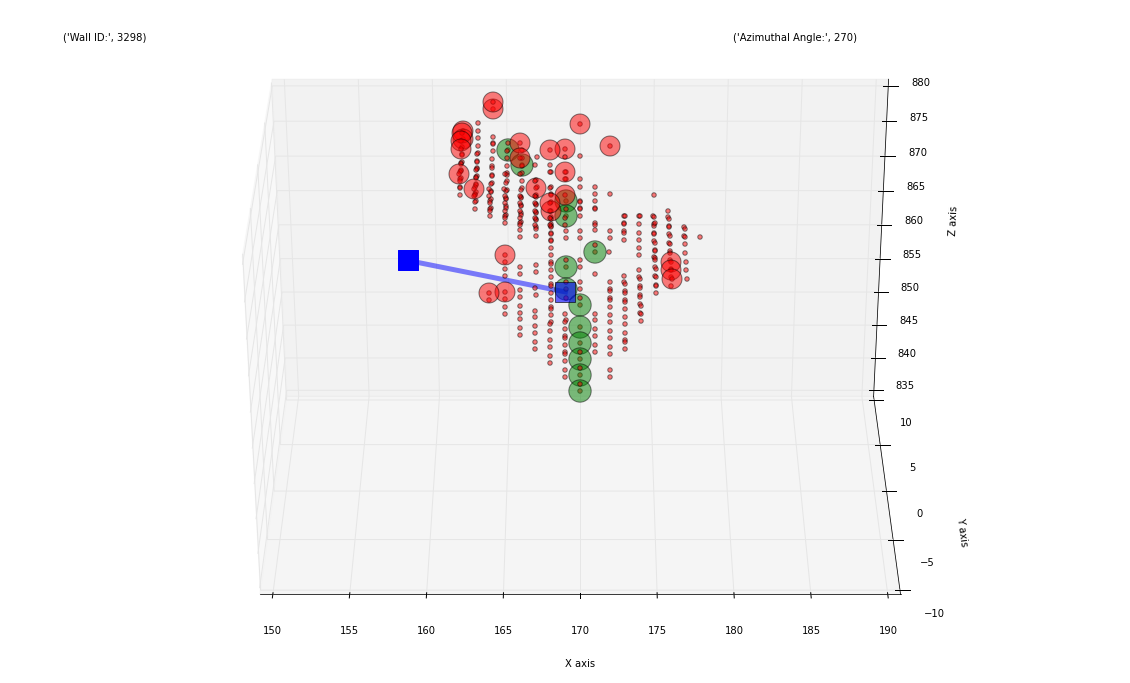

In [186]:
# T E S T I N G 

# INFO
# The Wall iD

i=3298
# The angle you want to view the plot in 
for ang in range(270,271):
    azim_ang = ang
        
    # Getting the data for Wall iD : i
    a = np.where(data1==i)
    b = np.asarray(a)
    print('No. of Voxels in a single Wall iD ',len(b[0])) 

    #PLOT
    # The position of the DM Halo
    Position = give_me_position(plot_output2)        
    # The angular momentum of the DM Halo
    Angular = give_me_angular(plot_output2)
    # The Angular Momentum Vector with correct position
    Angular_End = give_me_angular_momentum_vector(Position,Angular)
    # The plot of the DM Halo in the Wall
    plot_and_contour_me(b,azim_ang,plot_output2,Position,Angular_End)
    
    #DOT PRODUCT
    
    # The position vector         : This is the start point of the vector
    [[xs,ys,zs]] = [Position]
    PositionT = Position.T

    # The Angular Momentum Vector : This is the end point of the vector
    [[xt,yt,zt]] = [Angular_End]
    Angular_EndT = Angular_End.T

    # Let's get all the Angular Momentum Vectors :
    Angular_Momentum_Vector = []
    for n in range(len(PositionT)):
        x1,x2,x3 = PositionT[n]
        w1,w2,w3 = Angular_EndT[n]
        temp = [x1,w1],[x2,w2],[x3,w3]
        Angular_Momentum_Vector.append(temp)     
    Angular_Momentum_Vector = np.asarray(Angular_Momentum_Vector)   # x,y,z down every row
    print(Angular_Momentum_Vector)

    
    # Let's get the locality of the Wall around the DM Halo
    
    
    
    

('No. of Voxels in a single Wall iD ', 1547)
('No. of Voxels in a single Wall iD ', 1547)


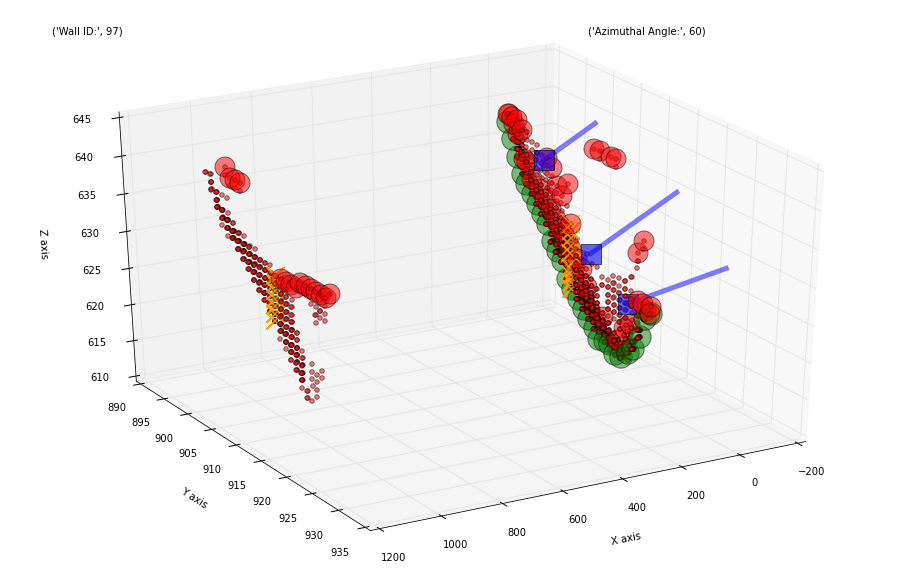

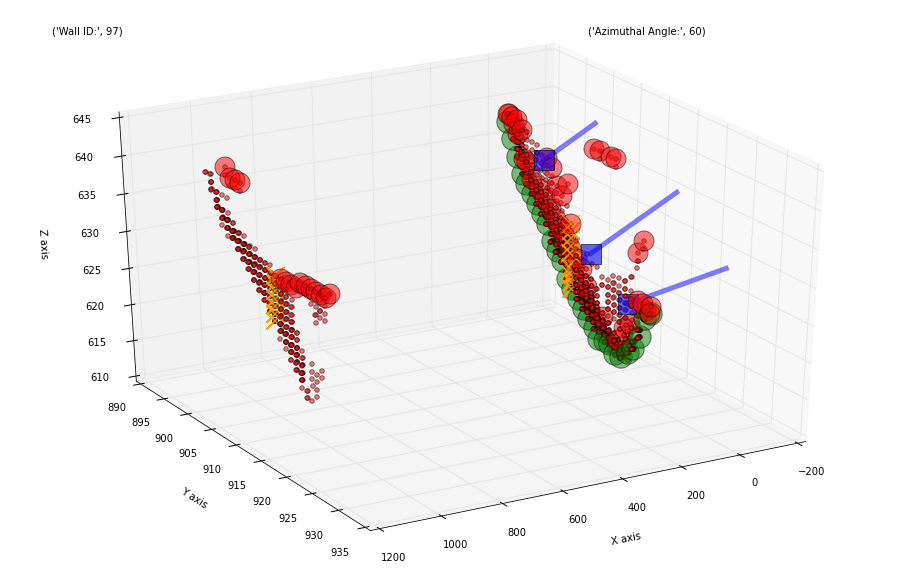

In [148]:
# L E T  U S  P L O T    W A L L S  W/  C O N T O U R S 

# INFO
# The Wall iD

for i in (97,97):

    # The angle you want to view the plot in 
    for ang in range(60,61):
        azim_ang = ang
        
        # Getting the data for Wall iD : i
        a = np.where(data1==i)
        b = np.asarray(a)
        print('No. of Voxels in a single Wall iD ',len(b[0])) 

        #PLOT
        # The position of the DM Halo
        Position = give_me_position(plot_output2)        
        # The angular momentum of the DM Halo
        Angular = give_me_angular(plot_output2)
        # The plot of the DM Halo in the Wall
        plot_and_contour_me(b,azim_ang,plot_output2,Position,Angular)

